In [1]:
#affichage des résultats de calibration. Prédictions et densités à posteriori.
#Aussi diagnostics de chaîne, si jamais. 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [58]:
#fonction pourafficher le résultat brut d'un calcul.
def plot_calcul(nr):
    filename='data/qmc/'+str(nr)+'/clean_profile.dat'
    df=pd.DataFrame(data=np.loadtxt(filename,skiprows=1),columns=['pos','alpha','diam','V1','V2'])
    exp=np.loadtxt("data/exp/A6.dat")
    #on garde seulement la deuxième colonne 1 (-R) et (colonne 11 alpha) (column 14 diam) (column 12 V)
    expo=exp[:-4,[1,11,14,12]]
    expo[:,0]*=-1
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))
    ax1.scatter(df['pos'],df['alpha'],color='tab:blue',label='calcul')
    ax1.scatter(expo[:,0],expo[:,1],color='tab:red',label='mesures')
    ax1.set_title('taux de vide')
    ax1.legend()
    
    ax2.scatter(df['pos'],df['diam'],color='tab:blue')
    ax2.scatter(expo[:,0],expo[:,2],color='tab:red')
    ax2.set_title('diamètre')
    
    ax3.scatter(df['pos'],df['V1'],color='tab:blue',label='V1')
    ax3.scatter(df['pos'],df['V2'],color='tab:green',label='V2')
    ax3.scatter(expo[:,0],expo[:,3],color='tab:red')
    ax3.set_title('vitesse')
    
    plt.tight_layout()
    plt.show()
    
    
#fonction pour afficher f et les intervalles de confiance à 95pct
def plot_f(df,title):
    fig,ax=plt.subplots(figsize=(6,5))
    ax.scatter(df['X'],df['truth'],color='tab:red',label='observations')
    ax.plot(df['X'],df['meanf'],color='black',label='fmean')
    ax.plot(df['X'],df['q2.5'],'--',color='black',alpha=0.7)
    ax.plot(df['X'],df['q97.5'],'--',color='black',alpha=0.7)
    ax.grid()
    ax.set_xlabel(r'X')
    ax.set_ylabel(r'Diam')
    ax.legend()
    ax.set_title(title)

#affichage des plots d'autocorrélation
def plot_autocor(df,title):
    fig,ax=plt.subplots(figsize=(6,5))
    for column in df:
        ax.plot(df[column],label=column)
    ax.grid()
    ax.set_xlabel(r'steps')
    ax.set_ylabel(r'correlation')
    ax.legend()
    ax.set_title(title)

#plot des marginales 1D à partir des samples
def plot_marginals(df,nbins,title):
    fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(20,5))
    ax1.set_xlim(0,1)
    ax2.set_xlim(0,1)
    ax3.set_xlim(0,1)
    ax4.set_xlim(0,1)
    ax5.set_xlim(0,1)
    ax1.set_ylim(0,5)
    ax2.set_ylim(0,5)
    ax3.set_ylim(0,5)
    ax4.set_ylim(0,5)
    ax5.set_ylim(0,5)
    ax1.hist(df['phi'],bins=nbins,density=True)
    ax1.set_title('phi')
    ax2.hist(df['BK'],bins=nbins,density=True)
    ax2.set_title('BK')
    ax3.hist(df['COAL'],bins=nbins,density=True)
    ax3.set_title('COAL')
    ax4.hist(df['NUCL'],bins=nbins,density=True)
    ax4.set_title('NUCL')
    ax5.hist(df['MT'],bins=nbins,density=True)
    ax5.set_title('MT')
    plt.suptitle(title)
    plt.tight_layout()
    
#à partir d'un tableau, construire un KDE
def plot_finepreds(dataframes,labels,pointnr,expres,i):
    fig,ax=plt.subplots(figsize=(6,5))
    if i==1:
        X=np.linspace(0,0.5,100)
    else:
        X=np.linspace(0,6E-4,100)
    for df,lab in zip(dataframes,labels):
        array=df[pointnr]
        kernel=stats.gaussian_kde(array)
        ax.plot(X,kernel(X),label=lab)
        mean="{:.2e}".format(np.mean(array))
        std="{:.2e}".format(np.std(array))
        print('mean = '+mean+', std = '+std+' '+lab)

    #set ylim au max du premier dataframe
    df=dataframes[0]
    array=df[pointnr]
    kernel=stats.gaussian_kde(array)
    Ymax=np.max(kernel(X))
    ax.vlines(expres[pointnr],0,0.8*Ymax)
    ax.set_ylim([0,1.3*Ymax])
    val="{:.2e}".format(expres[pointnr])
    print('vraie valeur :'+val)
    plt.legend(loc='best')
    plt.show()
    
#afficher le plot des variances de f+z.


        
        
    
    

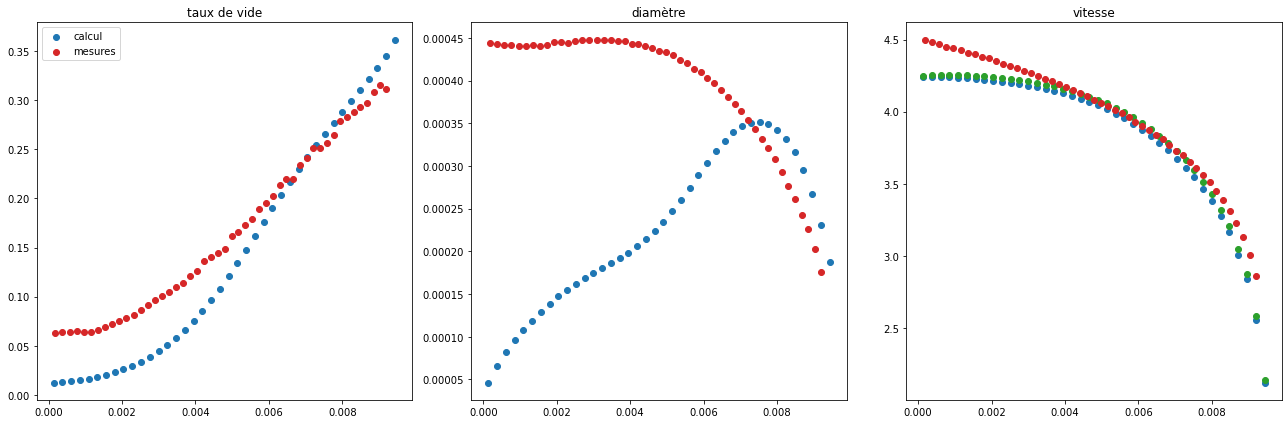

In [60]:
plot_calcul(3)

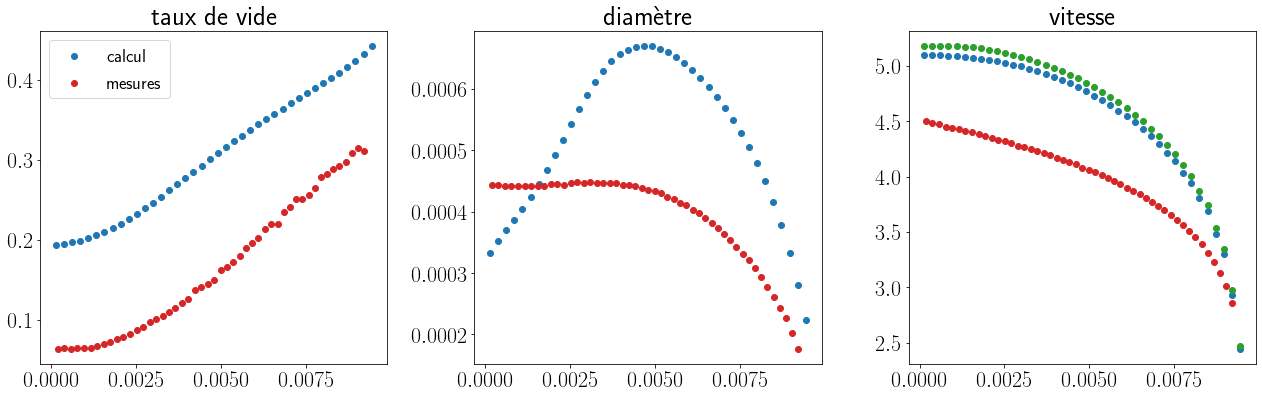

In [697]:
#charger le DoE QMC. puis petit sort pour trouver la meilleure prédiction possibeul.


In [30]:
foldname="studies/crossapplication/samples_single/"
foldname2="studies/crossapplication/results/preds_single/"
#loading des fichiers

sampkohalpha=pd.DataFrame(data=np.loadtxt(foldname+"sampkohalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampoptalpha=pd.DataFrame(data=np.loadtxt(foldname+"sampoptalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampfbalpha=pd.DataFrame(data=np.loadtxt(foldname+"sampfbalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampnoedmalpha=pd.DataFrame(data=np.loadtxt(foldname+"sampnoedmalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])

sampkohdiam=pd.DataFrame(data=np.loadtxt(foldname+"sampkohdiam.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3','hpar4'])
sampoptdiam=pd.DataFrame(data=np.loadtxt(foldname+"sampoptdiam.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3','hpar4'])
sampfbdiam=pd.DataFrame(data=np.loadtxt(foldname+"sampfbdiam.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3','hpar4'])
sampnoedmdiam=pd.DataFrame(data=np.loadtxt(foldname+"sampnoedmdiam.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])

#sampdogalpha=pd.DataFrame(data=np.loadtxt("surrogatealpha/results/save/sampalphakoh.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
#sampdogdiam=pd.DataFrame(data=np.loadtxt("surrogate/results/save/sampdiamkoh.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
#sampdogdouble=pd.DataFrame(data=np.loadtxt("studies/double_calibration/results/save/sampkohalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])


predsoptalphafine=pd.DataFrame(data=np.loadtxt(foldname2+"alphaoptfine.gnu"),columns=['point1f','point1fz','point2f','point2fz','point3f','point3fz'])
predskohalphafine=pd.DataFrame(data=np.loadtxt(foldname2+"alphakohfine.gnu"),columns=['point1f','point1fz','point2f','point2fz','point3f','point3fz'])
predsfbalphafine=pd.DataFrame(data=np.loadtxt(foldname2+"alphafbfine.gnu"),columns=['point1f','point1fz','point2f','point2fz','point3f','point3fz'])
predsprioralphafine=pd.DataFrame(data=np.loadtxt(foldname2+"alphapriorfine.gnu"),columns=['point1f','point1fz','point2f','point2fz','point3f','point3fz'])

predsoptdiamfine=pd.DataFrame(data=np.loadtxt(foldname2+"diamoptfine.gnu"),columns=['point1f','point1fz','point2f','point2fz','point3f','point3fz'])
predskohdiamfine=pd.DataFrame(data=np.loadtxt(foldname2+"diamkohfine.gnu"),columns=['point1f','point1fz','point2f','point2fz','point3f','point3fz'])
predsfbdiamfine=pd.DataFrame(data=np.loadtxt(foldname2+"diamfbfine.gnu"),columns=['point1f','point1fz','point2f','point2fz','point3f','point3fz'])
predspriordiamfine=pd.DataFrame(data=np.loadtxt(foldname2+"diampriorfine.gnu"),columns=['point1f','point1fz','point2f','point2fz','point3f','point3fz'])

predsoptalpha=pd.DataFrame(data=np.loadtxt(foldname2+"alphaopt.gnu"),columns=['x','truth','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
predskohalpha=pd.DataFrame(data=np.loadtxt(foldname2+"alphakoh.gnu"),columns=['x','truth','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
predsfbalpha=pd.DataFrame(data=np.loadtxt(foldname2+"alphafb.gnu"),columns=['x','truth','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

predsoptdiam=pd.DataFrame(data=np.loadtxt(foldname2+"diamopt.gnu"),columns=['x','truth','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
predskohdiam=pd.DataFrame(data=np.loadtxt(foldname2+"diamkoh.gnu"),columns=['x','truth','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
predsfbdiam=pd.DataFrame(data=np.loadtxt(foldname2+"diamfb.gnu"),columns=['x','truth','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

#surrogate precision
surpres=pd.DataFrame(data=np.loadtxt("final_calibration/surrogate_precision/results/errors_alpha.gnu"),columns=['nmodes','errtot','projerr'])

#conditionals study
#theta|psi
condpsi1=pd.DataFrame(data=np.loadtxt("studies/conditionals_study/results/save/samppsi1.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3','hpar4','hpar5','hpar6'])

#psi|theta
condtheta1=pd.DataFrame(data=np.loadtxt("studies/conditionals_study/results/save/samptheta1.gnu"),columns=['hpar1','hpar2','hpar3','hpar4','hpar5','hpar6','useless'])

#hgps
hgps=pd.DataFrame(data=np.loadtxt('studies/hGPs/results/hgps2000.gnu'),columns=['ngrid','esedm1','el1','esobs1','esedm2','el2','esobs2','beta2','lperroralpha','lperrordiam','constrtime'])
hgps2=pd.DataFrame(data=np.loadtxt('studies/double_calibration_withmean/results/results_test.gnu'),columns=['ngrid','esedm1','el1','esobs1','esedm2','el2','esobs2','beta2','lperroralpha','lperrordiam','mcmctime','constrtime'])

#hpars optimal reférence
hparsoptref=pd.DataFrame(data=np.loadtxt('studies/double_calibration_withmean/results/hparsverif_recalculated.gnu'),columns=['t1','t2','t3','t4','t5','esedm1','el1','esobs1','esedm2','el2','esobs2','beta2'])


#experimental results
expres_alpha=predsoptalphafine.iloc[0]
expres_diam=predsoptdiamfine.iloc[0]

#drop de la première ligne pour les prédictions fines.
predsoptalphafine = predsoptalphafine.iloc[1:]
predskohalphafine = predskohalphafine.iloc[1:]
predsfbalphafine = predsfbalphafine.iloc[1:]
predsprioralphafine = predsprioralphafine.iloc[1:]

predsoptdiamfine = predsoptdiamfine.iloc[1:]
predskohdiamfine = predskohdiamfine.iloc[1:]
predsfbdiamfine = predsfbdiamfine.iloc[1:]
predspriordiamfine = predspriordiamfine.iloc[1:]

#pred_optF=pd.DataFrame(data=np.loadtxt(foldname+"results/preds/diamoptmat5F.gnu"),columns=['X','truth','meanf','q25','q75','q2.5','q97.5'])
#pred_kohF=pd.DataFrame(data=np.loadtxt(foldname+"results/preds/diamkohmat5F.gnu"),columns=['X','truth','meanf','q25','q75','q2.5','q97.5'])
#pred_fbF=pd.DataFrame(data=np.loadtxt(foldname+"results/preds/diamfullbayesmat5F.gnu"),columns=['X','truth','meanf','q25','q75','q2.5','q97.5'])

#hparsopt=pd.DataFrame(data=np.loadtxt("surrogatetemp/results/hparsopt.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])


ValueError: Shape of passed values is (1500, 8), indices imply (1500, 9)

In [387]:
mpl.rcParams['text.usetex']=True
#mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['font.weight']='bold'
#mpl.rcParams['axes.labelsize']= 33.0 #def value : 11.0
#mpl.rcParams['axes.titlesize']= 28.0 #def value : 12.0
mpl.rcParams['savefig.format']='png'
mpl.rcParams['font.size']=22
mpl.rcParams['legend.fontsize']=18


mean = 3.52e-01, std = 2.43e-02 koh
mean = 3.56e-01, std = 2.80e-02 opt
mean = 3.51e-01, std = 2.49e-02 fb
mean = 3.78e-01, std = 4.52e-02 prior preds
vraie valeur :2.92e-01


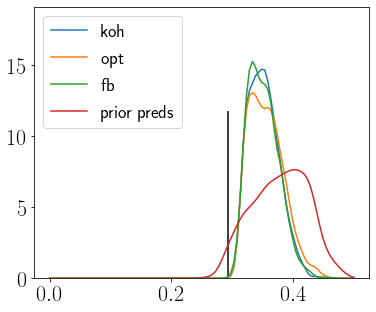

In [649]:

dfs=[predskohalphafine,predsoptalphafine,predsfbalphafine,predsprioralphafine]
labels=['koh','opt','fb','prior preds']
plot_finepreds(dfs,labels,'point3f',expres_alpha,1)#1 pour alpha

mean = 1.40e-04, std = 1.78e-05 koh
mean = 1.40e-04, std = 1.81e-05 opt
mean = 1.42e-04, std = 1.67e-05 fb
mean = 2.71e-04, std = 9.39e-05 prior preds
vraie valeur :2.62e-04


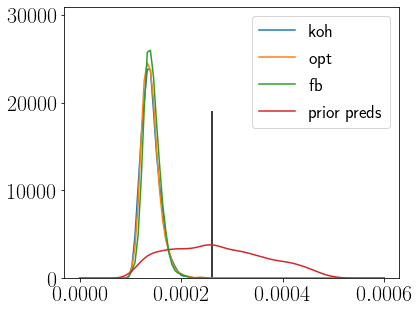

In [705]:
dfs=[predskohdiamfine,predsoptdiamfine,predsfbdiamfine,predspriordiamfine]
labels=['koh','opt','fb','prior preds']
plot_finepreds(dfs,labels,'point3f',expres_diam,0)

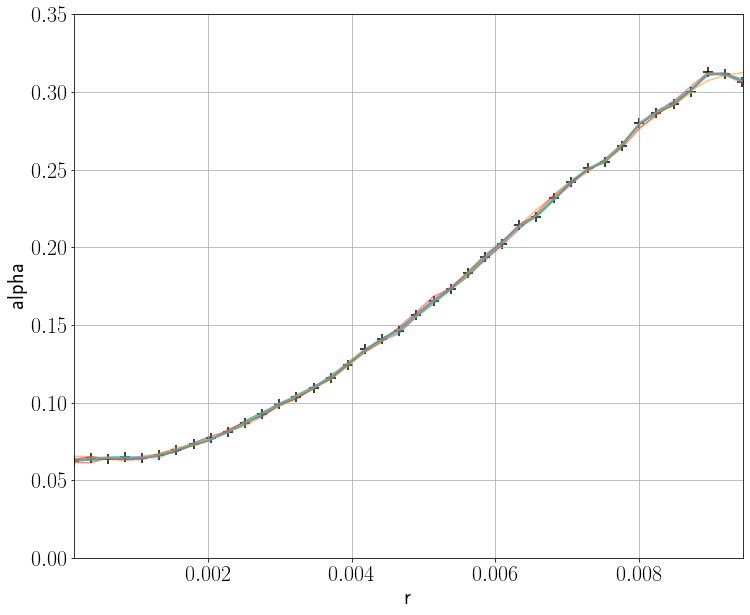

In [706]:
#affichage de tirages de f+z, avec la décomposition de variance.
#mieux de faire des figures individuelles, puis de tout assembler en latex.
dtf=predsoptalpha
alph=0.5
fig,ax=plt.subplots(figsize=(12,10))
ax.plot('x','s1',data=dtf,alpha=alph)
ax.plot('x','s2',data=dtf,alpha=alph)
ax.plot('x','s3',data=dtf,alpha=alph)
ax.plot('x','s4',data=dtf,alpha=alph)
ax.plot('x','s5',data=dtf,alpha=alph)
ax.plot('x','s6',data=dtf,alpha=alph)
ax.plot('x','s7',data=dtf,alpha=alph)
ax.plot('x','s8',data=dtf,alpha=alph)
ax.plot('x','s9',data=dtf,alpha=alph)
ax.plot('x','s10',data=dtf,alpha=alph)
ax.set_xlabel('r')
ax.set_ylabel('alpha')
ax.set_xlim(1.38e-4,9.45e-3)
ax.set_ylim(0,0.35)

ax.scatter(dtf['x'],dtf['truth'],s=100,marker='+',linewidths=10,color='black')
plt.grid()





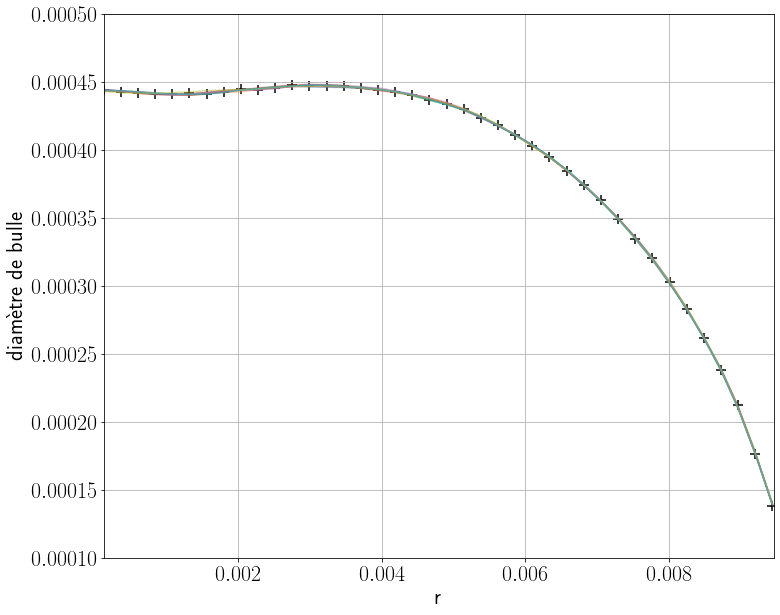

In [862]:
#affichage de tirages de f+z, avec la décomposition de variance.
#mieux de faire des figures individuelles, puis de tout assembler en latex.
dtf=predsoptdiam
alph=0.5
fig,ax=plt.subplots(figsize=(12,10))
ax.plot('x','s1',data=dtf,alpha=alph)
ax.plot('x','s2',data=dtf,alpha=alph)
ax.plot('x','s3',data=dtf,alpha=alph)
ax.plot('x','s4',data=dtf,alpha=alph)
ax.plot('x','s5',data=dtf,alpha=alph)
ax.plot('x','s6',data=dtf,alpha=alph)
ax.plot('x','s7',data=dtf,alpha=alph)
ax.plot('x','s8',data=dtf,alpha=alph)
ax.plot('x','s9',data=dtf,alpha=alph)
ax.plot('x','s10',data=dtf,alpha=alph)

ax.set_xlabel('r')
ax.set_ylabel('diamètre de bulle')
ax.set_xlim(1.38e-4,9.45e-3)
ax.set_ylim(1e-4,5e-4)


ax.scatter(dtf['x'],dtf['truth'],s=100,marker='+',linewidths=10,color='black')
plt.grid()

/home/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  del sys.path[0]
/home/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
/home/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


Text(0.5, 0, 'r')

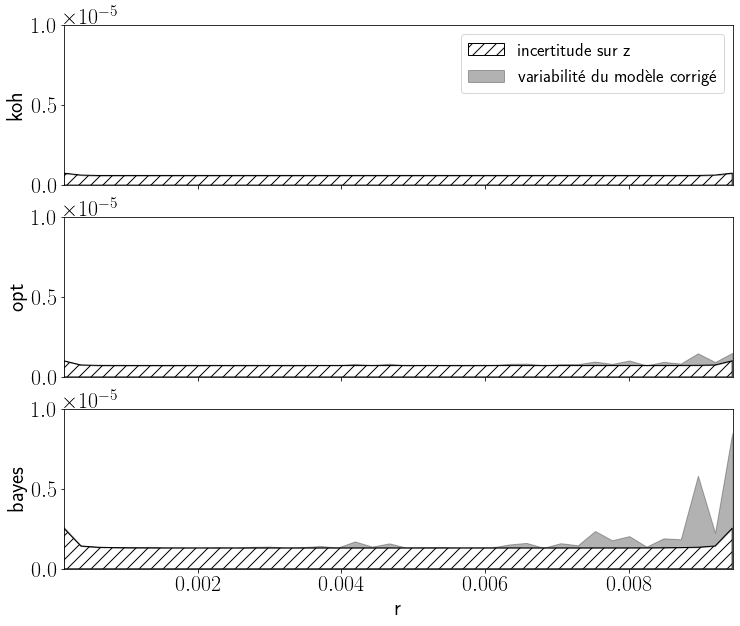

In [708]:
#plot de la décomposition de l'erreur. on met le rapport des variances ou des std ? si j'étais moi je ferais les variances.
df1=predskohalpha
df2=predsoptalpha
df3=predsfbalpha

#variance prédictive : std**2
#part irréductible : stdz**2.
#tracer en-dessous la part irréductible, puis on top la part de calibration.

fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize=(12,10),sharex=True,sharey=True)

ax1.fill_between(df1['x'],0,df1['stdz']**2,facecolor='none',edgecolor='black',hatch='//',label='incertitude sur z')
ax1.fill_between(df1['x'],df1['stdz']**2,df1['std']**2,1,alpha=0.3,color='black',label='variabilité du modèle corrigé')
ax1.legend()
ax1.set_xlim(1.38e-4,9.45e-3)
ax1.set_ylim(0,1e-5)
ax1.set_ylabel('koh')

ax2.fill_between(df2['x'],0,df2['stdz']**2,facecolor='none',edgecolor='black',hatch='//')
ax2.fill_between(df2['x'],df2['stdz']**2,df2['std']**2,1,alpha=0.3,color='black')
ax2.set_ylabel('opt')

ax3.fill_between(df3['x'],0,df3['stdz']**2,facecolor='none',edgecolor='black',hatch='//')
ax3.fill_between(df3['x'],df3['stdz']**2,df3['std']**2,1,alpha=0.3,color='black')
ax3.set_ylabel('bayes')
ax3.set_xlabel('r')



/home/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  del sys.path[0]
/home/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
/home/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


Text(0.5, 0, 'r')

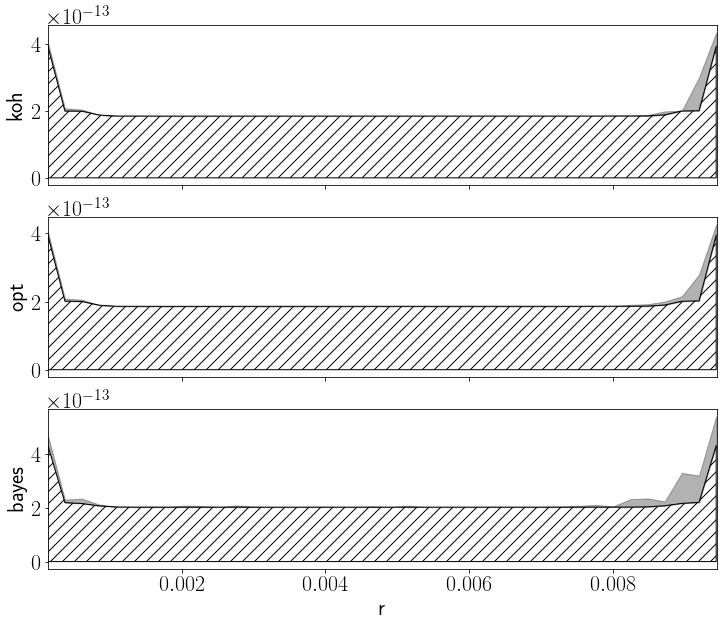

In [709]:
#plot de la décomposition de l'erreur. on met le rapport des variances ou des std ? si j'étais moi je ferais les variances.
df1=predskohdiam
df2=predsoptdiam
df3=predsfbdiam

#variance prédictive : std**2
#part irréductible : stdz**2.
#tracer en-dessous la part irréductible, puis on top la part de calibration.

fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize=(12,10),sharex=True)

ax1.fill_between(df1['x'],0,df1['stdz']**2,facecolor='none',edgecolor='black',hatch='//')
ax1.fill_between(df1['x'],df1['stdz']**2,df1['std']**2,1,alpha=0.3,color='black')
ax1.set_xlim(1.38e-4,9.45e-3)
#ax1.set_ylim(0,8e-13)
ax1.set_ylabel('koh')

ax2.fill_between(df2['x'],0,df2['stdz']**2,facecolor='none',edgecolor='black',hatch='//')
ax2.fill_between(df2['x'],df2['stdz']**2,df2['std']**2,1,alpha=0.3,color='black')
ax2.set_ylabel('opt')

ax3.fill_between(df3['x'],0,df3['stdz']**2,facecolor='none',edgecolor='black',hatch='//')
ax3.fill_between(df3['x'],df3['stdz']**2,df3['std']**2,1,alpha=0.3,color='black')
ax3.set_ylabel('bayes')
ax3.set_xlabel('r')



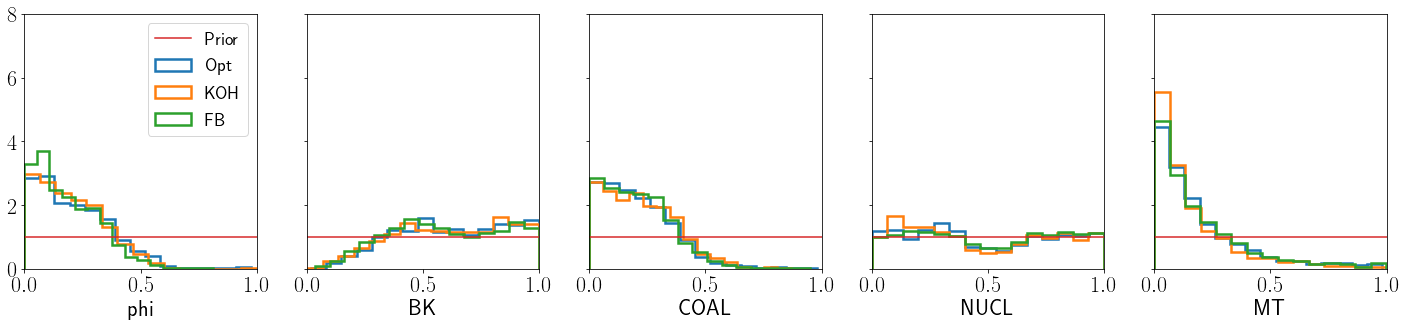

In [714]:
#marginales 1D, obtenues par chaque méthode.
#en histogrammes, s'il vous plaît.
dfopt=sampoptalpha
dfkoh=sampkohalpha
dffb=sampfbalpha
nbins=15
lw=2.5
alph=1


fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,sharey=True,sharex=True,figsize=(20,5))
ax1.set_xlim(0,1)
ax1.set_ylim(0,8)
ax1.hist(dfopt['phi'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax1.hist(dfkoh['phi'],bins=nbins,color='tab:orange',density=True,alpha=alph,label='KOH',histtype='step',linewidth=lw)
ax1.hist(dffb['phi'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax1.plot([0,1],[1,1],color='tab:red',label='Prior')
ax1.set_xlabel('phi')
ax1.legend()
ax2.hist(dfopt['BK'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax2.hist(dfkoh['BK'],bins=nbins,color='tab:orange',density=True,alpha=alph,histtype='step',linewidth=lw)
ax2.hist(dffb['BK'],bins=nbins,color='tab:green',density=True,alpha=alph,histtype='step',linewidth=lw)
ax2.plot([0,1],[1,1],color='tab:red',label='Prior')
ax2.set_xlabel('BK')
ax3.hist(dfopt['COAL'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax3.hist(dfkoh['COAL'],bins=nbins,color='tab:orange',density=True,alpha=alph,histtype='step',linewidth=lw)
ax3.hist(dffb['COAL'],bins=nbins,color='tab:green',density=True,alpha=alph,histtype='step',linewidth=lw)
ax3.plot([0,1],[1,1],color='tab:red',label='Prior')
ax3.set_xlabel('COAL')
ax4.hist(dfopt['NUCL'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax4.hist(dfkoh['NUCL'],bins=nbins,color='tab:orange',density=True,alpha=alph,histtype='step',linewidth=lw)
ax4.hist(dffb['NUCL'],bins=nbins,color='tab:green',density=True,alpha=alph,histtype='step',linewidth=lw)
ax4.plot([0,1],[1,1],color='tab:red',label='Prior')
ax4.set_xlabel('NUCL')
ax5.hist(dfopt['MT'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax5.hist(dfkoh['MT'],bins=nbins,color='tab:orange',density=True,alpha=alph,histtype='step',linewidth=lw)
ax5.hist(dffb['MT'],bins=nbins,color='tab:green',density=True,alpha=alph,histtype='step',linewidth=lw)
ax5.plot([0,1],[1,1],color='tab:red',label='Prior')
ax5.set_xlabel('MT')
plt.tight_layout()



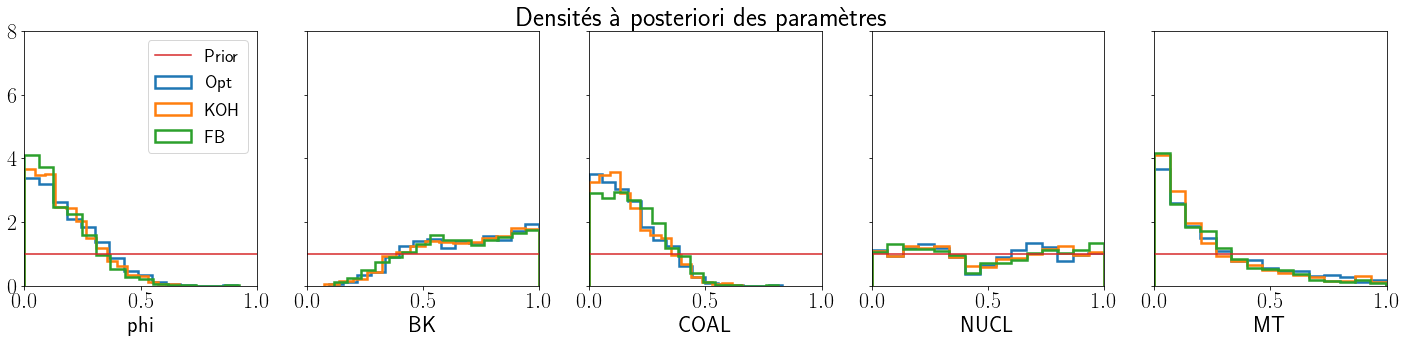

In [712]:
#marginales 1D des hyperparamètres.
#en histogrammes, s'il vous plaît.
dfopt=sampoptdiam
dfkoh=sampkohdiam
dffb=sampfbdiam
nbins=15
alph=1


fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,sharey=True,sharex=True,figsize=(20,5))
ax1.set_xlim(0,1)
ax1.set_ylim(0,8)
ax1.hist(dfopt['phi'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax1.hist(dfkoh['phi'],bins=nbins,color='tab:orange',density=True,alpha=alph,label='KOH',histtype='step',linewidth=lw)
ax1.hist(dffb['phi'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax1.plot([0,1],[1,1],color='tab:red',label='Prior')
ax1.set_xlabel('phi')
ax1.legend()
ax2.hist(dfopt['BK'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax2.hist(dfkoh['BK'],bins=nbins,color='tab:orange',density=True,alpha=alph,histtype='step',linewidth=lw)
ax2.hist(dffb['BK'],bins=nbins,color='tab:green',density=True,alpha=alph,histtype='step',linewidth=lw)
ax2.plot([0,1],[1,1],color='tab:red',label='Prior')
ax2.set_xlabel('BK')
ax3.hist(dfopt['COAL'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax3.hist(dfkoh['COAL'],bins=nbins,color='tab:orange',density=True,alpha=alph,histtype='step',linewidth=lw)
ax3.hist(dffb['COAL'],bins=nbins,color='tab:green',density=True,alpha=alph,histtype='step',linewidth=lw)
ax3.plot([0,1],[1,1],color='tab:red',label='Prior')
ax3.set_xlabel('COAL')
ax4.hist(dfopt['NUCL'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax4.hist(dfkoh['NUCL'],bins=nbins,color='tab:orange',density=True,alpha=alph,histtype='step',linewidth=lw)
ax4.hist(dffb['NUCL'],bins=nbins,color='tab:green',density=True,alpha=alph,histtype='step',linewidth=lw)
ax4.plot([0,1],[1,1],color='tab:red',label='Prior')
ax4.set_xlabel('NUCL')
ax5.hist(dfopt['MT'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax5.hist(dfkoh['MT'],bins=nbins,color='tab:orange',density=True,alpha=alph,histtype='step',linewidth=lw)
ax5.hist(dffb['MT'],bins=nbins,color='tab:green',density=True,alpha=alph,histtype='step',linewidth=lw)
ax5.plot([0,1],[1,1],color='tab:red',label='Prior')
ax5.set_xlabel('MT')
plt.suptitle('Densités à posteriori des paramètres')
plt.tight_layout()



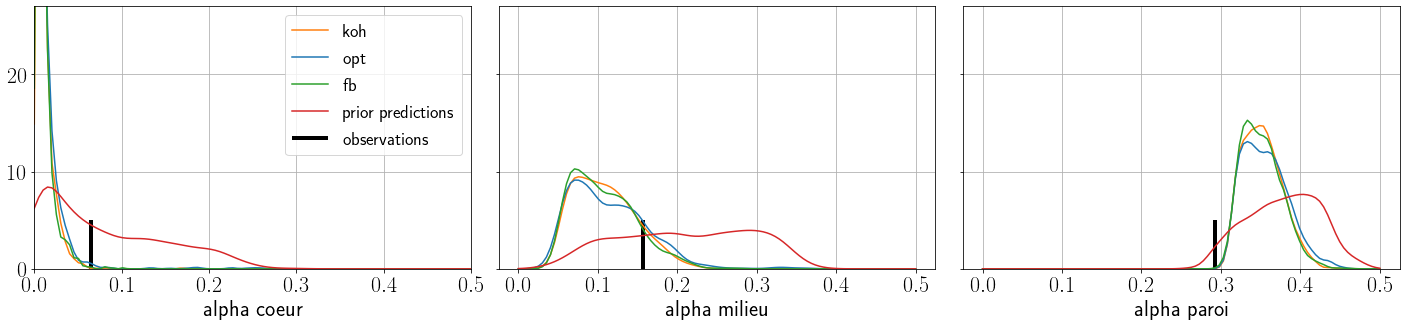

In [665]:
#densités prédictives de f seule.
expres=expres_alpha
dfslist=[predskohalphafine,predsoptalphafine,predsfbalphafine,predsprioralphafine]
labelslist=['koh','opt','fb','prior predictions']
colorslist=['tab:orange','tab:blue','tab:green','tab:red']
X=np.linspace(0,0.5,100)

fig,(ax1,ax2,ax3)=plt.subplots(figsize=(20,5),nrows=1,ncols=3,sharey=True)


for df,lab,col in zip(dfslist,labelslist,colorslist):
    array=df['point1f']
    kernel=stats.gaussian_kde(array)
    ax1.plot(X,kernel(X),label=lab,color=col)
    mean="{:.2e}".format(np.mean(array))
    std="{:.2e}".format(np.std(array))
ax1.vlines(expres['point1f'],0,5,label='observations',lw=4)
ax1.set_xlabel('alpha coeur')
ax1.grid()
for df,lab,col in zip(dfslist,labelslist,colorslist):
    array=df['point2f']
    kernel=stats.gaussian_kde(array)
    ax2.plot(X,kernel(X),label=lab,color=col)
    mean="{:.2e}".format(np.mean(array))
    std="{:.2e}".format(np.std(array))
ax2.vlines(expres['point2f'],0,5,lw=4)
ax2.set_xlabel('alpha milieu')
ax2.grid()
for df,lab,col in zip(dfslist,labelslist,colorslist):
    array=df['point3f']
    kernel=stats.gaussian_kde(array)
    ax3.plot(X,kernel(X),label=lab,color=col)
    mean="{:.2e}".format(np.mean(array))
    std="{:.2e}".format(np.std(array))
ax3.vlines(expres['point3f'],0,5,lw=4)
#set ylim au max du premier dataframe 
ax1.legend(loc='best')
ax1.set_ylim(0,27)
ax1.set_xlim(min(X),max(X))
ax3.set_xlabel('alpha paroi')
ax3.grid()
plt.tight_layout()
plt.show()


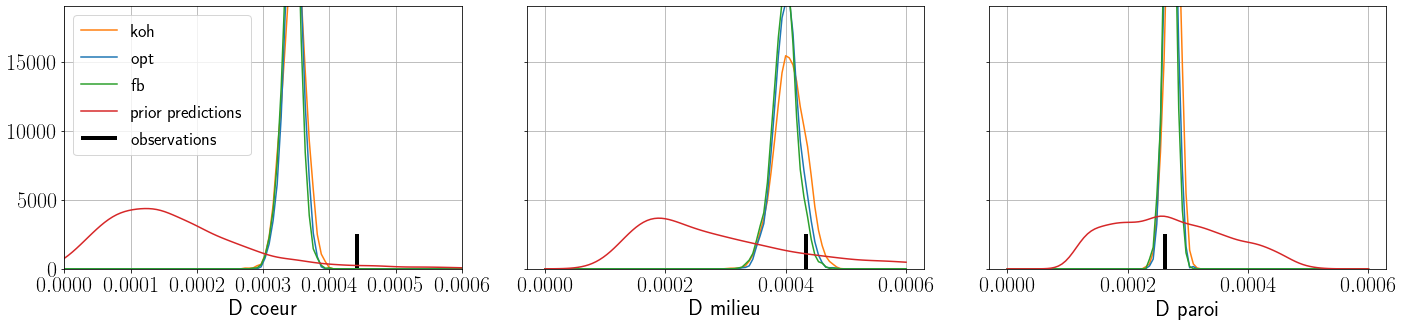

In [673]:
#densités prédictives de f seule.
expres=expres_diam
dfslist=[predskohdiamfine,predsoptdiamfine,predsfbdiamfine,predspriordiamfine]
labelslist=['koh','opt','fb','prior predictions']
colorslist=['tab:orange','tab:blue','tab:green','tab:red']
X=np.linspace(0,0.5,100)
X=np.linspace(0,6E-4,100)

fig,(ax1,ax2,ax3)=plt.subplots(figsize=(20,5),nrows=1,ncols=3,sharey=True)


for df,lab,col in zip(dfslist,labelslist,colorslist):
    array=df['point1f']
    kernel=stats.gaussian_kde(array)
    ax1.plot(X,kernel(X),label=lab,color=col)
    mean="{:.2e}".format(np.mean(array))
    std="{:.2e}".format(np.std(array))
ax1.vlines(expres['point1f'],0,2500,label='observations',lw=4)
ax1.set_xlabel('D coeur')
ax1.grid()
for df,lab,col in zip(dfslist,labelslist,colorslist):
    array=df['point2f']
    kernel=stats.gaussian_kde(array)
    ax2.plot(X,kernel(X),label=lab,color=col)
    mean="{:.2e}".format(np.mean(array))
    std="{:.2e}".format(np.std(array))
ax2.vlines(expres['point2f'],0,2500,lw=4)
ax2.set_xlabel('D milieu')
ax2.grid()
for df,lab,col in zip(dfslist,labelslist,colorslist):
    array=df['point3f']
    kernel=stats.gaussian_kde(array)
    ax3.plot(X,kernel(X),label=lab,color=col)
    mean="{:.2e}".format(np.mean(array))
    std="{:.2e}".format(np.std(array))
ax3.vlines(expres['point3f'],0,2500,lw=4)
ax3.grid()
ax1.legend(loc='best')
ax1.set_ylim(0,1.9e4)
ax1.set_xlim(min(X),max(X))
ax3.set_xlabel('D paroi')
plt.tight_layout()
plt.show()


0       0.098
1       0.098
2       0.098
3       0.098
4       0.098
        ...  
2998    0.098
2999    0.098
3000    0.098
3001    0.098
3002    0.098
Name: hpar1, Length: 3003, dtype: float64


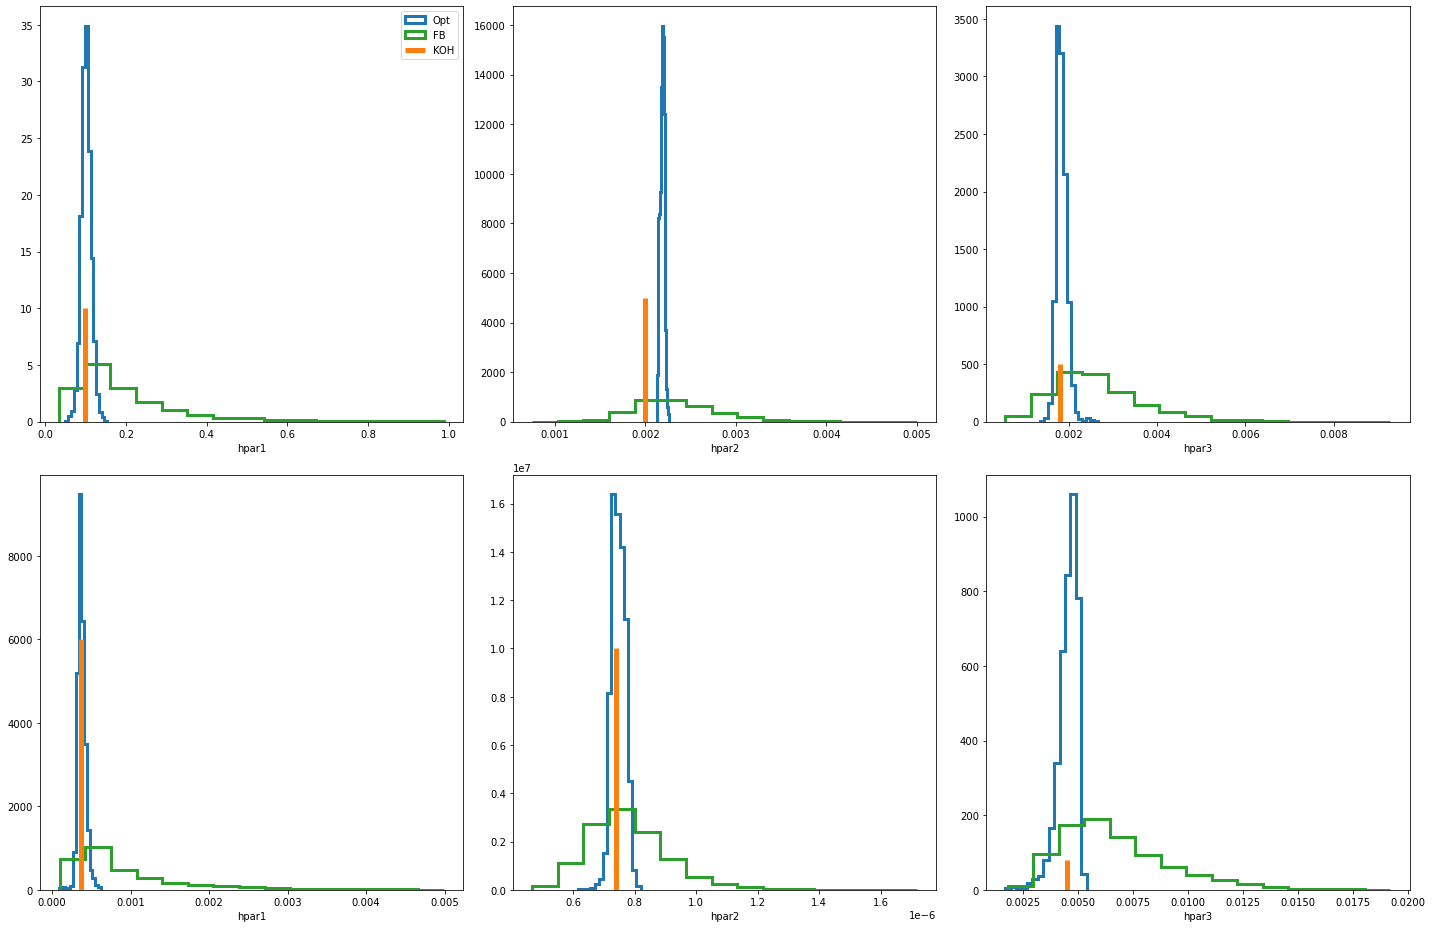

In [72]:
#plot des hyperparamètres. marginales 1D par histogrammes ? ou density plot 2D répartition exp/edm ?
#plutôt marginales 1D.
#marginales 1D, obtenues par chaque méthode.
#en histogrammes, s'il vous plaît.
dfoa=sampoptalpha
dfod=sampoptdiam
dffa=sampfbalpha
dffd=sampfbdiam
nbins=15
lw=3
alph=1



fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3,figsize=(20,13))

ax1.hist(dfoa['hpar1'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax1.hist(dffa['hpar1'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax1.vlines(sampkohalpha['hpar1'][0],0,10,color='tab:orange',lw=5,label='KOH')
ax1.set_xlabel('hpar1')
ax1.legend()

ax2.hist(dfoa['hpar2'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax2.hist(dffa['hpar2'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax2.vlines(sampkohalpha['hpar2'][0],0,5000,color='tab:orange',lw=5,label='KOH')
ax2.set_xlabel('hpar2')

ax3.hist(dfoa['hpar3'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax3.hist(dffa['hpar3'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax3.vlines(sampkohalpha['hpar3'][0],0,500,color='tab:orange',lw=5,label='KOH')
ax3.set_xlabel('hpar3')

ax4.hist(dfod['hpar1'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax4.hist(dffd['hpar1'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax4.vlines(sampkohdiam['hpar1'][0],0,6e3,color='tab:orange',lw=5,label='KOH')
ax4.set_xlabel('hpar1')

ax5.hist(dfod['hpar2'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax5.hist(dffd['hpar2'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax5.vlines(sampkohdiam['hpar2'][0],0,1e7,color='tab:orange',lw=5,label='KOH')
ax5.set_xlabel('hpar2')

ax6.hist(dfod['hpar3'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax6.hist(dffd['hpar3'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax6.vlines(sampkohdiam['hpar3'][0],0,80,color='tab:orange',lw=5,label='KOH')
ax6.set_xlabel('hpar3')

plt.tight_layout()

print(sampkohalpha['hpar1'])



0       0.002134
1       0.002134
2       0.002134
3       0.002134
4       0.002134
          ...   
1496    0.002134
1497    0.002134
1498    0.002134
1499    0.002134
1500    0.002134
Name: hpar2, Length: 1501, dtype: float64


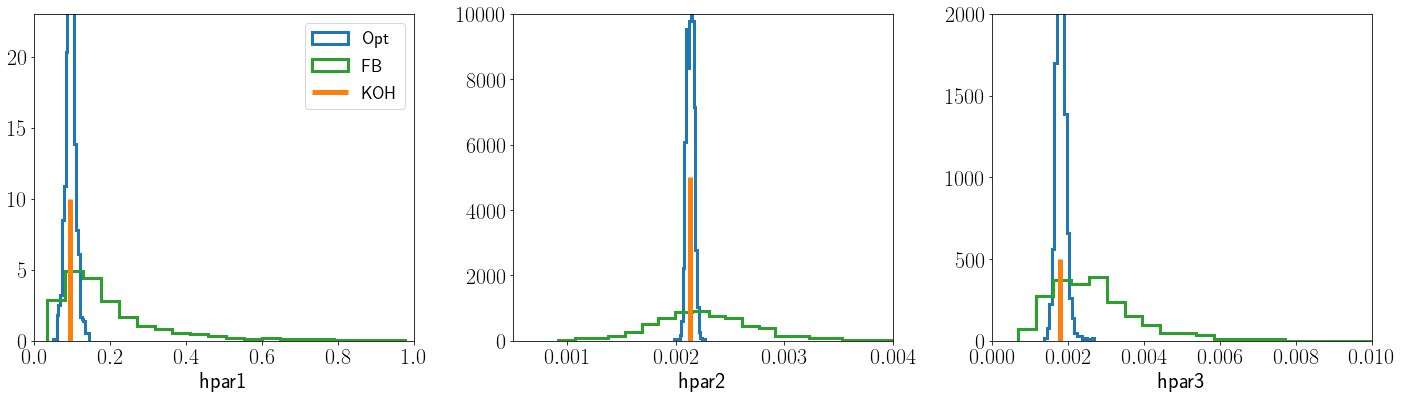

In [731]:
#plot des hyperparamètres. marginales 1D par histogrammes ? ou density plot 2D répartition exp/edm ?
#plutôt marginales 1D.
#marginales 1D, obtenues par chaque méthode.
#en histogrammes, s'il vous plaît.
dfoa=sampoptalpha
dfod=sampoptdiam
dffa=sampfbalpha
dffd=sampfbdiam
nbins=20
alph=1



fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,6))

ax1.hist(dfoa['hpar1'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax1.hist(dffa['hpar1'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax1.vlines(sampkohalpha['hpar1'][0],0,10,color='tab:orange',lw=5,label='KOH')
ax1.set_xlabel('hpar1')
ax1.set_xlim([0,1])

ax1.set_ylim([0,23])
ax1.legend()

ax2.hist(dfoa['hpar2'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax2.hist(dffa['hpar2'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax2.vlines(sampkohalpha['hpar2'][0],0,5000,color='tab:orange',lw=5,label='KOH')
ax2.set_xlim([5e-4,4e-3])
ax2.set_ylim([0,1e4])
ax2.set_xlabel('hpar2')

ax3.hist(dfoa['hpar3'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax3.hist(dffa['hpar3'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax3.vlines(sampkohalpha['hpar3'][0],0,500,color='tab:orange',lw=5,label='KOH')
ax3.set_xlim([0,1e-2])
ax3.set_ylim([0,2e3])
ax3.set_xlabel('hpar3')


plt.tight_layout()


print(sampkohalpha['hpar2'])


0.000129402
0.00492061
0.00245218
0.0297333


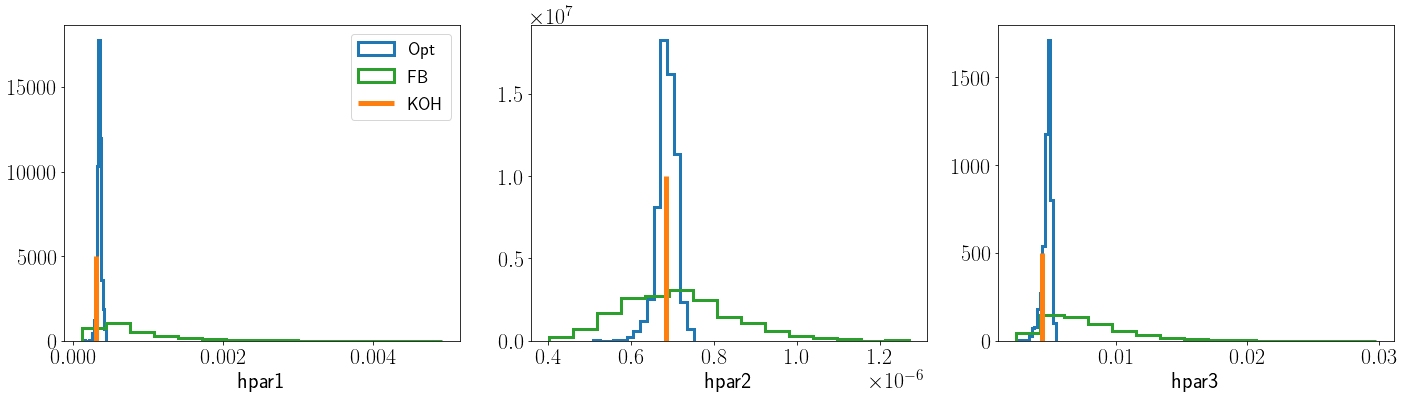

In [734]:
#plot des hyperparamètres. marginales 1D par histogrammes ? ou density plot 2D répartition exp/edm ?
#plutôt marginales 1D.
#marginales 1D, obtenues par chaque méthode.
#en histogrammes, s'il vous plaît.
dfoa=sampoptalpha
dfod=sampoptdiam
dffa=sampfbalpha
dffd=sampfbdiam
nbins=15
alph=1



fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,6))

ax1.hist(dfod['hpar1'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax1.hist(dffd['hpar1'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax1.vlines(sampkohdiam['hpar1'][0],0,5000,color='tab:orange',lw=5,label='KOH')
ax1.set_xlabel('hpar1')
ax1.legend()

ax2.hist(dfod['hpar2'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax2.hist(dffd['hpar2'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax2.vlines(sampkohdiam['hpar2'][0],0,1e7,color='tab:orange',lw=5,label='KOH')
ax2.set_xlabel('hpar2')

ax3.hist(dfod['hpar3'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax3.hist(dffd['hpar3'],bins=nbins,color='tab:green',density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax3.vlines(sampkohdiam['hpar3'][0],0,500,color='tab:orange',lw=5,label='KOH')
ax3.set_xlabel('hpar3')


plt.tight_layout()
print(dffd['hpar1'].min())

print(dffd['hpar1'].max())

print(dffd['hpar3'].min())

print(dffd['hpar3'].max())


Text(0, 0.5, 'erreur relative totale (pct)')

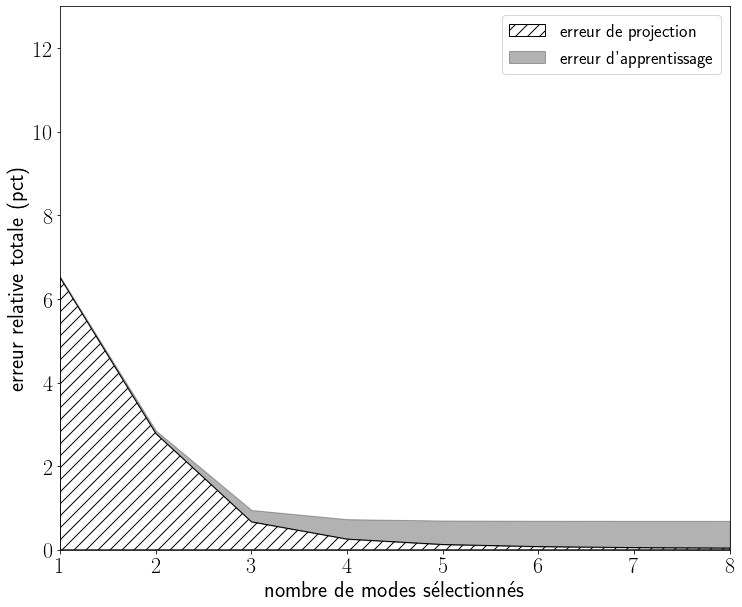

In [339]:
#plot surrogate_precision
df=surpres

#variance prédictive : std**2
#part irréductible : stdz**2.
#tracer en-dessous la part irréductible, puis on top la part de calibration.

fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(12,10))

ax1.fill_between(df['nmodes'],0,100*df['projerr'],facecolor='none',edgecolor='black',hatch='//',label='erreur de projection')
ax1.fill_between(df['nmodes'],100*df['projerr'],100*df['errtot'],alpha=0.3,color='black',label="erreur d'apprentissage")

ax1.legend()
ax1.set_xlim([1,8])
ax1.set_ylim([0,13])
ax1.set_xlabel('nombre de modes sélectionnés')
ax1.set_ylabel('erreur relative totale (pct)')




In [305]:
print(surpres)

   nmodes    errtot   projerr
0     1.0  0.127373  0.127060
1     2.0  0.050205  0.048629
2     3.0  0.034277  0.031214
3     4.0  0.024000  0.018954
4     5.0  0.019248  0.012114
5     6.0  0.016028  0.005163
6     7.0  0.015472  0.002700
7     8.0  0.015358  0.001647


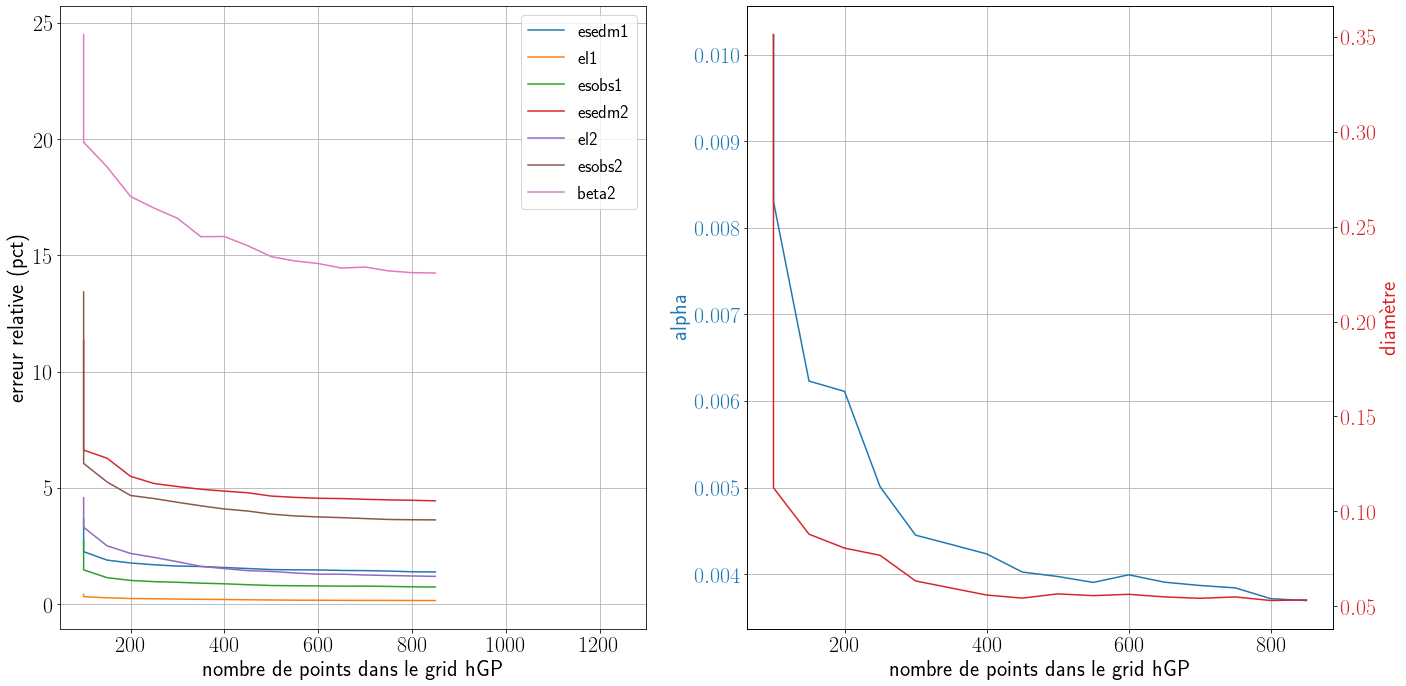

In [794]:
#hgps
df=hgps2

#variance prédictive : std**2
#part irréductible : stdz**2.
#tracer en-dessous la part irréductible, puis on top la part de calibration.

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,10))

ax1.plot('ngrid','esedm1',data=df)
ax1.plot('ngrid','el1',data=df)
ax1.plot('ngrid','esobs1',data=df)
ax1.plot('ngrid','esedm2',data=df)
ax1.plot('ngrid','el2',data=df)
ax1.plot('ngrid','esobs2',data=df)
ax1.plot('ngrid','beta2',data=df)
ax1.set_xlim([50,1300])
#ax1.set_ylim([0,8e-2])
ax1.set_xlabel('nombre de points dans le grid hGP')
ax1.set_ylabel('erreur relative (pct)')
ax1.grid()

color = 'tab:blue'
ax2.plot('ngrid','lperroralpha',data=df,color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax3=ax2.twinx();

ax2.set_ylabel('alpha',color=color)
color = 'tab:red'
ax3.plot('ngrid','lperrordiam',data=df,color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax2.grid()

ax2.set_xlabel('nombre de points dans le grid hGP')
ax3.set_ylabel('diamètre',color=color)
ax1.legend()
plt.tight_layout()

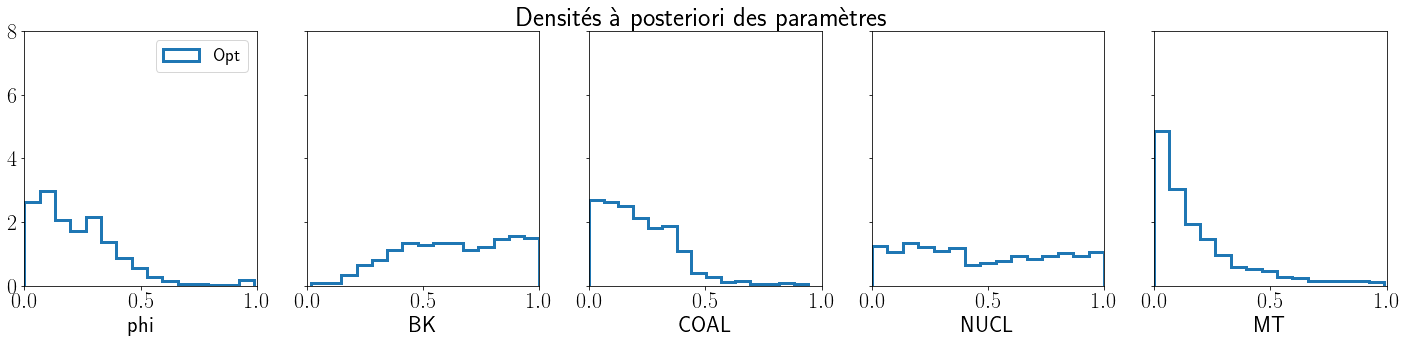

In [736]:
#etude hparsoptref. On vérifie que la distribution correspond bien à ce qu'on attend.
df=hparsoptref
nbins=15
alph=1


fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,sharey=True,sharex=True,figsize=(20,5))
ax1.set_xlim(0,1)
ax1.set_ylim(0,8)
ax1.hist(df['t1'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax1.set_xlabel('phi')
ax1.legend()
ax2.hist(df['t2'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax2.set_xlabel('BK')
ax3.hist(df['t3'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax3.set_xlabel('COAL')
ax4.hist(df['t4'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax4.set_xlabel('NUCL')
ax5.hist(df['t5'],bins=nbins,color='tab:blue',density=True,alpha=alph,histtype='step',linewidth=lw)
ax5.set_xlabel('MT')
plt.suptitle('Densités à posteriori des paramètres')
plt.tight_layout()



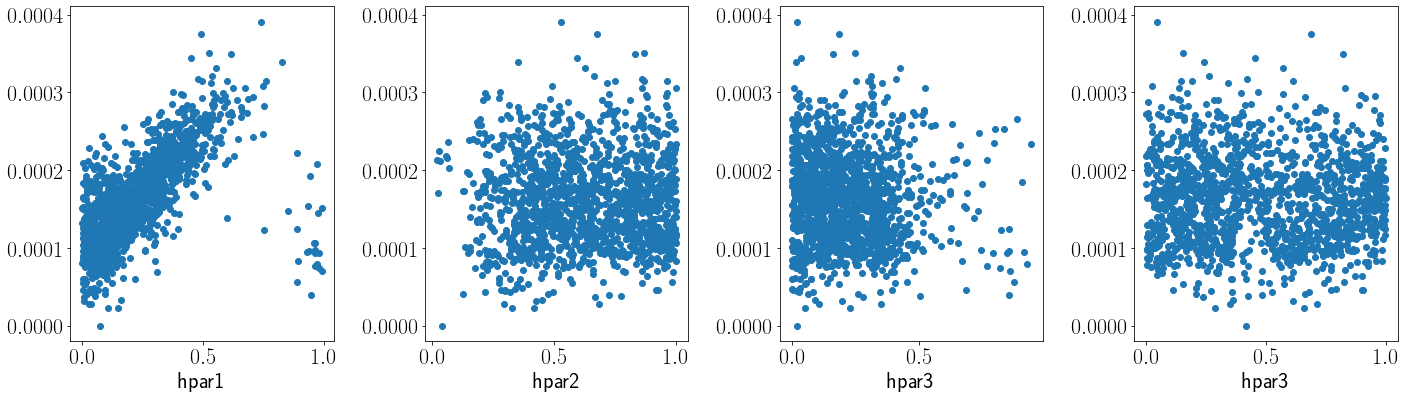

In [790]:
#on voit la distribution des hpars optimaux ?

df=hparsoptref
nbins=15
alph=1



fig,(ax1,ax2,ax3,ax4)=plt.subplots(nrows=1,ncols=4,figsize=(20,6))

ax1.scatter(df['t1'],df['beta2'])
ax1.set_xlabel('hpar1')

ax2.scatter(df['t2'],df['beta2'])
ax2.set_xlabel('hpar2')

ax3.scatter(df['t3'],df['beta2'])
ax3.set_xlabel('hpar3')

ax4.scatter(df['t4'],df['beta2'])
ax4.set_xlabel('hpar3')


plt.tight_layout()



In [42]:
print(samplesopt['hpar1'].mean())
print(samplesopt['hpar1'].std())
print(samplesfb['hpar1'].mean())
print(samplesfb['hpar1'].std())
print(sampleskoh['hpar3'])

0.00022009308877788878
5.332391344766075e-05
0.00028173279079079085
0.00010696681977158988
0       0.003552
1       0.003552
2       0.003552
3       0.003552
4       0.003552
          ...   
2998    0.003552
2999    0.003552
3000    0.003552
3001    0.003552
3002    0.003552
Name: hpar3, Length: 3003, dtype: float64


0.000240817


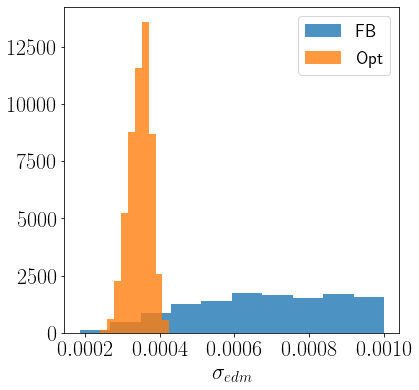

In [593]:
plt.figure(figsize=(6,6))
plt.hist(sampfbdiam['hpar1'],alpha=0.8,label='FB',density=True)
plt.hist(sampoptdiam['hpar1'],alpha=0.8,label='Opt',density=True)
#plt.hist(cond1d['hpar1'],alpha=0.5,label='cond1',density=True)
#plt.hist(cond2d['hpar1'],alpha=0.5,label='cond2',density=True)
#plt.hist(cond3d['hpar1'],alpha=0.5,label='cond3',density=True)
#plt.vlines(0.00035,0,5000,label='KOH')
plt.xlabel(r'$\sigma_{edm}$')
plt.legend()
print(sampoptdiam['hpar1'].min())

1498


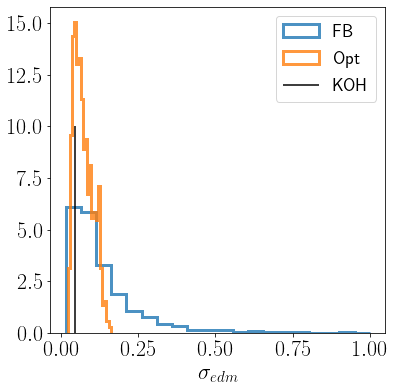

In [254]:
plt.figure(figsize=(6,6))
plt.hist(sampfbalpha['hpar1'],alpha=0.8,label='FB',density=True,bins=20,histtype='step',linewidth=3)
plt.hist(sampoptalpha['hpar1'],alpha=0.8,label='Opt',density=True,bins=20,histtype='step',linewidth=3)
#plt.hist(sampoptalphamodif['hpar1'],alpha=0.8,label='Optmodif',density=True)
#plt.hist(sampalphatheta1['hpar1'],alpha=0.8,label='marg1',density=True)
#plt.hist(cond1a['hpar1'],alpha=0.5,label='cond1',density=True)
#plt.hist(cond2a['hpar1'],alpha=0.5,label='cond2',density=True)
#plt.hist(cond3a['hpar1'],alpha=0.5,label='cond3',density=True)
plt.vlines(0.047,0,10,label='KOH')
plt.xlabel(r'$\sigma_{edm}$')
plt.legend()
print(len(sampfbalpha['hpar1']))


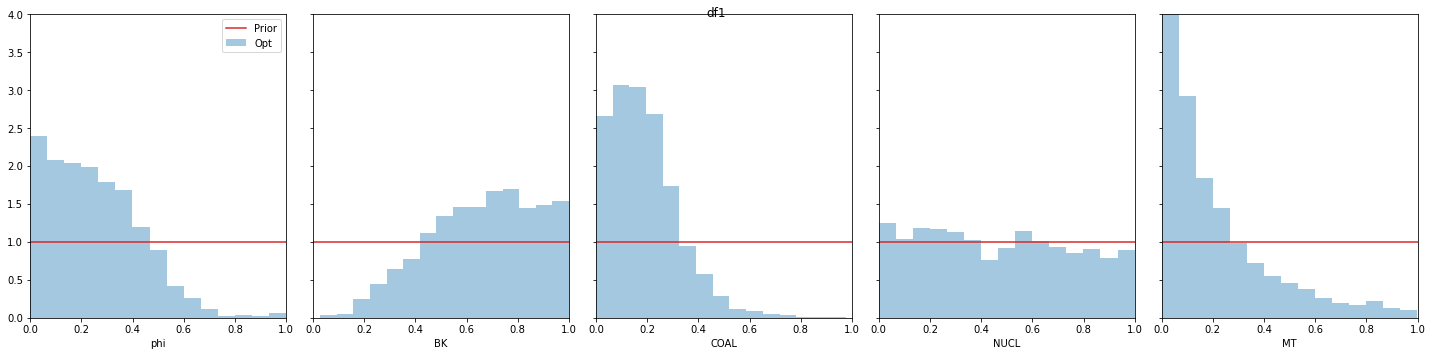

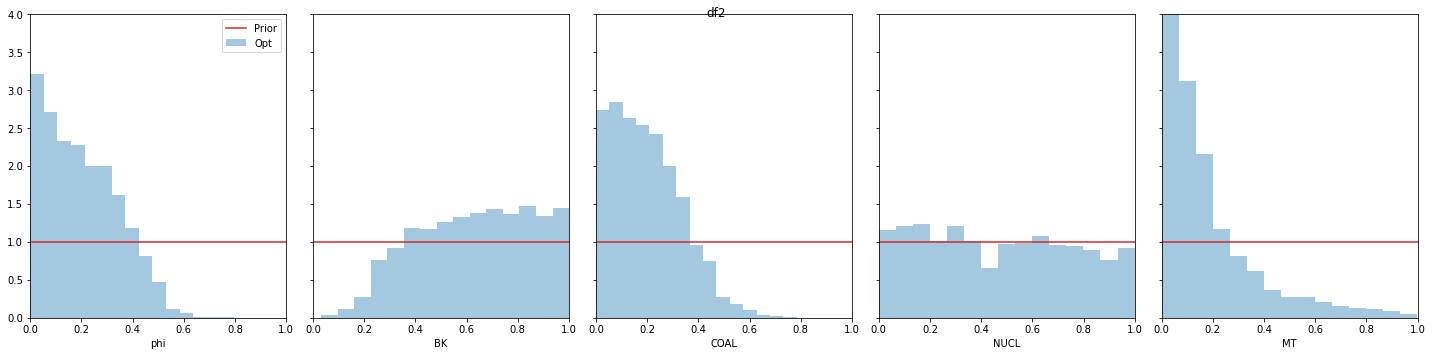

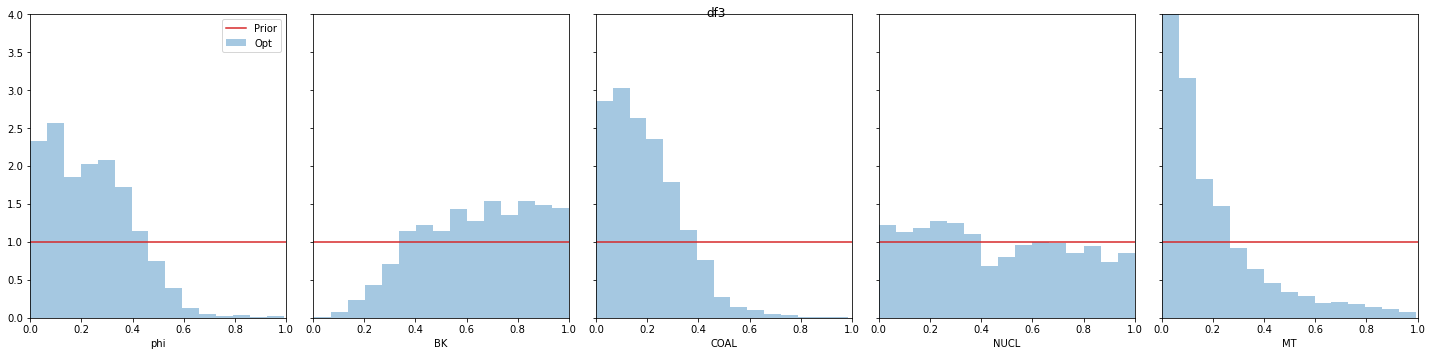

In [12]:
#comparaisons DOG
#en histogrammes, s'il vous plaît.
df1=sampoptalpha
df2=sampkohdiam
df3=sampfbalpha
nbins=15
alph=0.4


fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,sharey=True,sharex=True,figsize=(20,5))
ax1.set_xlim(0,1)
ax1.set_ylim(0,4)
ax1.hist(df1['phi'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt')
ax1.plot([0,1],[1,1],color='tab:red',label='Prior')
ax1.set_xlabel('phi')
ax1.legend()
ax2.hist(df1['BK'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax2.plot([0,1],[1,1],color='tab:red',label='Prior')
ax2.set_xlabel('BK')
ax3.hist(df1['COAL'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax3.plot([0,1],[1,1],color='tab:red',label='Prior')
ax3.set_xlabel('COAL')
ax4.hist(df1['NUCL'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax4.plot([0,1],[1,1],color='tab:red',label='Prior')
ax4.set_xlabel('NUCL')
ax5.hist(df1['MT'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax5.plot([0,1],[1,1],color='tab:red',label='Prior')
ax5.set_xlabel('MT')
plt.suptitle('df1')
plt.tight_layout()

fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,sharey=True,sharex=True,figsize=(20,5))
ax1.set_xlim(0,1)
ax1.set_ylim(0,4)
ax1.hist(df2['phi'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt')
ax1.plot([0,1],[1,1],color='tab:red',label='Prior')
ax1.set_xlabel('phi')
ax1.legend()
ax2.hist(df2['BK'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax2.plot([0,1],[1,1],color='tab:red',label='Prior')
ax2.set_xlabel('BK')
ax3.hist(df2['COAL'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax3.plot([0,1],[1,1],color='tab:red',label='Prior')
ax3.set_xlabel('COAL')
ax4.hist(df2['NUCL'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax4.plot([0,1],[1,1],color='tab:red',label='Prior')
ax4.set_xlabel('NUCL')
ax5.hist(df2['MT'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax5.plot([0,1],[1,1],color='tab:red',label='Prior')
ax5.set_xlabel('MT')
plt.suptitle('df2')
plt.tight_layout()

fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,sharey=True,sharex=True,figsize=(20,5))
ax1.set_xlim(0,1)
ax1.set_ylim(0,4)
ax1.hist(df3['phi'],bins=nbins,color='tab:blue',density=True,alpha=alph,label='Opt')
ax1.plot([0,1],[1,1],color='tab:red',label='Prior')
ax1.set_xlabel('phi')
ax1.legend()
ax2.hist(df3['BK'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax2.plot([0,1],[1,1],color='tab:red',label='Prior')
ax2.set_xlabel('BK')
ax3.hist(df3['COAL'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax3.plot([0,1],[1,1],color='tab:red',label='Prior')
ax3.set_xlabel('COAL')
ax4.hist(df3['NUCL'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax4.plot([0,1],[1,1],color='tab:red',label='Prior')
ax4.set_xlabel('NUCL')
ax5.hist(df3['MT'],bins=nbins,color='tab:blue',density=True,alpha=alph)
ax5.plot([0,1],[1,1],color='tab:red',label='Prior')
ax5.set_xlabel('MT')
plt.suptitle('df3')
plt.tight_layout()



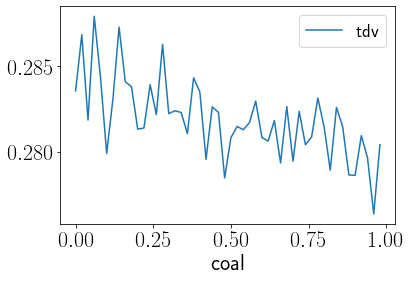

In [353]:
tdvgcoal.plot(x='coal',y='tdv')

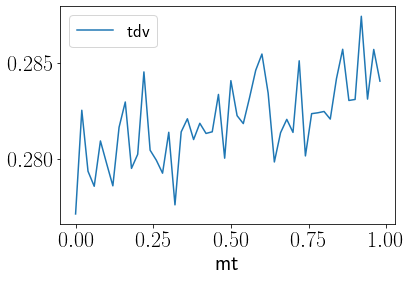

In [354]:
tdvgmt.plot(x='mt',y='tdv')

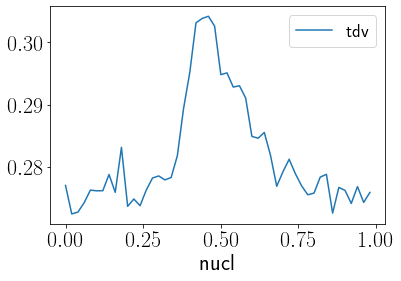

In [355]:
tdvgnucl.plot(x='nucl',y='tdv')

In [343]:
print(stats.query('phi>0.9').query('phi<1.1').query('BK<1.1').query('BK>0.9').query('COAL<1.1').query('COAL>0.9').query('NUCL<1.1').query('NUCL>0.9').query('MT<1.1').query('MT>0.9'))

     tauxparoi  tauxcoeur  tauxmoyen  diamparoi  diamcoeur  calcnr  \
361    0.40883   0.054439   0.273093   0.000171   0.000087   365.0   

       l2diamfull  l2diampartial      l2V1      l2V2       phi        BK  \
361  3.338550e-08   1.575340e-08  0.046835  0.065976  0.992578  0.915638   

       COAL     NUCL        MT  
361  1.0328  1.02103  0.912472  


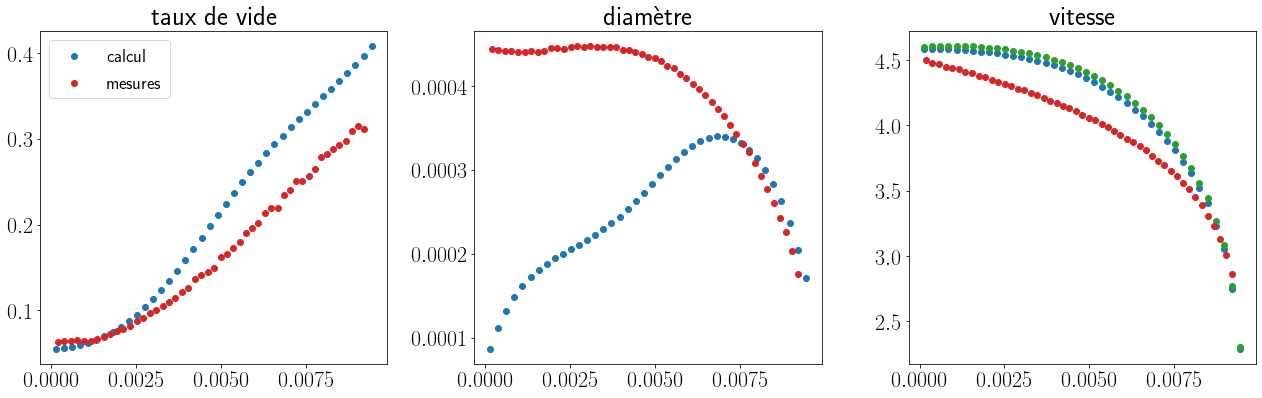

In [344]:
#calcul le plus proche du nominal
plot_calcul(365)

In [345]:
print(stats.sort_values(by='tauxmoyen',axis=0))

      tauxparoi     tauxcoeur  tauxmoyen  diamparoi  diamcoeur  calcnr  \
1771   0.336877  5.725480e-08   0.161500   0.000198   0.000010  1791.0   
1277   0.313882  3.596190e-04   0.161753   0.000395   0.000010  1295.0   
1899   0.346968  1.863800e-06   0.166100   0.000174   0.000010  1919.0   
62     0.331134  5.327150e-05   0.166923   0.000226   0.000010    63.0   
1992   0.334539  2.693030e-03   0.168103   0.000225   0.000026  2015.0   
...         ...           ...        ...        ...        ...     ...   
962    0.483971  2.535060e-01   0.401259   0.000150   0.000182   974.0   
1802   0.481356  2.715420e-01   0.401692   0.000152   0.000350  1822.0   
189    0.493224  2.331370e-01   0.402110   0.000121   0.000237   190.0   
693    0.480756  2.951740e-01   0.406293   0.000188   0.000425   702.0   
1135   0.521025  1.913620e-01   0.406681   0.000092   0.000162  1150.0   

        l2diamfull  l2diampartial      l2V1      l2V2       phi        BK  \
1771  8.802780e-08   5.368370e-08 

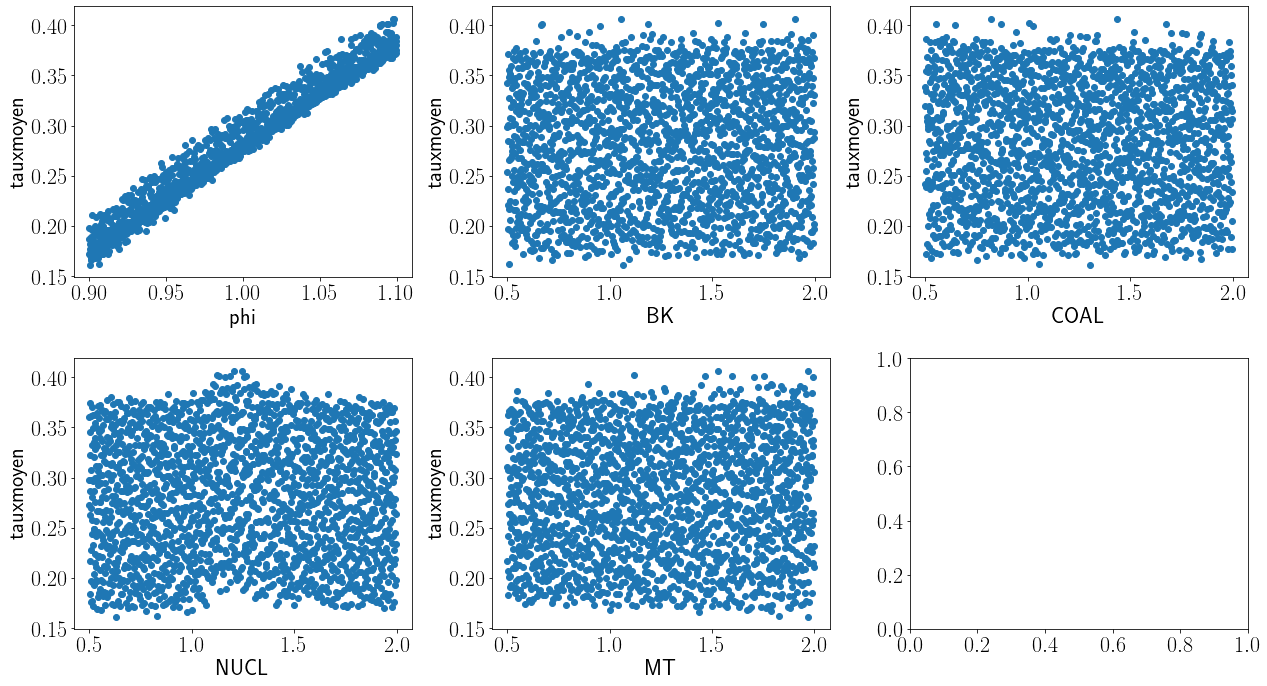

In [346]:
#plot des histogrammes 2D entrées-sorties
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(18,10))

ymin=0.2
ymax=0.55

nbins=15
ps=3

ax1.scatter(stats['phi'],stats['tauxmoyen'])
ax1.set_xlabel('phi')
ax1.set_ylabel('tauxmoyen')

ax2.scatter(stats['BK'],stats['tauxmoyen'])
ax2.set_xlabel('BK')
ax2.set_ylabel('tauxmoyen')

ax3.scatter(stats['COAL'],stats['tauxmoyen'])
ax3.set_xlabel('COAL')
ax3.set_ylabel('tauxmoyen')

ax4.scatter(stats['NUCL'],stats['tauxmoyen'])
ax4.set_xlabel('NUCL')
ax4.set_ylabel('tauxmoyen')

ax5.scatter(stats['MT'],stats['tauxmoyen'])
ax5.set_xlabel('MT')
ax5.set_ylabel('tauxmoyen')


plt.tight_layout()
plt.show()



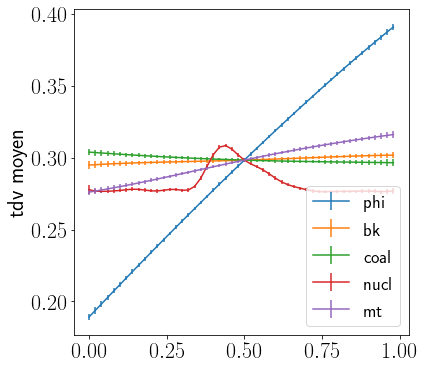

In [366]:
#affichage des oat
plt.figure(figsize=[6,6])
plt.errorbar(oatphi['phi'],oatphi['tvmean'],yerr=oatphi['tvstd'],label='phi')
plt.errorbar(oatbk['bk'],oatbk['tvmean'],yerr=oatbk['tvstd'],label='bk')
plt.errorbar(oatcoal['coal'],oatcoal['tvmean'],yerr=oatcoal['tvstd'],label='coal')
plt.errorbar(oatnucl['nucl'],oatnucl['tvmean'],yerr=oatnucl['tvstd'],label='nucl')
plt.errorbar(oatmt['mt'],oatmt['tvmean'],yerr=oatmt['tvstd'],label='mt')
plt.legend(loc='lower right')
plt.ylabel('tdv moyen')
plt.show()

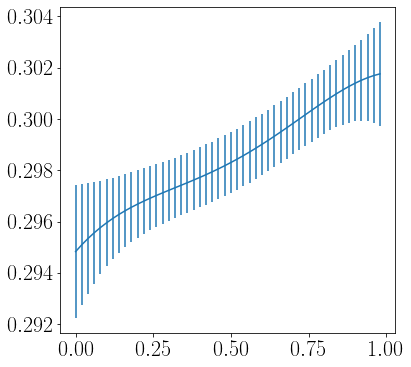

In [357]:
plt.figure(figsize=[6,6])
plt.errorbar(oatbk['bk'],oatbk['tvmean'],yerr=oatbk['tvstd'])
plt.show()

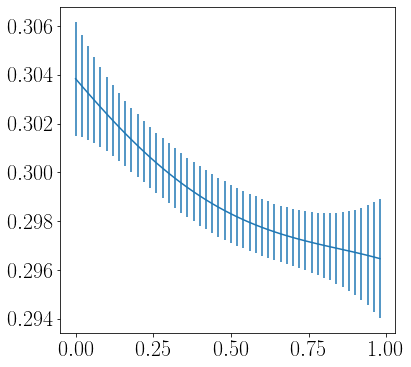

In [358]:
plt.figure(figsize=[6,6])
plt.errorbar(oatcoal['coal'],oatcoal['tvmean'],yerr=oatcoal['tvstd'])
plt.show()

In [517]:
#likelihood_study
t1=pd.DataFrame(data=np.loadtxt("studies/likelihood_study/results/gridt1.gnu"),columns=['sedm','l','fit','complexity','loglik'])
t2=pd.DataFrame(data=np.loadtxt("studies/likelihood_study/results/gridt2.gnu"),columns=['sedm','l','fit','complexity','loglik'])

print(t1['fit'])

0      -65.1790
1      -63.6993
2      -62.3619
3      -61.1663
4      -60.1119
         ...   
9995   -34.5141
9996   -37.6515
9997   -41.1000
9998   -44.8971
9999   -49.0855
Name: fit, Length: 10000, dtype: float64


-0.00167841
500.791
          sedm         l      fit  complexity   loglik
4853  0.000636  0.005741 -20.2023     520.994  500.791


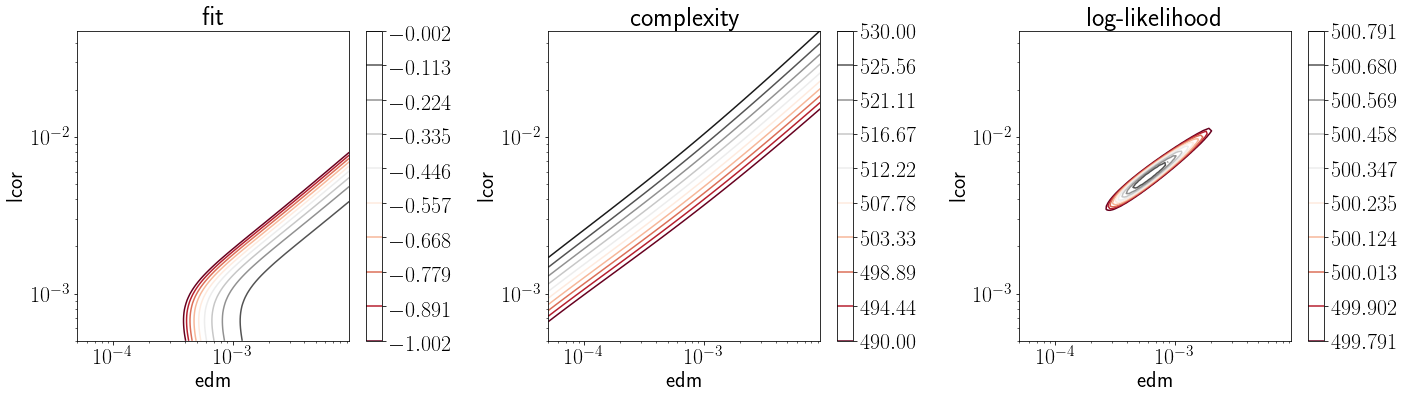

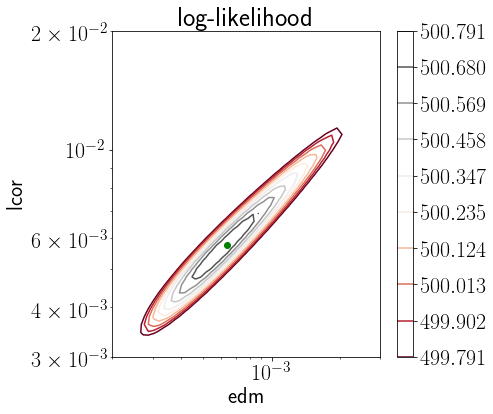

In [850]:
#X,Y=np.meshgrid(t1['sedm'],t1['l'])
x=t1['sedm']
y=t1['l']
z1=t1['fit']
z2=t1['complexity']
z3=t1['loglik']

cmap='RdGy'
nsteps=10
probstep=1

print(np.max(z1))

print(np.max(z3))

Z1=np.reshape(np.array(z1),(-1,100),order='F')
Z2=np.reshape(np.array(z2),(-1,100),order='F')
Z3=np.reshape(np.array(z3),(-1,100),order='F')

x=np.unique(np.array(x))
y=np.unique(np.array(y))
X,Y=np.meshgrid(x,y)


fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
levels = np.linspace(np.max(z1)-probstep, np.max(z1), nsteps)
c=ax1.contour(X, Y, Z1,cmap=cmap,levels=levels)
plt.colorbar(c,ax=ax1)
ax1.set_xlabel('edm')
ax1.set_ylabel('lcor')
ax1.set_title('fit')
ax1.set_xscale('log')
ax1.set_yscale('log')

#levels = np.linspace(np.max(z2)-probstep, np.max(z2), nsteps)
levels = np.linspace(490, 530, nsteps)
c=ax2.contour(X, Y, Z2, 20,cmap=cmap,levels=levels)
plt.colorbar(c,ax=ax2)
ax2.set_xlabel('edm')
ax2.set_ylabel('lcor')
ax2.set_title('complexity')
ax2.set_xscale('log')
ax2.set_yscale('log')

levels = np.linspace(np.max(z3)-probstep, np.max(z3), nsteps)
c=ax3.contour(X, Y, Z3,cmap=cmap,levels=levels)
plt.colorbar(c,ax=ax3)
ax3.set_xlabel('edm')
ax3.set_ylabel('lcor')
ax3.set_title('log-likelihood')
ax3.set_xscale('log')
ax3.set_yscale('log')
plt.tight_layout()

(fig,ax3)=plt.subplots(figsize=(6,6))
levels = np.linspace(np.max(z3)-probstep, np.max(z3), nsteps)
c=ax3.contour(X, Y, Z3,cmap=cmap,levels=levels)
plt.colorbar(c,ax=ax3)
ax3.scatter(0.000636,0.005741,color='green',label='ok')
ax3.set_xlabel('edm')
ax3.set_ylabel('lcor')
ax3.set_title('log-likelihood')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim(2e-4,3e-3)
ax3.set_ylim(3e-3,2e-2)

print(t1.sort_values('loglik',ascending=False).head(1))

-0.000786053
489.927
          sedm         l      fit  complexity   loglik
3034  0.000245  0.002393 -19.2524     509.179  489.927


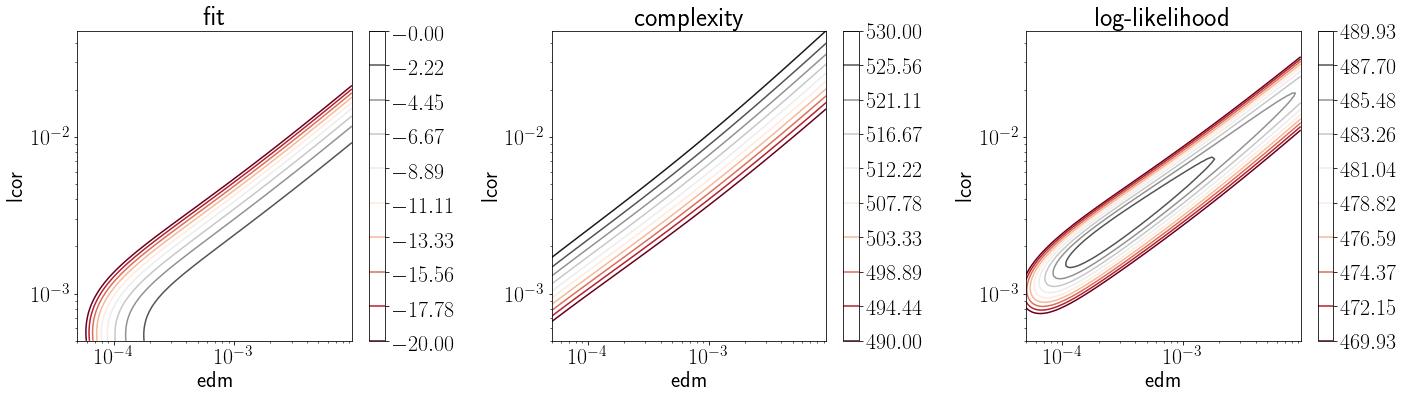

In [528]:
#X,Y=np.meshgrid(t1['sedm'],t1['l'])
x=t2['sedm']
y=t2['l']
z1=t2['fit']
z2=t2['complexity']
z3=t2['loglik']

cmap='RdGy'
nsteps=10
probstep=20

print(np.max(z1))

print(np.max(z3))

Z1=np.reshape(np.array(z1),(-1,100),order='F')
Z2=np.reshape(np.array(z2),(-1,100),order='F')
Z3=np.reshape(np.array(z3),(-1,100),order='F')

x=np.unique(np.array(x))
y=np.unique(np.array(y))
X,Y=np.meshgrid(x,y)


fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
levels = np.linspace(np.max(z1)-probstep, np.max(z1), nsteps)
c=ax1.contour(X, Y, Z1,cmap=cmap,levels=levels)
plt.colorbar(c,ax=ax1)
ax1.set_xlabel('edm')
ax1.set_ylabel('lcor')
ax1.set_title('fit')
ax1.set_xscale('log')
ax1.set_yscale('log')


#levels = np.linspace(np.max(z2)-probstep, np.max(z2), nsteps)
levels = np.linspace(490, 530, nsteps)
c=ax2.contour(X, Y, Z2, 20,cmap=cmap,levels=levels)
plt.colorbar(c,ax=ax2)
ax2.set_xlabel('edm')
ax2.set_ylabel('lcor')
ax2.set_title('complexity')
ax2.set_xscale('log')
ax2.set_yscale('log')

levels = np.linspace(np.max(z3)-probstep, np.max(z3), nsteps)
c=ax3.contour(X, Y, Z3,cmap=cmap,levels=levels)
plt.colorbar(c,ax=ax3)
ax3.set_xlabel('edm')
ax3.set_ylabel('lcor')
ax3.set_title('log-likelihood')
plt.tight_layout()
ax3.set_xscale('log')
ax3.set_yscale('log')

print(t2.sort_values('loglik',ascending=False).head(1))

In [765]:
foldname='studies/optimal_hpars_study/results/'
test1=pd.DataFrame(data=np.loadtxt(foldname+'test1.gnu'),columns=['t1','t2','t3','t4','t5','edm','l','obs','beta','ll','llp'])

<Figure size 432x432 with 0 Axes>

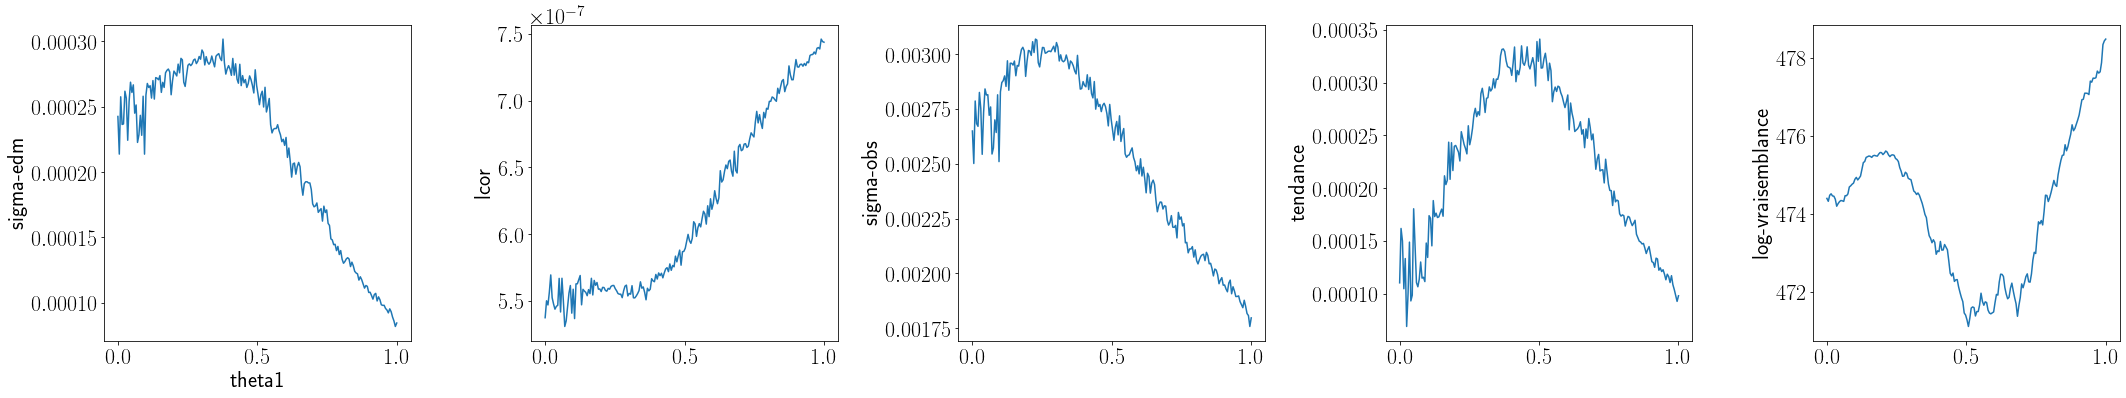

In [780]:
plt.figure(figsize=[6,6])
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,figsize=(30,6))
ax1.plot('t1','edm',data=test1)
ax1.set_ylabel('sigma-edm')
ax1.set_xlabel('theta1')
ax2.plot('t1','l',data=test1)
ax2.set_ylabel('lcor')
ax3.plot('t1','obs',data=test1)
ax3.set_ylabel('sigma-obs')
ax4.plot('t1','beta',data=test1)
ax4.set_ylabel('tendance')

ax5.plot('t1','llp',data=test1)
ax5.set_ylabel('log-vraisemblance')
plt.tight_layout()

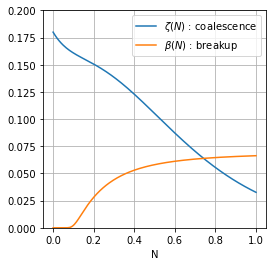

In [25]:
def fsrc(x):
    return 0.18*(1+2.75*x+12.9*x**2)*np.exp(-4.52*x)

def fsti(x):
    x1=8.06*x
    return 0.0696*(1+2.027*x1**(-3.26))*np.exp(-3.29*x1**(-2))

X=np.linspace(1e-4,1,200)
plt.figure(figsize=[4,4])
plt.plot(X,fsrc(X),label=r'$\zeta(N)$ : coalescence')
plt.plot(X,fsti(X),label=r'$\beta(N)$ : breakup')
plt.xlabel('N')
plt.grid()

plt.ylim([0,0.2])
plt.legend()

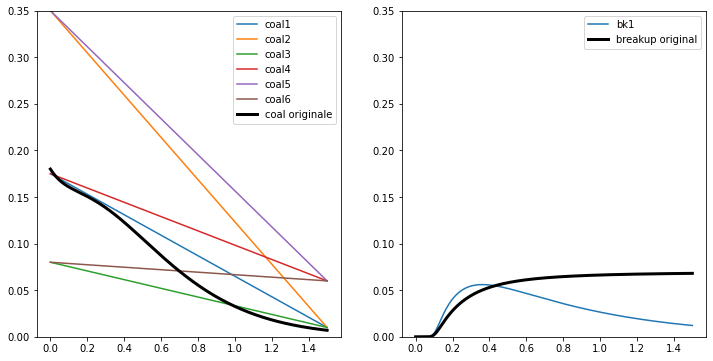

In [101]:
def coal1(x):
    yinit=0.175
    yend=0.01
    xend=1.5
    return yinit+ x* (yend-yinit)/xend

def coal2(x):
    yinit=0.35
    yend=0.01
    xend=1.5
    return yinit+ x* (yend-yinit)/xend

def coal3(x):
    yinit=0.08
    yend=0.01
    xend=1.5
    return yinit+ x* (yend-yinit)/xend

def coal4(x):
    yinit=0.175
    yend=0.06
    xend=1.5
    return yinit+ x* (yend-yinit)/xend

def coal5(x):
    yinit=0.35
    yend=0.06
    xend=1.5
    return yinit+ x* (yend-yinit)/xend

def coal6(x):
    yinit=0.08
    yend=0.06
    xend=1.5
    return yinit+ x* (yend-yinit)/xend





def bk1(x):
    x1=8.06*x
    return 0.0696*(1+2.027*x1**(-3.26))*np.exp(-3.29*x1**(-2))*np.exp(-0.2*x1)*2

X=np.linspace(1e-4,1.5,200)


fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax1.plot(X,coal1(X),label='coal1')
ax1.plot(X,coal2(X),label='coal2')
ax1.plot(X,coal3(X),label='coal3')
ax1.plot(X,coal4(X),label='coal4')
ax1.plot(X,coal5(X),label='coal5')
ax1.plot(X,coal6(X),label='coal6')
ax1.plot(X,fsrc(X),label='coal originale',color='black',lw=3)
ax1.legend()
ax1.set_ylim([0,0.35])

ax2.plot(X,bk1(X),label='bk1')
ax2.plot(X,fsti(X),label='breakup original',color='black',lw=3)

ax2.set_ylim([0,0.35])
plt.legend()

In [837]:
#pour afficher les theta succintement.

added_samples=pd.DataFrame(data=np.loadtxt("studies/double_calibration_withmean/results/added_samples_mcmc.gnu"),columns=['t1','t2','t3','t4','t5','h1','h2','h3'])
print(added_samples)

            t1        t2        t3        t4        t5        h1        h2  \
0     0.500000  0.333333  0.200000  0.142857  0.090909  0.077450  0.002156   
1     0.250000  0.666667  0.400000  0.285714  0.181818  0.077783  0.002146   
2     0.750000  0.111111  0.600000  0.428571  0.272727  0.112926  0.002157   
3     0.125000  0.444444  0.800000  0.571429  0.363636  0.049210  0.002128   
4     0.625000  0.777778  0.040000  0.714286  0.454545  0.133546  0.002198   
...        ...       ...       ...       ...       ...       ...       ...   
1417  0.106928  0.689845  0.188031  0.567820  0.171607  0.103272  0.002113   
1418  0.326740  0.703218  0.262313  0.963411  0.101819  0.095331  0.002163   
1419  0.022093  0.324012  0.177758  0.162153  0.272644  0.080690  0.002095   
1420  0.172403  0.913426  0.220077  0.025599  0.324439  0.108361  0.002126   
1421  0.107309  0.833636  0.331795  0.733898  0.196688  0.095456  0.002113   

            h3  
0     0.001768  
1     0.001682  
2     0.0023

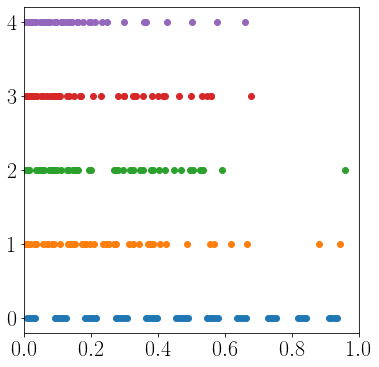

In [836]:
#qte de 0 à 4
qte=4
plt.figure(figsize=[6,6])
plt.xlim([0,1])
for i in range(5):
    imin=50*i
    imax=50*(i+1)
    I=np.full(added_samples.iloc[imin:imax,qte].shape,i)
    plt.scatter(added_samples.iloc[imin:imax,qte],I)

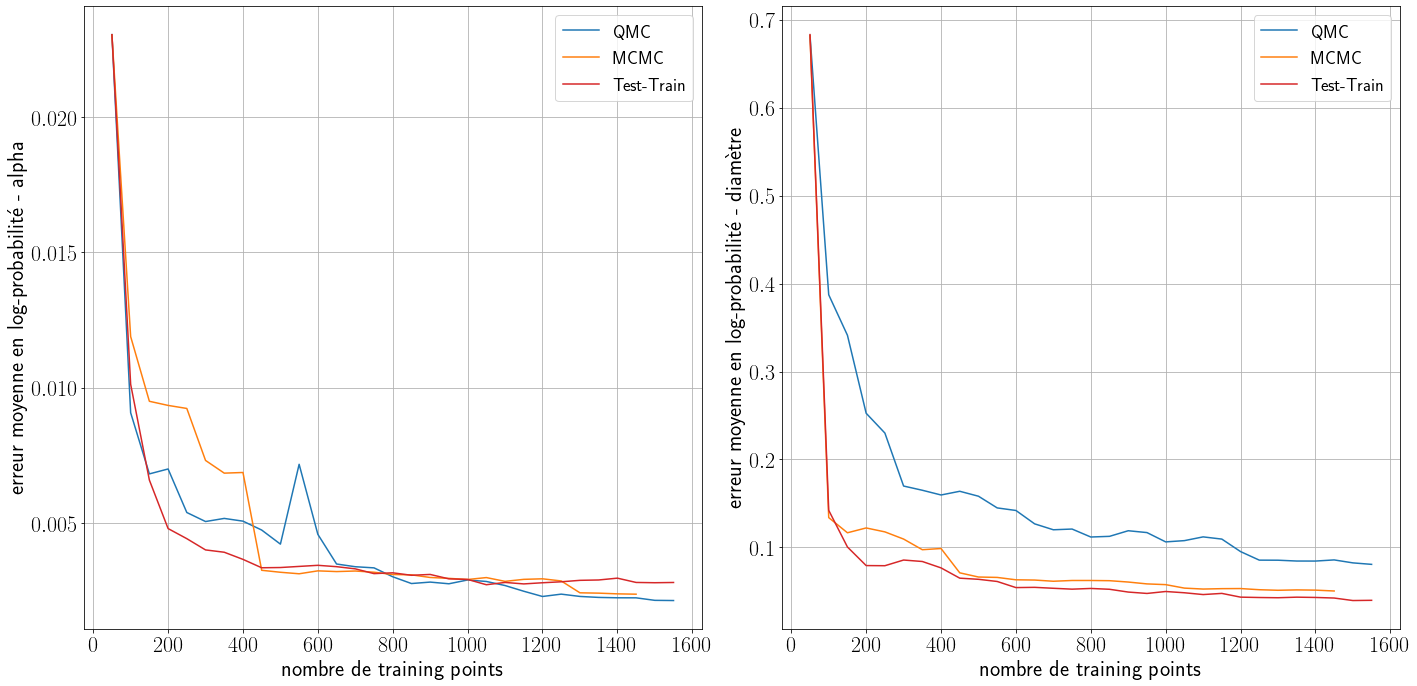

In [859]:
hgps_mcmc=pd.DataFrame(data=np.loadtxt('studies/double_calibration_withmean/results/convergence_mcmc.gnu'),columns=['ngrid','esedm1','el1','esobs1','esedm2','el2','esobs2','beta2','lperroralpha','lperrordiam','mcmctime','constrtime'])
hgps_qmc=pd.DataFrame(data=np.loadtxt('studies/double_calibration_withmean/results/convergence_qmc.gnu'),columns=['ngrid','esedm1','el1','esobs1','esedm2','el2','esobs2','beta2','lperroralpha','lperrordiam'])
hgps_testtrain=pd.DataFrame(data=np.loadtxt('studies/double_calibration_withmean/results/convergence_testtrain.gnu'),columns=['ngrid','esedm1','el1','esobs1','esedm2','el2','esobs2','beta2','lperroralpha','lperrordiam'])


#hgps
df1=hgps_qmc
df2=hgps_mcmc
df3=hgps_testtrain

#variance prédictive : std**2
#part irréductible : stdz**2.
#tracer en-dessous la part irréductible, puis on top la part de calibration.

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,10))


ax1.plot('ngrid','lperroralpha',data=df1,color='tab:blue',label='QMC')
ax1.plot('ngrid','lperroralpha',data=df2,color='tab:orange',label='MCMC')
ax1.plot('ngrid','lperroralpha',data=df3,color='tab:red',label='Test-Train')
ax1.set_xlabel('nombre de training points')
ax1.set_ylabel('erreur moyenne en log-probabilité - alpha')
ax1.legend()
ax1.grid()

ax2.plot('ngrid','lperrordiam',data=df1,color='tab:blue',label='QMC')
ax2.plot('ngrid','lperrordiam',data=df2,color='tab:orange',label='MCMC')
ax2.plot('ngrid','lperrordiam',data=df3,color='tab:red',label='Test-Train')
ax2.set_xlabel('nombre de training points')
ax2.set_ylabel('erreur moyenne en log-probabilité - diamètre')
ax2.legend()
ax2.grid()

plt.tight_layout()

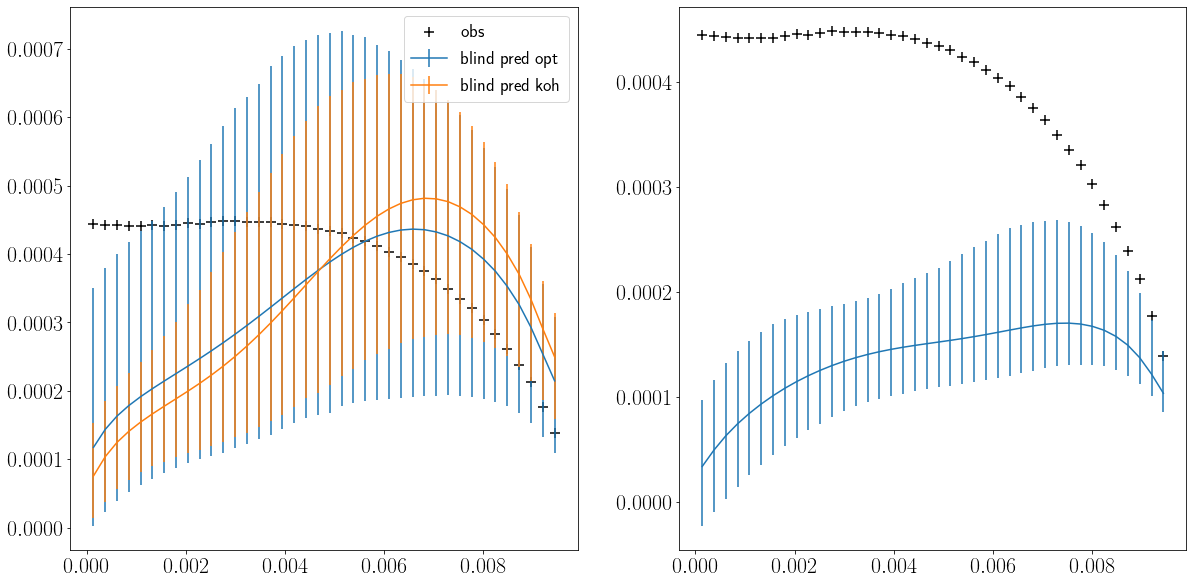

In [871]:
Xpredkohdiam=pd.DataFrame(data=np.loadtxt("studies/crossapplication/results/crosspreds/diamkohF.gnu"),columns=['x','postmean','q25','q75','q2.5','q97.5','mean'])
Xpredoptdiam=pd.DataFrame(data=np.loadtxt("studies/crossapplication/results/crosspreds/diamoptF.gnu"),columns=['x','postmean','q25','q75','q2.5','q97.5','mean'])
predFoptdiam=pd.DataFrame(data=np.loadtxt("studies/crossapplication/results/preds/diamoptF.gnu"),columns=['x','postmean','q25','q75','q2.5','q97.5','mean'])

df1=Xpredkohdiam
df2=Xpredoptdiam
df3=predFoptdiam
#plot des observations diam
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax1.errorbar(df2['x'],df2['postmean'],yerr=(df2['postmean']-df2['q2.5'],df2['q97.5']-df2['postmean']),label='blind pred opt')


ax1.errorbar(df1['x'],df1['postmean'],yerr=(df1['postmean']-df1['q2.5'],df1['q97.5']-df1['postmean']),label='blind pred koh')

ax1.scatter(dtf['x'],dtf['truth'],s=100,marker='+',linewidths=10,color='black',label='obs')
ax1.legend()


ax2.errorbar(df3['x'],df3['postmean'],yerr=(df3['postmean']-df3['q2.5'],df3['q97.5']-df3['postmean']),label='pred opt')

ax2.scatter(dtf['x'],dtf['truth'],s=100,marker='+',linewidths=10,color='black',label='obs')

[0.333656  0.0453317]


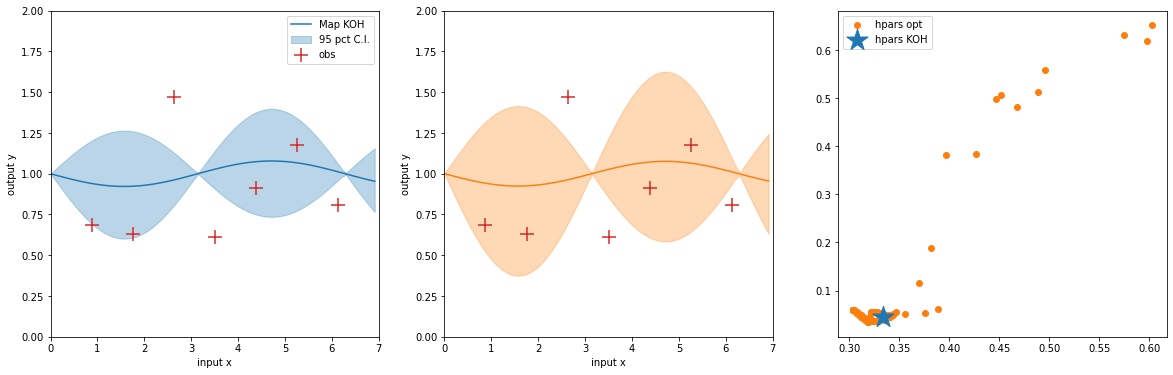

In [36]:
#exemple illustratif.
kohi=pd.DataFrame(data=np.loadtxt("exemple_illustratif/results/preds/predskohF.gnu"),columns=['x','meanf','q25','q75','q2p5','q97p5','fmap'])
opti=pd.DataFrame(data=np.loadtxt("exemple_illustratif/results/preds/predsoptF.gnu"),columns=['x','meanf','q25','q75','q2p5','q97p5','fmap'])
obsi=pd.DataFrame(data=np.loadtxt("exemple_illustratif/results/obs.gnu"),columns=['x','y'])
hparsopti=pd.DataFrame(data=np.loadtxt("exemple_illustratif/results/save/sampopt.gnu"),columns=['t','sedm','l'])

hparskoh=np.array(pd.DataFrame(data=np.loadtxt("exemple_illustratif/results/save/sampkoh.gnu"),columns=['t','sedm','l']).iloc[0,1:])

print(hparskoh)
colorkoh='tab:blue'
coloropt='tab:orange'
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
ax1.plot(kohi['x'],kohi['fmap'],label='Map KOH',color=colorkoh)
ax1.fill_between(kohi['x'],kohi['q2p5'],kohi['q97p5'],label='95 pct C.I.',alpha=0.3,color=colorkoh)
ax1.scatter(obsi['x'],obsi['y'],label='obs',color='tab:red',marker='+',s=200)
ax1.set_xlim([0,7])
ax1.set_ylim([0,2])
ax1.set_xlabel('input x')
ax1.set_ylabel('output y')
ax1.legend()

ax2.plot(opti['x'],opti['fmap'],label='Map KOH',color=coloropt)
ax2.fill_between(opti['x'],opti['q2p5'],opti['q97p5'],label='95 pct C.I.',alpha=0.3,color=coloropt)
ax2.scatter(obsi['x'],obsi['y'],label='obs',color='tab:red',marker='+',s=200)
ax2.set_xlim([0,7])
ax2.set_ylim([0,2])
ax2.set_xlabel('input x')
ax2.set_ylabel('output y')

ax3.scatter(hparsopti['sedm'],hparsopti['l'],marker='o',label='hpars opt',color=coloropt)
ax3.scatter(hparskoh[0],hparskoh[1],marker='*',label='hpars KOH',s=500,color=colorkoh)
ax3.legend()




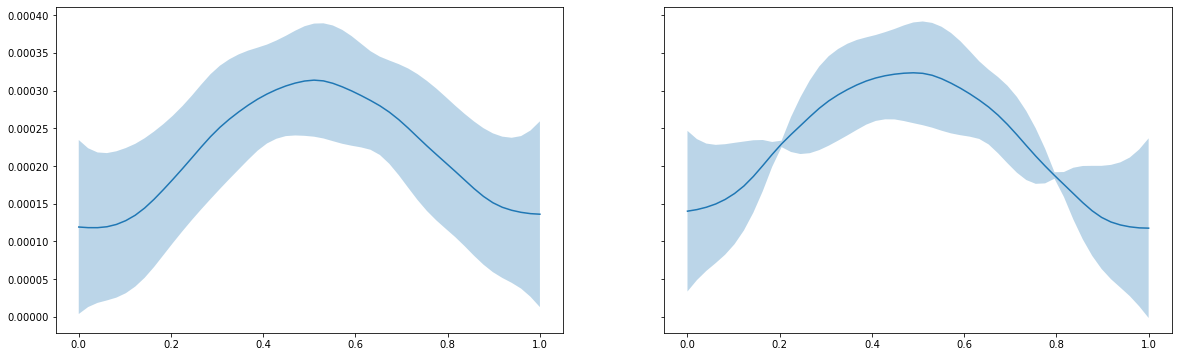

In [148]:
#adaptative sampling. Etude du choix de points intelligent pour les hGPs.
oat=pd.DataFrame(data=np.loadtxt("studies/hGP_adaptative_sampling/results/oat.gnu"),columns=['t','h1','sh1','h2','sh2','h3','sh3','h4','sh4'])
oatnew=pd.DataFrame(data=np.loadtxt("studies/hGP_adaptative_sampling/results/oatnew.gnu"),columns=['t','h1','sh1','h2','sh2','h3','sh3','h4','sh4'])

h='h4'
s='sh4'

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6),sharex=True,sharey=True)
ax1.plot(oat['t'],oat[h])
ax1.fill_between(oat['t'],oat[h]-3*oat[s],oat[h]+3*oat[s],alpha=.3)

ax2.plot(oatnew['t'],oatnew[h])
ax2.fill_between(oatnew['t'],oatnew[h]-3*oatnew[s],oatnew[h]+3*oatnew[s],alpha=.3)



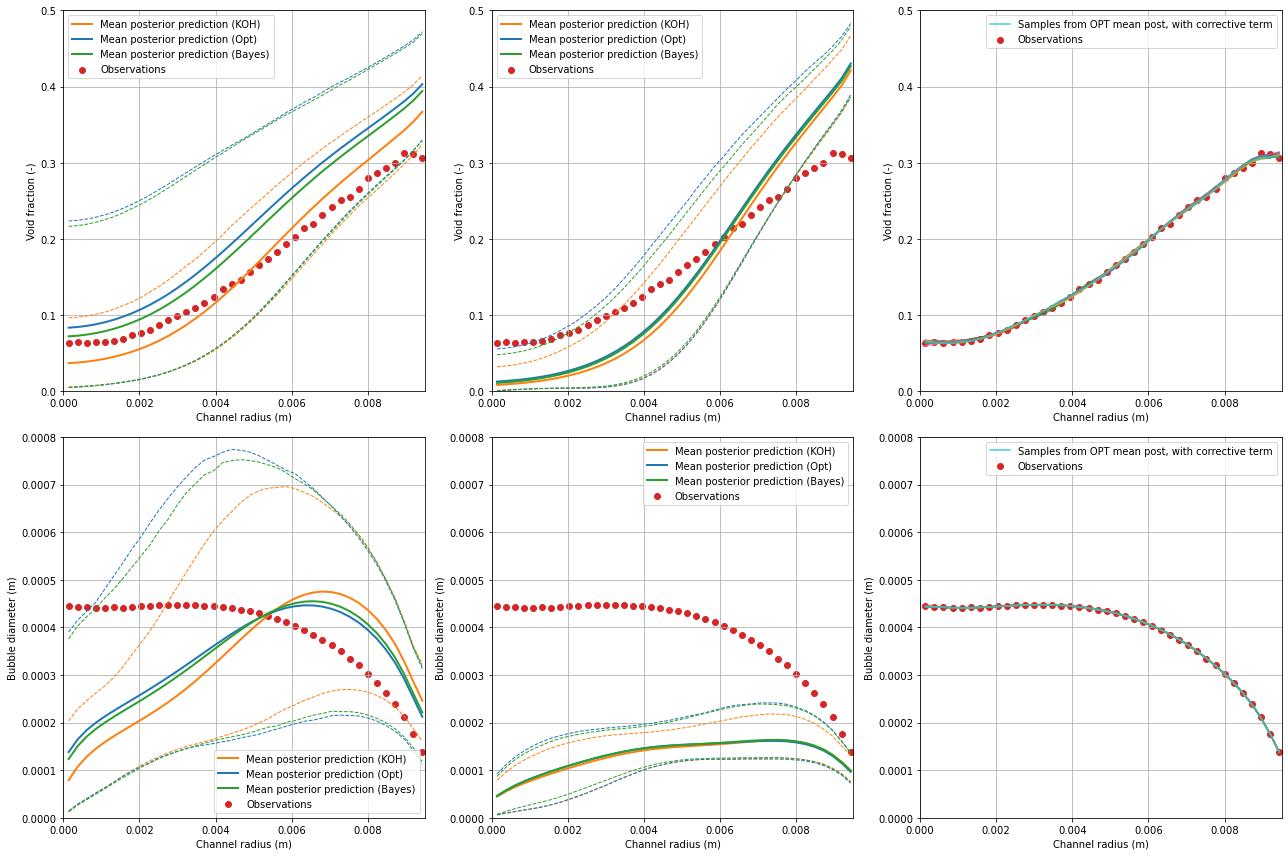

In [5]:
#predictionsF. Essayer de faire une figure compréhensible...

foldname="final_calibration/double_calibration_withmean/results/preds/"
foldname2="final_calibration/test_algo_opti/results/"
foldname3="final_calibration/simple_calibration_alpha/results/preds/"

#loading des prédictionF avec alpha et diamètre
alphaopt=pd.DataFrame(data=np.loadtxt(foldname+"predsoptalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
alphakoh=pd.DataFrame(data=np.loadtxt(foldname+"predskohalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
alphafb=pd.DataFrame(data=np.loadtxt(foldname+"predsfbalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])

diamopt=pd.DataFrame(data=np.loadtxt(foldname+"predsoptdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
diamkoh=pd.DataFrame(data=np.loadtxt(foldname+"predskohdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
diamfb=pd.DataFrame(data=np.loadtxt(foldname+"predsfbdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])

#loading des trajectoires avec alpha et diamètre

trajopta=pd.DataFrame(data=np.loadtxt(foldname+"predsoptalpha.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
trajkoha=pd.DataFrame(data=np.loadtxt(foldname+"predskohalpha.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
trajfba=pd.DataFrame(data=np.loadtxt(foldname+"predsfbalpha.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

trajoptd=pd.DataFrame(data=np.loadtxt(foldname+"predsoptdiam.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
trajkohd=pd.DataFrame(data=np.loadtxt(foldname+"predskohdiam.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
trajfbd=pd.DataFrame(data=np.loadtxt(foldname+"predsfbdiam.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])


#loading des prédictions avec alpha only
salphaopt=pd.DataFrame(data=np.loadtxt(foldname3+"predsoptalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
salphakoh=pd.DataFrame(data=np.loadtxt(foldname3+"predskohalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
salphafb=pd.DataFrame(data=np.loadtxt(foldname3+"predsfbalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])

sdiamopt=pd.DataFrame(data=np.loadtxt(foldname3+"predsoptdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
sdiamkoh=pd.DataFrame(data=np.loadtxt(foldname3+"predskohdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
sdiamfb=pd.DataFrame(data=np.loadtxt(foldname3+"predsfbdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])



obs=pd.DataFrame(data=np.loadtxt(foldname2+"obs.gnu"),columns=['x','alpha','diam'])


#paramètres
sampleslabels=['s1','s2','s3','s4','s5','s6','s7','s8','s9']
xlim=[0,9.5e-3]
ylim_alpha=[0,0.5]
ylim_diam=[0,8e-4]

#colors
copt='tab:blue'
ckoh='tab:orange'
cfb='tab:green'
cobs='tab:red'

#labels
labelobs='Observations'
labelkoh='Mean posterior prediction (KOH)'
labelopt='Mean posterior prediction (Opt)'
labelfb='Mean posterior prediction (Bayes)'
labelsamples='Samples from OPT mean post, with corrective term'

labelx='Channel radius (m)'
labely_alpha='Void fraction (-)'
labely_diam='Bubble diameter (m)'

#linewidths
lw1=2
lw2=1

fig,((ax2,ax3,ax1),(ax5,ax6,ax4))=plt.subplots(nrows=2,ncols=3,figsize=(18,12))
ax3.scatter(obs['x'],obs['alpha'],color=cobs,label=labelobs)

ax3.plot(alphakoh['x'],alphakoh['useless'],linewidth=lw1,color=ckoh,label=labelkoh)
ax3.plot(alphakoh['x'],alphakoh['q2p5'],linestyle='--',linewidth=lw2,color=ckoh)
ax3.plot(alphakoh['x'],alphakoh['q97p5'],linestyle='--',linewidth=lw2,color=ckoh)

ax3.plot(alphaopt['x'],alphaopt['useless'],linewidth=lw1,color=copt,label=labelopt)
ax3.plot(alphakoh['x'],alphaopt['q2p5'],linestyle='--',linewidth=lw2,color=copt)
ax3.plot(alphakoh['x'],alphaopt['q97p5'],linestyle='--',linewidth=lw2,color=copt)

ax3.plot(alphafb['x'],alphafb['useless'],linewidth=lw1,color=cfb,label=labelfb)
ax3.plot(alphakoh['x'],alphafb['q2p5'],linestyle='--',linewidth=lw2,color=cfb)
ax3.plot(alphakoh['x'],alphafb['q97p5'],linestyle='--',linewidth=lw2,color=cfb)


ax6.scatter(obs['x'],obs['diam'],color=cobs,label=labelobs)

ax6.plot(diamkoh['x'],diamkoh['useless'],linewidth=lw1,color=ckoh,label=labelkoh)
ax6.plot(diamkoh['x'],diamkoh['q2p5'],linestyle='--',linewidth=lw2,color=ckoh)
ax6.plot(alphakoh['x'],diamkoh['q97p5'],linestyle='--',linewidth=lw2,color=ckoh)

ax6.plot(alphaopt['x'],diamopt['useless'],linewidth=lw1,color=copt,label=labelopt)
ax6.plot(alphakoh['x'],diamopt['q2p5'],linestyle='--',linewidth=lw2,color=copt)
ax6.plot(alphakoh['x'],diamopt['q97p5'],linestyle='--',linewidth=lw2,color=copt)

ax6.plot(alphafb['x'],diamfb['useless'],linewidth=lw1,color=cfb,label=labelfb)
ax6.plot(alphakoh['x'],diamfb['q2p5'],linestyle='--',linewidth=lw2,color=cfb)
ax6.plot(alphakoh['x'],diamfb['q97p5'],linestyle='--',linewidth=lw2,color=cfb)

ax6.set_xlim([0,9.5e-3])


ax1.scatter(obs['x'],obs['alpha'],color=cobs,label=labelobs)
for lab in sampleslabels :
    ax1.plot(obs['x'],trajopta[lab],alpha=0.8)
ax1.plot(obs['x'],trajopta['s10'],label=labelsamples,alpha=0.8)
    
ax4.scatter(obs['x'],obs['diam'],color=cobs,label=labelobs)
for lab in sampleslabels :
    ax4.plot(obs['x'],trajoptd[lab],alpha=0.8)
ax4.plot(obs['x'],trajoptd['s10'],label=labelsamples,alpha=0.8)
    
ax2.scatter(obs['x'],obs['alpha'],color=cobs,label=labelobs)

ax2.plot(alphakoh['x'],salphakoh['useless'],linewidth=lw1,color=ckoh,label=labelkoh)
ax2.plot(alphakoh['x'],salphakoh['q2p5'],linestyle='--',linewidth=lw2,color=ckoh)
ax2.plot(alphakoh['x'],salphakoh['q97p5'],linestyle='--',linewidth=lw2,color=ckoh)

ax2.plot(alphaopt['x'],salphaopt['useless'],linewidth=lw1,color=copt,label=labelopt)
ax2.plot(alphakoh['x'],salphaopt['q2p5'],linestyle='--',linewidth=lw2,color=copt)
ax2.plot(alphakoh['x'],salphaopt['q97p5'],linestyle='--',linewidth=lw2,color=copt)

ax2.plot(alphafb['x'],salphafb['useless'],linewidth=lw1,color=cfb,label=labelfb)
ax2.plot(alphakoh['x'],salphafb['q2p5'],linestyle='--',linewidth=lw2,color=cfb)
ax2.plot(alphakoh['x'],salphafb['q97p5'],linestyle='--',linewidth=lw2,color=cfb)


ax5.scatter(obs['x'],obs['diam'],color=cobs,label=labelobs)

ax5.plot(diamkoh['x'],sdiamkoh['useless'],linewidth=lw1,color=ckoh,label=labelkoh)
ax5.plot(diamkoh['x'],sdiamkoh['q2p5'],linestyle='--',linewidth=lw2,color=ckoh)
ax5.plot(alphakoh['x'],sdiamkoh['q97p5'],linestyle='--',linewidth=lw2,color=ckoh)

ax5.plot(alphaopt['x'],sdiamopt['useless'],linewidth=lw1,color=copt,label=labelopt)
ax5.plot(alphakoh['x'],sdiamopt['q2p5'],linestyle='--',linewidth=lw2,color=copt)
ax5.plot(alphakoh['x'],sdiamopt['q97p5'],linestyle='--',linewidth=lw2,color=copt)

ax5.plot(alphafb['x'],sdiamfb['useless'],linewidth=lw1,color=cfb,label=labelfb)
ax5.plot(alphakoh['x'],sdiamfb['q2p5'],linestyle='--',linewidth=lw2,color=cfb)
ax5.plot(alphakoh['x'],sdiamfb['q97p5'],linestyle='--',linewidth=lw2,color=cfb)


ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
ax4.set_xlim(xlim)
ax5.set_xlim(xlim)
ax6.set_xlim(xlim)

ax1.set_ylim(ylim_alpha)
ax2.set_ylim(ylim_alpha)
ax3.set_ylim(ylim_alpha)
ax4.set_ylim(ylim_diam)
ax5.set_ylim(ylim_diam)
ax6.set_ylim(ylim_diam)

ax1.set_xlabel(labelx)
ax2.set_xlabel(labelx)
ax3.set_xlabel(labelx)
ax4.set_xlabel(labelx)
ax5.set_xlabel(labelx)
ax6.set_xlabel(labelx)

ax1.set_ylabel(labely_alpha)
ax2.set_ylabel(labely_alpha)
ax3.set_ylabel(labely_alpha)
ax4.set_ylabel(labely_diam)
ax5.set_ylabel(labely_diam)
ax6.set_ylabel(labely_diam)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

ax3.legend()
ax6.legend()
ax1.legend()
ax4.legend()
ax2.legend()
ax5.legend()

plt.tight_layout()







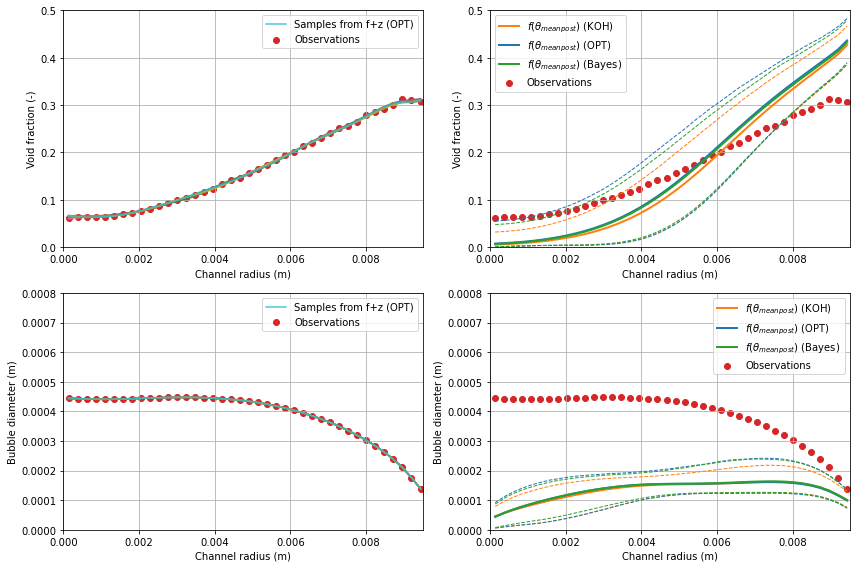

In [33]:
#predictionsF. Essayer de faire une figure compréhensible...

foldname="final_calibration/double_calibration_withmean/results/preds/"
foldname2="final_calibration/test_algo_opti/results/"
foldname3="final_calibration/simple_calibration_alpha/results/preds/"

#loading des prédictionF avec alpha et diamètre
alphaopt=pd.DataFrame(data=np.loadtxt(foldname+"predsoptalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
alphakoh=pd.DataFrame(data=np.loadtxt(foldname+"predskohalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
alphafb=pd.DataFrame(data=np.loadtxt(foldname+"predsfbalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])

diamopt=pd.DataFrame(data=np.loadtxt(foldname+"predsoptdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
diamkoh=pd.DataFrame(data=np.loadtxt(foldname+"predskohdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
diamfb=pd.DataFrame(data=np.loadtxt(foldname+"predsfbdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])

#loading des trajectoires avec alpha et diamètre

trajopta=pd.DataFrame(data=np.loadtxt(foldname+"predsoptalpha.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
trajkoha=pd.DataFrame(data=np.loadtxt(foldname+"predskohalpha.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
trajfba=pd.DataFrame(data=np.loadtxt(foldname+"predsfbalpha.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

trajoptd=pd.DataFrame(data=np.loadtxt(foldname+"predsoptdiam.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
trajkohd=pd.DataFrame(data=np.loadtxt(foldname+"predskohdiam.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
trajfbd=pd.DataFrame(data=np.loadtxt(foldname+"predsfbdiam.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])


#loading des prédictions avec alpha only
salphaopt=pd.DataFrame(data=np.loadtxt(foldname3+"predsoptalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
salphakoh=pd.DataFrame(data=np.loadtxt(foldname3+"predskohalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
salphafb=pd.DataFrame(data=np.loadtxt(foldname3+"predsfbalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])

sdiamopt=pd.DataFrame(data=np.loadtxt(foldname3+"predsoptdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
sdiamkoh=pd.DataFrame(data=np.loadtxt(foldname3+"predskohdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
sdiamfb=pd.DataFrame(data=np.loadtxt(foldname3+"predsfbdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])



obs=pd.DataFrame(data=np.loadtxt(foldname2+"obs.gnu"),columns=['x','alpha','diam'])


#paramètres
sampleslabels=['s1','s2','s3','s4','s5','s6','s7','s8','s9']
xlim=[0,9.5e-3]
ylim_alpha=[0,0.5]
ylim_diam=[0,8e-4]

#colors
copt='tab:blue'
ckoh='tab:orange'
cfb='tab:green'
cobs='tab:red'

#labels
labelobs='Observations'
labelkoh=r'$f(\theta_{meanpost})$ (KOH)'
labelopt=r'$f(\theta_{meanpost})$ (OPT)'
labelfb=r'$f(\theta_{meanpost})$ (Bayes)'
labelsamples='Samples from f+z (OPT)'

labelx='Channel radius (m)'
labely_alpha='Void fraction (-)'
labely_diam='Bubble diameter (m)'

#linewidths
lw1=2
lw2=1

fig,((ax1,ax3),(ax4,ax6))=plt.subplots(nrows=2,ncols=2,figsize=(12,8))
ax3.scatter(obs['x'],obs['alpha'],color=cobs,label=labelobs)

ax3.plot(alphakoh['x'],alphakoh['fmean'],linewidth=lw1,color=ckoh,label=labelkoh)
ax3.plot(alphakoh['x'],alphakoh['q2p5'],linestyle='--',linewidth=lw2,color=ckoh)
ax3.plot(alphakoh['x'],alphakoh['q97p5'],linestyle='--',linewidth=lw2,color=ckoh)

ax3.plot(alphaopt['x'],alphaopt['fmean'],linewidth=lw1,color=copt,label=labelopt)
ax3.plot(alphakoh['x'],alphaopt['q2p5'],linestyle='--',linewidth=lw2,color=copt)
ax3.plot(alphakoh['x'],alphaopt['q97p5'],linestyle='--',linewidth=lw2,color=copt)

ax3.plot(alphafb['x'],alphafb['fmean'],linewidth=lw1,color=cfb,label=labelfb)
ax3.plot(alphakoh['x'],alphafb['q2p5'],linestyle='--',linewidth=lw2,color=cfb)
ax3.plot(alphakoh['x'],alphafb['q97p5'],linestyle='--',linewidth=lw2,color=cfb)


ax6.scatter(obs['x'],obs['diam'],color=cobs,label=labelobs)

ax6.plot(diamkoh['x'],diamkoh['fmean'],linewidth=lw1,color=ckoh,label=labelkoh)
ax6.plot(diamkoh['x'],diamkoh['q2p5'],linestyle='--',linewidth=lw2,color=ckoh)
ax6.plot(alphakoh['x'],diamkoh['q97p5'],linestyle='--',linewidth=lw2,color=ckoh)

ax6.plot(alphaopt['x'],diamopt['fmean'],linewidth=lw1,color=copt,label=labelopt)
ax6.plot(alphakoh['x'],diamopt['q2p5'],linestyle='--',linewidth=lw2,color=copt)
ax6.plot(alphakoh['x'],diamopt['q97p5'],linestyle='--',linewidth=lw2,color=copt)

ax6.plot(alphafb['x'],diamfb['fmean'],linewidth=lw1,color=cfb,label=labelfb)
ax6.plot(alphakoh['x'],diamfb['q2p5'],linestyle='--',linewidth=lw2,color=cfb)
ax6.plot(alphakoh['x'],diamfb['q97p5'],linestyle='--',linewidth=lw2,color=cfb)

ax6.set_xlim([0,9.5e-3])


ax1.scatter(obs['x'],obs['alpha'],color=cobs,label=labelobs)
for lab in sampleslabels :
    ax1.plot(obs['x'],trajopta[lab],alpha=0.8)
ax1.plot(obs['x'],trajopta['s10'],label=labelsamples,alpha=0.8)
    
ax4.scatter(obs['x'],obs['diam'],color=cobs,label=labelobs)
for lab in sampleslabels :
    ax4.plot(obs['x'],trajoptd[lab],alpha=0.8)
ax4.plot(obs['x'],trajoptd['s10'],label=labelsamples,alpha=0.8)
    



ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
ax4.set_xlim(xlim)
ax5.set_xlim(xlim)
ax6.set_xlim(xlim)

ax1.set_ylim(ylim_alpha)
ax2.set_ylim(ylim_alpha)
ax3.set_ylim(ylim_alpha)
ax4.set_ylim(ylim_diam)
ax5.set_ylim(ylim_diam)
ax6.set_ylim(ylim_diam)

ax1.set_xlabel(labelx)
ax2.set_xlabel(labelx)
ax3.set_xlabel(labelx)
ax4.set_xlabel(labelx)
ax5.set_xlabel(labelx)
ax6.set_xlabel(labelx)

ax1.set_ylabel(labely_alpha)
ax2.set_ylabel(labely_alpha)
ax3.set_ylabel(labely_alpha)
ax4.set_ylabel(labely_diam)
ax5.set_ylabel(labely_diam)
ax6.set_ylabel(labely_diam)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

ax3.legend()
ax6.legend()
ax1.legend()
ax4.legend()
ax2.legend()
ax5.legend()

plt.tight_layout()







        phi        BK      COAL      NUCL        MT     hpar1         hpar2  \
0  0.141360  0.392013  0.113234  0.518969  0.543531  0.000364  7.400000e-07   
1  0.256796  0.324819  0.057607  0.147319  0.066147  0.000364  7.400000e-07   
2  0.016742  0.459645  0.066400  0.554263  0.473641  0.000364  7.400000e-07   
3  0.179129  0.462385  0.095233  0.193171  0.115151  0.000364  7.400000e-07   
4  0.085035  0.716931  0.235760  0.887374  0.099010  0.000364  7.400000e-07   

    hpar3  
0  0.0045  
1  0.0045  
2  0.0045  
3  0.0045  
4  0.0045  


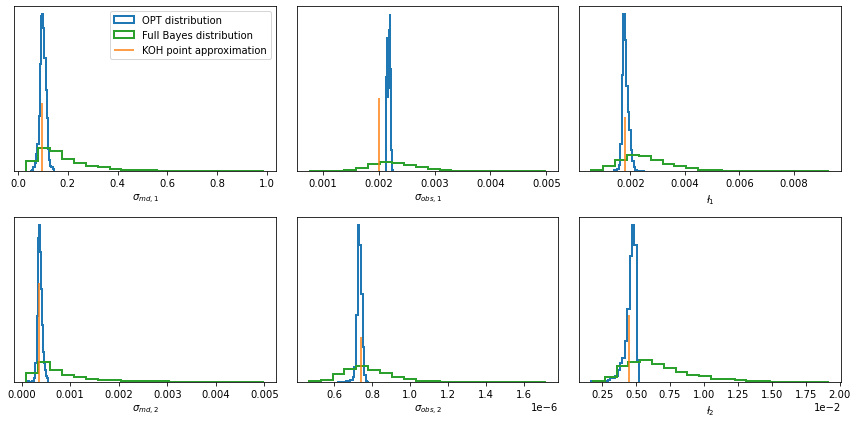

In [13]:
#colors
copt='tab:blue'
ckoh='tab:orange'
cfb='tab:green'
cobs='tab:red'

#tracé des postérieures des hyperparamètres

foldname="final_calibration/double_calibration_withmean/results/save/"

sampkohalpha=pd.DataFrame(data=np.loadtxt(foldname+"sampkohalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampoptalpha=pd.DataFrame(data=np.loadtxt(foldname+"sampopt+alpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampfbalpha=pd.DataFrame(data=np.loadtxt(foldname+"sampfbalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])

sampkohdiam=pd.DataFrame(data=np.loadtxt(foldname+"sampkohdiam.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampoptdiam=pd.DataFrame(data=np.loadtxt(foldname+"sampopt+diam.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampfbdiam=pd.DataFrame(data=np.loadtxt(foldname+"sampfbdiam.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])

dfoa=sampoptalpha
dfod=sampoptdiam
dffa=sampfbalpha
dffd=sampfbdiam
nbins=20
lw=2
lwkoh=1.5
alph=1


fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3,figsize=(12,6))

ax1.hist(dfoa['hpar1'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT distribution',histtype='step',linewidth=lw)
ax1.hist(dffa['hpar1'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='step',linewidth=lw)
ax1.vlines(sampkohalpha['hpar1'][0],0,15,color=ckoh,lw=lwkoh,label='KOH point approximation')

ax1.legend()

ax2.hist(dfoa['hpar2'],bins=nbins,color=copt,density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax2.hist(dffa['hpar2'],bins=nbins,color=cfb,density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax2.vlines(sampkohalpha['hpar2'][0],0,7500,color=ckoh,lw=lwkoh,label='KOH')

ax3.hist(dfoa['hpar3'],bins=nbins,color=copt,density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax3.hist(dffa['hpar3'],bins=nbins,color=cfb,density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax3.vlines(sampkohalpha['hpar3'][0],0,1500,color=ckoh,lw=lwkoh,label='KOH')


ax4.hist(dfod['hpar1'],bins=nbins,color=copt,density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax4.hist(dffd['hpar1'],bins=nbins,color=cfb,density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax4.vlines(sampkohdiam['hpar1'][0],0,6e3,color=ckoh,lw=lwkoh,label='KOH')


ax5.hist(dfod['hpar2'],bins=nbins,color=copt,density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax5.hist(dffd['hpar2'],bins=nbins,color=cfb,density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax5.vlines(sampkohdiam['hpar2'][0],0,1e7,color=ckoh,lw=lwkoh,label='KOH')


ax6.hist(dfod['hpar3'],bins=nbins,color=copt,density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax6.hist(dffd['hpar3'],bins=nbins,color=cfb,density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax6.vlines(sampkohdiam['hpar3'][0],0,600,color=ckoh,lw=lwkoh,label='KOH')

plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))


ax1.set_xlabel(r'$\sigma_{md,1}$')
ax2.set_xlabel(r'$\sigma_{obs,1}$')
ax3.set_xlabel(r'$\l_{1}$')
ax4.set_xlabel(r'$\sigma_{md,2}$')
ax5.set_xlabel(r'$\sigma_{obs,2}$')
ax6.set_xlabel(r'$\l_{2}$')

ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)
ax6.get_yaxis().set_visible(False)
plt.tight_layout()


print(sampkohdiam.head())



        phi        BK      COAL      NUCL        MT     hpar1    hpar2  \
0  0.376914  0.921854  0.784607  0.619844  0.309626  0.046899  0.00216   
1  0.279358  0.722285  0.942996  0.129757  0.887241  0.046899  0.00216   
2  0.223169  0.301577  0.806688  0.403247  0.226699  0.046899  0.00216   
3  0.142003  0.292378  0.441857  0.491065  0.666442  0.046899  0.00216   
4  0.147215  0.022350  0.105939  0.912235  0.229229  0.046899  0.00216   

      hpar3  
0  0.001355  
1  0.001355  
2  0.001355  
3  0.001355  
4  0.001355  


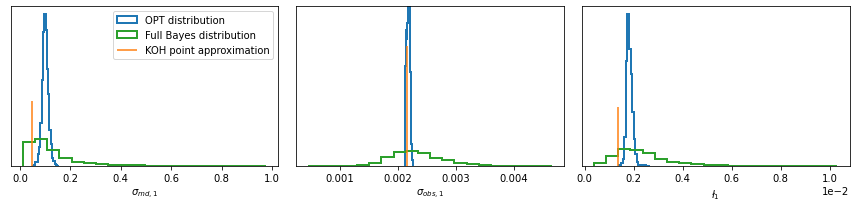

In [16]:
#postérieures hpars pour la calibration alpha seule.
#colors
copt='tab:blue'
ckoh='tab:orange'
cfb='tab:green'
cobs='tab:red'

#tracé des postérieures des hyperparamètres

foldname="final_calibration/simple_calibration_alpha/results/save/"

sampkohalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampkohalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampoptalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampoptalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampfbalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampfbalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
dfoa=sampoptalphas
dffa=sampfbalphas

nbins=20
lw=2
lwkoh=1.5
alph=1


fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(12,3))

ax1.hist(dfoa['hpar1'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT distribution',histtype='step',linewidth=lw)
ax1.hist(dffa['hpar1'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='step',linewidth=lw)
ax1.vlines(sampkohalphas['hpar1'][0],0,15,color=ckoh,lw=lwkoh,label='KOH point approximation')

ax1.legend()

ax2.hist(dfoa['hpar2'],bins=nbins,color=copt,density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax2.hist(dffa['hpar2'],bins=nbins,color=cfb,density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax2.vlines(sampkohalphas['hpar2'][0],0,7500,color=ckoh,lw=lwkoh,label='KOH')

ax3.hist(dfoa['hpar3'],bins=nbins,color=copt,density=True,alpha=alph,label='Opt',histtype='step',linewidth=lw)
ax3.hist(dffa['hpar3'],bins=nbins,color=cfb,density=True,alpha=alph,label='FB',histtype='step',linewidth=lw)
ax3.vlines(sampkohalphas['hpar3'][0],0,1500,color=ckoh,lw=lwkoh,label='KOH')

plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))


ax1.set_xlabel(r'$\sigma_{md,1}$')
ax2.set_xlabel(r'$\sigma_{obs,1}$')
ax3.set_xlabel(r'$\l_{1}$')

ax2.set_ylim([0,10000])


ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

plt.tight_layout()
print(sampkohalphas.head())

In [32]:
#fonction pour summary de postérieure
def summary_post_theta(df):
    for lab in ['phi','BK','COAL','NUCL','MT']:
        print(lab+' : '+"%0.2f" %np.mean(df[lab])+', '+"%0.2f" %np.std(df[lab]))
        
#fonction pour summary de postérieure hpars
def summary_post_psi(df):
    for lab in ['hpar1','hpar2','hpar3']:
        print(lab+' : '+"%0.9f" %np.mean(df[lab])+', '+"%0.9f" %np.std(df[lab]))
        
#summary_post_theta(sampoptalpha)
#les df hpars de la forme "sampkohalpha" ou "sampoptalpha"
summary_post_psi(sampfbdiam)

hpar1 : 0.000928284, 0.000764162
hpar2 : 0.000000779, 0.000000128
hpar3 : 0.006705268, 0.002488971


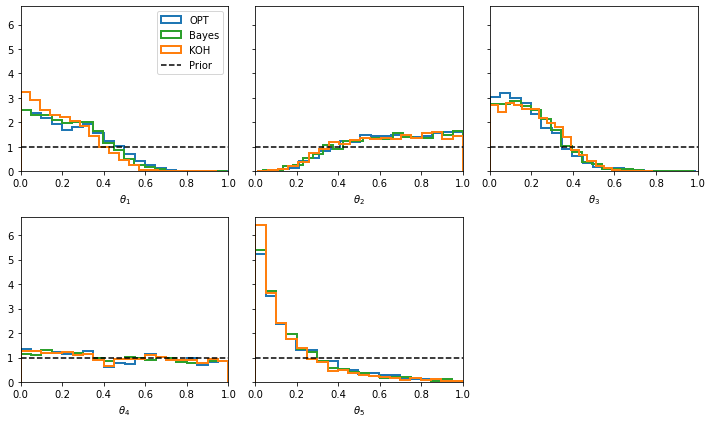

In [98]:
#plot de spostérieures paramètres
copt='tab:blue'
ckoh='tab:orange'
cfb='tab:green'
cobs='tab:red'


foldname="final_calibration/simple_calibration_alpha/results/save/"
foldname2="final_calibration/double_calibration_withmean/results/save/"

sampkohalphas=pd.DataFrame(data=np.loadtxt(foldname2+"sampkohalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampoptalphas=pd.DataFrame(data=np.loadtxt(foldname2+"sampopt+alpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampfbalphas=pd.DataFrame(data=np.loadtxt(foldname2+"sampfbalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
dfoa=sampoptalphas
dffa=sampfbalphas

nbins=20
lw=2
lwkoh=1.5
alph=1


fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3,figsize=(10,6),sharey=True)

ax1.hist(dfoa['phi'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT',histtype='step',linewidth=lw)
ax1.hist(dffa['phi'],bins=nbins,color=cfb,density=True,alpha=alph,label='Bayes',histtype='step',linewidth=lw)
ax1.hist(sampkohalphas['phi'],bins=nbins,color=ckoh,density=True,alpha=alph,label='KOH',histtype='step',linewidth=lw)


ax2.hist(dfoa['BK'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT distribution',histtype='step',linewidth=lw)
ax2.hist(dffa['BK'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='step',linewidth=lw)
ax2.hist(sampkohalphas['BK'],bins=nbins,color=ckoh,density=True,alpha=alph,label='KOH distribution',histtype='step',linewidth=lw)


ax3.hist(dfoa['COAL'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT distribution',histtype='step',linewidth=lw)
ax3.hist(dffa['COAL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='step',linewidth=lw)
ax3.hist(sampkohalphas['COAL'],bins=nbins,color=ckoh,density=True,alpha=alph,label='KOH distribution',histtype='step',linewidth=lw)



ax4.hist(dfoa['NUCL'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT distribution',histtype='step',linewidth=lw)
ax4.hist(dffa['NUCL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='step',linewidth=lw)
ax4.hist(sampkohalphas['NUCL'],bins=nbins,color=ckoh,density=True,alpha=alph,label='KOH distribution',histtype='step',linewidth=lw)



ax5.hist(dfoa['MT'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT distribution',histtype='step',linewidth=lw)
ax5.hist(dffa['MT'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='step',linewidth=lw)
ax5.hist(sampkohalphas['MT'],bins=nbins,color=ckoh,density=True,alpha=alph,label='KOH distribution',histtype='step',linewidth=lw)


plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))


ax1.set_xlabel(r'$\theta_1$')
ax2.set_xlabel(r'$\theta_2$')
ax3.set_xlabel(r'$\theta_3$')
ax4.set_xlabel(r'$\theta_4$')
ax5.set_xlabel(r'$\theta_5$')
xlim=[0,1]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
ax4.set_xlim(xlim)
ax5.set_xlim(xlim)

ax1.hlines(1,0,1,colors='black',linestyle='--',label='Prior')
ax2.hlines(1,0,1,colors='black',linestyle='--',label='Prior')
ax3.hlines(1,0,1,colors='black',linestyle='--',label='Prior')
ax4.hlines(1,0,1,colors='black',linestyle='--',label='Prior')
ax5.hlines(1,0,1,colors='black',linestyle='--',label='Prior')
ax1.legend()
fig.delaxes(ax6)


plt.tight_layout()





In [ ]:
#plot de spostérieures paramètres calibration simple
copt='tab:blue'
ckoh='tab:orange'
cfb='tab:green'
cobs='tab:red'

foldname="final_calibration/simple_calibration_alpha/results/save/"

sampkohalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampkohalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampoptalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampoptalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
sampfbalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampfbalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
dfoa=sampoptalphas
dffa=sampfbalphas


nbins=20
lw=2
lwkoh=1.5
alph=1


fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3,figsize=(10,6),sharey=True)

ax1.hist(dfoa['phi'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT',histtype='step',linewidth=lw)
ax1.hist(dffa['phi'],bins=nbins,color=cfb,density=True,alpha=alph,label='Bayes',histtype='step',linewidth=lw)
ax1.hist(sampkohalpha['phi'],bins=nbins,color=ckoh,density=True,alpha=alph,label='KOH',histtype='step',linewidth=lw)




ax2.hist(dfoa['BK'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT distribution',histtype='step',linewidth=lw)
ax2.hist(dffa['BK'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='step',linewidth=lw)
ax2.hist(sampkohalpha['BK'],bins=nbins,color=ckoh,density=True,alpha=alph,label='KOH distribution',histtype='step',linewidth=lw)


ax3.hist(dfoa['COAL'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT distribution',histtype='step',linewidth=lw)
ax3.hist(dffa['COAL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='step',linewidth=lw)
ax3.hist(sampkohalpha['COAL'],bins=nbins,color=ckoh,density=True,alpha=alph,label='KOH distribution',histtype='step',linewidth=lw)



ax4.hist(dfoa['NUCL'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT distribution',histtype='step',linewidth=lw)
ax4.hist(dffa['NUCL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='step',linewidth=lw)
ax4.hist(sampkohalpha['NUCL'],bins=nbins,color=ckoh,density=True,alpha=alph,label='KOH distribution',histtype='step',linewidth=lw)



ax5.hist(dfoa['MT'],bins=nbins,color=copt,density=True,alpha=alph,label='OPT distribution',histtype='step',linewidth=lw)
ax5.hist(dffa['MT'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='step',linewidth=lw)
ax5.hist(sampkohalpha['MT'],bins=nbins,color=ckoh,density=True,alpha=alph,label='KOH distribution',histtype='step',linewidth=lw)


plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))


ax1.set_xlabel(r'$\theta_1$')
ax2.set_xlabel(r'$\theta_2$')
ax3.set_xlabel(r'$\theta_3$')
ax4.set_xlabel(r'$\theta_4$')
ax5.set_xlabel(r'$\theta_5$')
xlim=[0,1]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
ax4.set_xlim(xlim)
ax5.set_xlim(xlim)

ax1.hlines(1,0,1,colors='black',linestyle='--',label='Prior')
ax2.hlines(1,0,1,colors='black',linestyle='--',label='Prior')
ax3.hlines(1,0,1,colors='black',linestyle='--',label='Prior')
ax4.hlines(1,0,1,colors='black',linestyle='--',label='Prior')
ax5.hlines(1,0,1,colors='black',linestyle='--',label='Prior')
ax1.legend()
fig.delaxes(ax6)


plt.tight_layout()





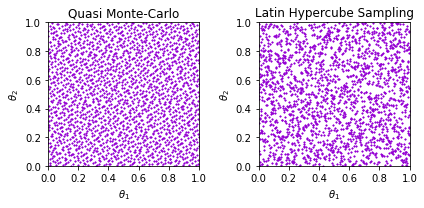

In [9]:
#plot des nDoE
doeqmc=pd.DataFrame(data=np.genfromtxt('final_calibration/test_algo_opti/design_qmc_full.dat'),columns=['pt','name','t1','t2','t3','t4','t5'])
doelhs=pd.DataFrame(data=np.genfromtxt('final_calibration/test_algo_opti/design_lhs_full.dat'),columns=['pt','name','t1','t2','t3','t4','t5'])

ps=1

doeqmc['t3']=(doeqmc['t3']-0.5)/1.5
doeqmc['t2']=(doeqmc['t2']-0.5)/1.5

doelhs['t3']=(doelhs['t3']-0.5)/1.5
doelhs['t2']=(doelhs['t2']-0.5)/1.5
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(6,3))

ax1.scatter(doeqmc['t3'],doeqmc['t2'],s=ps,marker='D',color='darkviolet')
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r'$\theta_2$')
ax1.set_title('Quasi Monte-Carlo')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])

ax2.scatter(doelhs['t3'],doelhs['t2'],s=ps,marker='D',color='darkviolet')
ax2.set_title('Latin Hypercube Sampling')
ax2.set_xlabel(r'$\theta_1$')
ax2.set_ylabel(r'$\theta_2$')
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])
plt.tight_layout()

(0.5, 2.0)

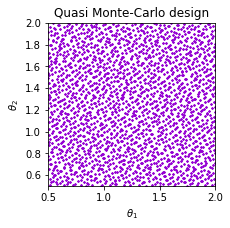

In [150]:
#plot pour poster
doeqmc=pd.DataFrame(data=np.genfromtxt('final_calibration/test_algo_opti/design_qmc_full.dat'),columns=['pt','name','t1','t2','t3','t4','t5'])
surpres_diam=pd.DataFrame(data=np.loadtxt("final_calibration/surrogate_precision/results/errors_diam.gnu"),columns=['nmodes','errtot','projerr'])

ps=2
fig,(ax1)=plt.subplots(figsize=(3,3))

ax1.scatter(doeqmc['t3'],doeqmc['t2'],s=ps,marker='D',color='darkviolet')
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r'$\theta_2$')
ax1.set_title('Quasi Monte-Carlo design')
ax1.set_xlim([0.5,2])
ax1.set_ylim([0.5,2])

Text(0.5, 1.0, 'Validation of surrogate')

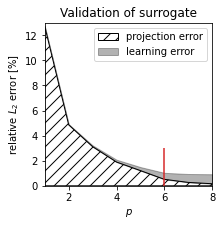

In [152]:
surpres_diam=pd.DataFrame(data=np.loadtxt("final_calibration/surrogate_precision/results/errors_diam.gnu"),columns=['nmodes','errtot','projerr'])
df2=surpres_diam

fig,(ax1)=plt.subplots(figsize=(3,3))
ax1.fill_between(df2['nmodes'],0,100*df2['projerr'],facecolor='none',edgecolor='black',hatch='//',label='projection error')
ax1.fill_between(df2['nmodes'],100*df2['projerr'],100*df2['errtot'],alpha=0.3,color='black',label="learning error")
ax1.legend()
ax1.set_xlim([1,8])
ax1.set_ylim([0,13])

ax1.vlines(6,0,3,color='tab:red')
ax1.set_xlabel(r'$p$')
ax1.set_ylabel(r'relative $L_2$ error [$\%$]')
ax1.set_title('Validation of surrogate')

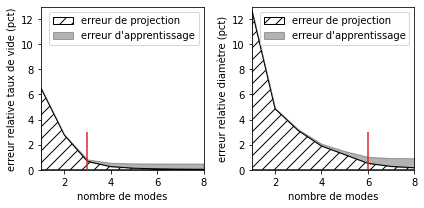

In [39]:
#surrogate precision
surpres_alpha=pd.DataFrame(data=np.loadtxt("final_calibration/surrogate_precision/results/errors_alpha.gnu"),columns=['nmodes','errtot','projerr'])
surpres_diam=pd.DataFrame(data=np.loadtxt("final_calibration/surrogate_precision/results/errors_diam.gnu"),columns=['nmodes','errtot','projerr'])

#plot surrogate_precision
df1=surpres_alpha
df2=surpres_diam

#variance prédictive : std**2
#part irréductible : stdz**2.
#tracer en-dessous la part irréductible, puis on top la part de calibration.

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(6,3))

ax1.fill_between(df1['nmodes'],0,100*df1['projerr'],facecolor='none',edgecolor='black',hatch='//',label='erreur de projection')
ax1.fill_between(df1['nmodes'],100*df1['projerr'],100*df1['errtot'],alpha=0.3,color='black',label="erreur d'apprentissage")
ax1.legend()
ax1.set_xlim([1,8])
ax1.set_ylim([0,13])

ax1.vlines(3,0,3,color='tab:red')


ax2.fill_between(df2['nmodes'],0,100*df2['projerr'],facecolor='none',edgecolor='black',hatch='//',label='erreur de projection')
ax2.fill_between(df2['nmodes'],100*df2['projerr'],100*df2['errtot'],alpha=0.3,color='black',label="erreur d'apprentissage")
ax2.legend()
ax2.set_xlim([1,8])
ax2.set_ylim([0,13])

ax2.vlines(6,0,3,color='tab:red')

ax1.set_xlabel('nombre de modes')
ax1.set_ylabel('erreur relative taux de vide (pct)')
ax2.set_xlabel('nombre de modes')
ax2.set_ylabel('erreur relative diamètre (pct)')
plt.tight_layout()




In [9]:
#diagnostics MCMC. On affiche tous les samples. Mais charger toute la chaîne ? long non ?
foldname='final_calibration/double_calibration_withmean/results/diag/'
#seulement les 1e6 derniers steps.
diagfb=pd.DataFrame(data=np.loadtxt(foldname+"autocorfb.gnu"),columns=['t1','t2','t3','t4','t5','h1','h2','h3','h4','h5','h6'])
diagkoh=pd.DataFrame(data=np.loadtxt(foldname+"autocorkoh.gnu"),columns=['t1','t2','t3','t4','t5'])
diagopt=pd.DataFrame(data=np.loadtxt(foldname+"autocoropt.gnu"),columns=['t1','t2','t3','t4','t5'])


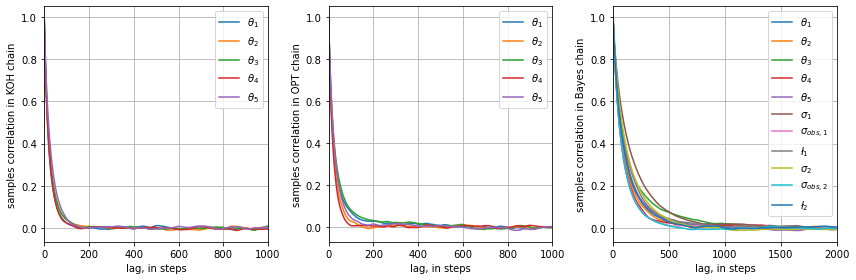

In [11]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(12,4))

xlim=[0,1000]
xlimbayes=[0,2000]
ax1.plot(diagkoh['t1'],label=r'$\theta_1$')
ax1.plot(diagkoh['t2'],label=r'$\theta_2$')
ax1.plot(diagkoh['t3'],label=r'$\theta_3$')
ax1.plot(diagkoh['t4'],label=r'$\theta_4$')
ax1.plot(diagkoh['t5'],label=r'$\theta_5$')

ax2.plot(diagopt['t1'],label=r'$\theta_1$')
ax2.plot(diagopt['t2'],label=r'$\theta_2$')
ax2.plot(diagopt['t3'],label=r'$\theta_3$')
ax2.plot(diagopt['t4'],label=r'$\theta_4$')
ax2.plot(diagopt['t5'],label=r'$\theta_5$')

ax3.plot(diagfb['t1'],label=r'$\theta_1$')
ax3.plot(diagfb['t2'],label=r'$\theta_2$')
ax3.plot(diagfb['t3'],label=r'$\theta_3$')
ax3.plot(diagfb['t4'],label=r'$\theta_4$')
ax3.plot(diagfb['t5'],label=r'$\theta_5$')

ax3.plot(diagfb['h1'],label=r'$\sigma_1$')
ax3.plot(diagfb['h2'],label=r'$\sigma_{obs,1}$')
ax3.plot(diagfb['h3'],label=r'$\l_1$')
ax3.plot(diagfb['h4'],label=r'$\sigma_2$')
ax3.plot(diagfb['h5'],label=r'$\sigma_{obs,2}$')
ax3.plot(diagfb['h6'],label=r'$\l_2$')

ax1.set_xlabel('lag, in steps')
ax2.set_xlabel('lag, in steps')
ax3.set_xlabel('lag, in steps')
ax1.set_ylabel('samples correlation in KOH chain')
ax2.set_ylabel('samples correlation in OPT chain')
ax3.set_ylabel('samples correlation in Bayes chain')
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlimbayes)
ax1.legend()
ax2.legend()
ax3.legend()
ax1.grid()
ax2.grid()
ax3.grid()
plt.tight_layout()

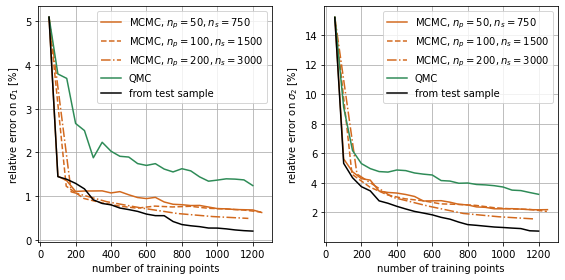

In [7]:
#comparaison d'algorithmes
foldname='final_calibration/test_algo_opti/results/'
erra1=pd.DataFrame(data=np.loadtxt(foldname+'erroradapt.gnu'),columns=['npts','e1','e2','e3','e4','s1','sobs1','l1','s2','sobs2','l2','d1','d2'])
erra2=pd.DataFrame(data=np.loadtxt(foldname+'erroradapt2.gnu'),columns=['npts','e1','e2','e3','e4','s1','sobs1','l1','s2','sobs2','l2','d1','d2'])
erra3=pd.DataFrame(data=np.loadtxt(foldname+'erroradapt3.gnu'),columns=['npts','e1','e2','e3','e4','s1','sobs1','l1','s2','sobs2','l2','d1','d2'])
errqmc=pd.DataFrame(data=np.loadtxt(foldname+'errorqmc.gnu'),columns=['npts','e1','e2','e3','e4','s1','sobs1','l1','s2','sobs2','l2','d1','d2'])
errdb=pd.DataFrame(data=np.loadtxt(foldname+'errordebeste.gnu'),columns=['npts','e1','e2','e3','e4','s1','sobs1','l1','s2','sobs2','l2','d1','d2'])

erra3.drop(index=erra3.index[-1:],axis=0,inplace=True)
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ax1.plot(erra1['npts'],erra1['s1'],label=r'MCMC, $n_p=50, n_s=750$',linestyle='-',color='chocolate')
ax1.plot(erra2['npts'],erra2['s1'],label=r'MCMC, $n_p=100, n_s=1500$',linestyle='--',color='chocolate')
ax1.plot(erra3['npts'],erra3['s1'],label=r'MCMC, $n_p=200, n_s=3000$',linestyle='-.',color='chocolate')
ax1.plot(errqmc['npts'],errqmc['s1'],label='QMC',color='seagreen')
ax1.plot(errdb['npts'],errdb['s1'],label='from test sample',color='black')
ax1.legend()

ax2.plot(erra1['npts'],erra1['s2'],label=r'MCMC, $n_p=50, n_s=750$',linestyle='-',color='chocolate')
ax2.plot(erra2['npts'],erra2['s2'],label=r'MCMC, $n_p=100, n_s=1500$',linestyle='--',color='chocolate')
ax2.plot(erra3['npts'],erra3['s2'],label=r'MCMC, $n_p=200, n_s=3000$',linestyle='-.',color='chocolate')
ax2.plot(errqmc['npts'],errqmc['s2'],label='QMC',color='seagreen')
ax2.plot(errdb['npts'],errdb['s2'],label='from test sample',color='black')
ax2.legend()

ax1.set_xlabel('number of training points')
ax2.set_xlabel('number of training points')
ax1.set_ylabel(r'relative error on $\sigma_1$ [$\%$]')
ax2.set_ylabel(r'relative error on $\sigma_2$ [$\%$]')
ax1.grid()
ax2.grid()

plt.tight_layout()


(0.0001, 0.00945)

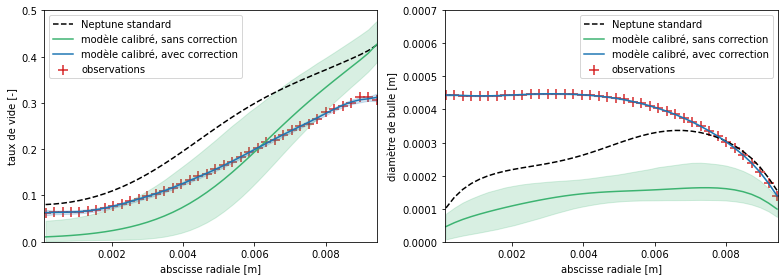

In [162]:
#figures pour la présentation RTN.
#taux de vide et diamètre en calibration double, en affichant sur la même figure les prédictions du modèle seul et du modèle avec correction
#on veut aussi montrer la prédiction sans calibration (nominale)

#predictionsF. Essayer de faire une figure compréhensible...

foldname="final_calibration/double_calibration_withmean/results/preds/"
obs=pd.DataFrame(data=np.loadtxt("final_calibration/double_calibration_withmean/results/obs.gnu"),columns=['x','alpha','diam'])
predsnom=pd.DataFrame(data=np.loadtxt("final_calibration/double_calibration_withmean/results/fnominal.gnu"),columns=['x','alpha','diam'])
#loading des prédictionF avec alpha et diamètre
alpha=pd.DataFrame(data=np.loadtxt(foldname+"predsfbalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
diam=pd.DataFrame(data=np.loadtxt(foldname+"predsfbdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])

#loading des trajectoires avec alpha et diamètre

alphafz=pd.DataFrame(data=np.loadtxt(foldname+"predsfbalpha.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
diamfz=pd.DataFrame(data=np.loadtxt(foldname+"predsfbdiam.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

lw1=1.5
lw2=1.5
markersize=100
ckoh='mediumseagreen'

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(11,4))
labelobs="observations"
labelf='f'

ax1.scatter(obs['x'],obs['alpha'],s=markersize,marker='+',color=cobs,label=labelobs)

ax1.plot(predsnom['x'],predsnom['alpha'],linewidth=lw2,linestyle='--',color='black',label='Neptune standard')

ax1.plot(alpha['x'],alpha['useless'],linewidth=lw2,color=ckoh,label='modèle calibré, sans correction')
ax1.fill_between(alpha['x'],alpha['q2p5'],alpha['q97p5'],color=ckoh,alpha=0.2)
#ax1.plot(alpha['x'],alpha['q2p5'],linestyle='--',linewidth=lw2,color=ckoh)
#ax1.plot(alpha['x'],alpha['q97p5'],linestyle='--',linewidth=lw2,color=ckoh)

ax1.plot(alphafz['x'],alphafz['mean'],linewidth=lw1,color='tab:blue',label='modèle calibré, avec correction')
ax1.fill_between(alphafz['x'],alphafz['mean']-3*alphafz['std'],alphafz['mean']+3*alphafz['std'],color='tab:blue',alpha=0.2)
#ax1.plot(alphafz['x'],alphafz['mean']+3*alphafz['std'],linestyle='--',linewidth=lw2,color='tab:blue')
#ax1.plot(alphafz['x'],alphafz['mean']-3*alphafz['std'],linestyle='--',linewidth=lw2,color='tab:blue')
ax1.legend()


ax2.plot(predsnom['x'],predsnom['diam'],linewidth=lw2,linestyle='--',color='black',label='Neptune standard')
ax2.scatter(obs['x'],obs['diam'],s=markersize,marker='+',color=cobs,label=labelobs)

ax2.plot(diam['x'],diam['useless'],linewidth=lw2,color=ckoh,label='modèle calibré, sans correction')
ax2.fill_between(diam['x'],diam['q2p5'],diam['q97p5'],color=ckoh,alpha=0.2)

#ax2.plot(diam['x'],diam['q2p5'],linestyle='--',linewidth=lw2,color=ckoh)
#ax2.plot(diam['x'],diam['q97p5'],linestyle='--',linewidth=lw2,color=ckoh)

ax2.plot(diamfz['x'],diamfz['mean'],linewidth=lw1,color='tab:blue',label='modèle calibré, avec correction')
ax2.fill_between(diamfz['x'],diamfz['mean']-3*diamfz['std'],diamfz['mean']+3*diamfz['std'],color='tab:blue',alpha=0.2)

#ax2.plot(diamfz['x'],diamfz['mean']+3*diamfz['std'],linestyle='--',linewidth=lw2,color='tab:blue')
#ax2.plot(diamfz['x'],diamfz['mean']-3*diamfz['std'],linestyle='--',linewidth=lw2,color='tab:blue')
ax2.legend()

ax1.set_xlabel("abscisse radiale [m]")
ax2.set_xlabel("abscisse radiale [m]")
ax1.set_ylabel("taux de vide [-]")
ax2.set_ylabel("diamètre de bulle [m]")
plt.tight_layout()
ax1.set_ylim([0,0.5])
ax2.set_ylim([0,7e-4])
ax1.set_xlim([1e-4,9.45e-3])
ax2.set_xlim([1e-4,9.45e-3])






In [96]:
#calcul taux de vide moyen en surface. array 1 : rayon, array 2 : prédictions de taux de vide.
def tdvmoy(r,a):
    rmax=9.5e-3
    res=0
    for i in range(0,len(r)-1):
        res+=(a[i]+a[i+1])*(r[i+1]**2-r[i]**2)
    return res/(2*rmax**2)

print(tdvmoy(obs['x'],obs['alpha']))
print(tdvmoy(predsnom['x'],predsnom['alpha']))
print(tdvmoy(alpha['x'],alpha['useless']))

0.21017123130837975
0.2953733816698024
0.22480103205736576


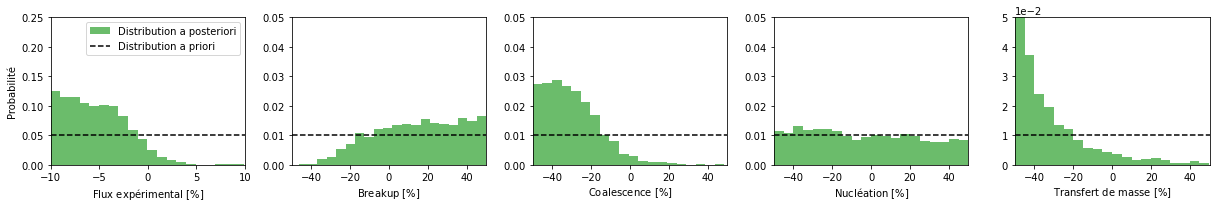

In [156]:
#plot de spostérieures paramètres
copt='tab:blue'
ckoh='tab:orange'
cfb='tab:green'
cobs='tab:red'


foldname="final_calibration/double_calibration_withmean/results/save/"
sampfbalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampfbalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
dffa=sampfbalphas

#transformation dans une échelle adaptée
dffa['phi']=20*dffa['phi']-10
dffa['BK']=100*dffa['BK']-50
dffa['COAL']=100*dffa['COAL']-50
dffa['NUCL']=100*dffa['NUCL']-50
dffa['MT']=100*dffa['MT']-50

nbins=20
lw=2
lwkoh=1.5
alph=0.7


fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,figsize=(17,3))

ax1.hist(dffa['phi'],bins=nbins,color=cfb,density=True,alpha=alph,label='Distribution a posteriori',histtype='stepfilled',linewidth=lw)
ax2.hist(dffa['BK'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax3.hist(dffa['COAL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax4.hist(dffa['NUCL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax5.hist(dffa['MT'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)

plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))

ax1.set_xlabel(r'Flux expérimental $[\%]$')
ax2.set_xlabel(r'Breakup $[\%]$')
ax3.set_xlabel(r'Coalescence $[\%]$')
ax4.set_xlabel(r'Nucléation $[\%]$')
ax5.set_xlabel(r'Transfert de masse $[\%]$')

ax1.set_ylabel('Probabilité')
xlim=[-50,50]
ylim=[0,1./20]
ax1.set_ylim([0,0.25])
ax1.set_xlim([-10,10])
ax2.set_ylim(ylim)
ax2.set_xlim(xlim)
ax3.set_ylim(ylim)
ax3.set_xlim(xlim)
ax4.set_ylim(ylim)
ax4.set_xlim(xlim)
ax5.set_ylim(ylim)
ax5.set_xlim(xlim)

ax1.hlines(1./20,-10,10,colors='black',linestyle='--',label='Distribution a priori')
ax2.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax3.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax4.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax5.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax1.legend()




plt.tight_layout()





(0.0001, 0.00945)

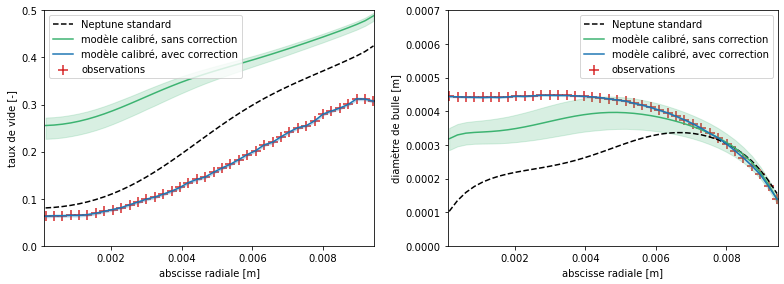

In [160]:
#noyau matern 1/2

foldname="final_calibration/double_calibration_matern12/results/preds/"
obs=pd.DataFrame(data=np.loadtxt("final_calibration/double_calibration_withmean/results/obs.gnu"),columns=['x','alpha','diam'])
predsnom=pd.DataFrame(data=np.loadtxt("final_calibration/double_calibration_withmean/results/fnominal.gnu"),columns=['x','alpha','diam'])
#loading des prédictionF avec alpha et diamètre
alpha=pd.DataFrame(data=np.loadtxt(foldname+"predsfbalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
diam=pd.DataFrame(data=np.loadtxt(foldname+"predsfbdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])

#loading des trajectoires avec alpha et diamètre

alphafz=pd.DataFrame(data=np.loadtxt(foldname+"predsfbalpha.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
diamfz=pd.DataFrame(data=np.loadtxt(foldname+"predsfbdiam.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

lw1=1.5
lw2=1.5
markersize=100
ckoh='mediumseagreen'

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(11,4))
labelobs="observations"
labelf='f'

ax1.scatter(obs['x'],obs['alpha'],s=markersize,marker='+',color=cobs,label=labelobs)

ax1.plot(predsnom['x'],predsnom['alpha'],linewidth=lw2,linestyle='--',color='black',label='Neptune standard')

ax1.plot(alpha['x'],alpha['useless'],linewidth=lw2,color=ckoh,label='modèle calibré, sans correction')
ax1.fill_between(alpha['x'],alpha['q2p5'],alpha['q97p5'],color=ckoh,alpha=0.2)

ax1.plot(alphafz['x'],alphafz['mean'],linewidth=lw1,color='tab:blue',label='modèle calibré, avec correction')
ax1.fill_between(alphafz['x'],alphafz['mean']-3*alphafz['std'],alphafz['mean']+3*alphafz['std'],color='tab:blue',alpha=0.2)
ax1.legend()


ax2.plot(predsnom['x'],predsnom['diam'],linewidth=lw2,linestyle='--',color='black',label='Neptune standard')
ax2.scatter(obs['x'],obs['diam'],s=markersize,marker='+',color=cobs,label=labelobs)

ax2.plot(diam['x'],diam['useless'],linewidth=lw2,color=ckoh,label='modèle calibré, sans correction')
ax2.fill_between(diam['x'],diam['q2p5'],diam['q97p5'],color=ckoh,alpha=0.2)


ax2.plot(diamfz['x'],diamfz['mean'],linewidth=lw1,color='tab:blue',label='modèle calibré, avec correction')
ax2.fill_between(diamfz['x'],diamfz['mean']-3*diamfz['std'],diamfz['mean']+3*diamfz['std'],color='tab:blue',alpha=0.2)

ax2.legend()

ax1.set_xlabel("abscisse radiale [m]")
ax2.set_xlabel("abscisse radiale [m]")
ax1.set_ylabel("taux de vide [-]")
ax2.set_ylabel("diamètre de bulle [m]")
plt.tight_layout()
ax1.set_ylim([0,0.5])
ax2.set_ylim([0,7e-4])
ax1.set_xlim([1e-4,9.45e-3])
ax2.set_xlim([1e-4,9.45e-3])







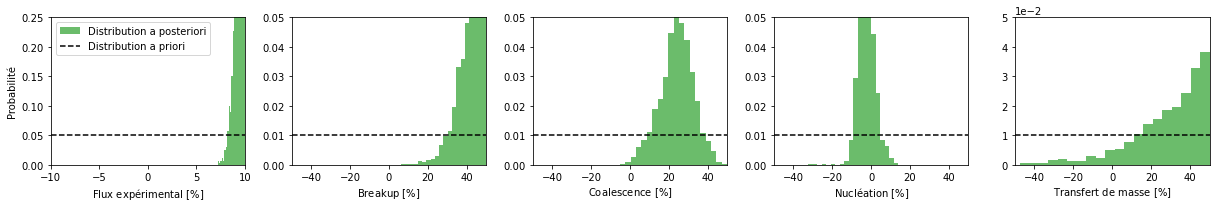

In [155]:
#plot de spostérieures paramètres
copt='tab:blue'
ckoh='tab:orange'
cfb='tab:green'
cobs='tab:red'


foldname="final_calibration/double_calibration_matern12/results/save/"
sampfbalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampfbalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
dffa=sampfbalphas

#transformation dans une échelle adaptée
dffa['phi']=20*dffa['phi']-10
dffa['BK']=100*dffa['BK']-50
dffa['COAL']=100*dffa['COAL']-50
dffa['NUCL']=100*dffa['NUCL']-50
dffa['MT']=100*dffa['MT']-50

nbins=20
lw=2
lwkoh=1.5
alph=0.7


fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,figsize=(17,3))

ax1.hist(dffa['phi'],bins=nbins,color=cfb,density=True,alpha=alph,label='Distribution a posteriori',histtype='stepfilled',linewidth=lw)
ax2.hist(dffa['BK'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax3.hist(dffa['COAL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax4.hist(dffa['NUCL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax5.hist(dffa['MT'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)

plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))

ax1.set_xlabel(r'Flux expérimental $[\%]$')
ax2.set_xlabel(r'Breakup $[\%]$')
ax3.set_xlabel(r'Coalescence $[\%]$')
ax4.set_xlabel(r'Nucléation $[\%]$')
ax5.set_xlabel(r'Transfert de masse $[\%]$')

ax1.set_ylabel('Probabilité')
xlim=[-50,50]
ylim=[0,1./20]
ax1.set_ylim([0,0.25])
ax1.set_xlim([-10,10])
ax2.set_ylim(ylim)
ax2.set_xlim(xlim)
ax3.set_ylim(ylim)
ax3.set_xlim(xlim)
ax4.set_ylim(ylim)
ax4.set_xlim(xlim)
ax5.set_ylim(ylim)
ax5.set_xlim(xlim)

ax1.hlines(1./20,-10,10,colors='black',linestyle='--',label='Distribution a priori')
ax2.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax3.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax4.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax5.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax1.legend()




plt.tight_layout()





(0.0001, 0.00945)

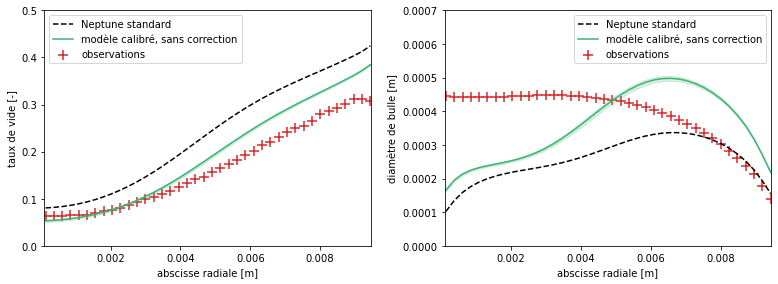

In [161]:
#noyau least squares

foldname="final_calibration/double_calibration_leastsquares/results/preds/"
obs=pd.DataFrame(data=np.loadtxt("final_calibration/double_calibration_withmean/results/obs.gnu"),columns=['x','alpha','diam'])
predsnom=pd.DataFrame(data=np.loadtxt("final_calibration/double_calibration_withmean/results/fnominal.gnu"),columns=['x','alpha','diam'])
#loading des prédictionF avec alpha et diamètre
alpha=pd.DataFrame(data=np.loadtxt(foldname+"predskohalphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
diam=pd.DataFrame(data=np.loadtxt(foldname+"predskohdiamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])

#loading des trajectoires avec alpha et diamètre

alphafz=pd.DataFrame(data=np.loadtxt(foldname+"predskohalpha.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
diamfz=pd.DataFrame(data=np.loadtxt(foldname+"predskohdiam.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

lw1=1.5
lw2=1.5
markersize=100
ckoh='mediumseagreen'

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(11,4))
labelobs="observations"
labelf='f'

ax1.scatter(obs['x'],obs['alpha'],s=markersize,marker='+',color=cobs,label=labelobs)

ax1.plot(predsnom['x'],predsnom['alpha'],linewidth=lw2,linestyle='--',color='black',label='Neptune standard')

ax1.plot(alpha['x'],alpha['useless'],linewidth=lw2,color=ckoh,label='modèle calibré, sans correction')
ax1.fill_between(alpha['x'],alpha['q2p5'],alpha['q97p5'],color=ckoh,alpha=0.2)

#ax1.plot(alphafz['x'],alphafz['mean'],linewidth=lw1,color='tab:blue',label='modèle calibré, avec correction')
#ax1.fill_between(alphafz['x'],alphafz['mean']-3*alphafz['std'],alphafz['mean']+3*alphafz['std'],color='tab:blue',alpha=0.2)
ax1.legend()


ax2.plot(predsnom['x'],predsnom['diam'],linewidth=lw2,linestyle='--',color='black',label='Neptune standard')
ax2.scatter(obs['x'],obs['diam'],s=markersize,marker='+',color=cobs,label=labelobs)

ax2.plot(diam['x'],diam['useless'],linewidth=lw2,color=ckoh,label='modèle calibré, sans correction')
ax2.fill_between(diam['x'],diam['q2p5'],diam['q97p5'],color=ckoh,alpha=0.2)


#ax2.plot(diamfz['x'],diamfz['mean'],linewidth=lw1,color='tab:blue',label='modèle calibré, avec correction')
#ax2.fill_between(diamfz['x'],diamfz['mean']-3*diamfz['std'],diamfz['mean']+3*diamfz['std'],color='tab:blue',alpha=0.2)

ax2.legend()

ax1.set_xlabel("abscisse radiale [m]")
ax2.set_xlabel("abscisse radiale [m]")
ax1.set_ylabel("taux de vide [-]")
ax2.set_ylabel("diamètre de bulle [m]")
plt.tight_layout()
ax1.set_ylim([0,0.5])
ax2.set_ylim([0,7e-4])
ax1.set_xlim([1e-4,9.45e-3])
ax2.set_xlim([1e-4,9.45e-3])







          phi       BK     COAL    NUCL         MT  hpar1  hpar2   hpar3
0    -3.67312 -14.9010  44.0027 -9.7259 -49.905819  0.098   0.01  0.0018
1    -3.67312 -14.9010  44.0027 -9.7259 -49.905819  0.098   0.01  0.0018
2    -3.68660 -14.4422  43.6986 -9.2954 -49.764359  0.098   0.01  0.0018
3    -3.60296 -14.2835  43.9332 -9.5956 -49.979223  0.098   0.01  0.0018
4    -3.60296 -14.2835  43.9332 -9.5956 -49.979223  0.098   0.01  0.0018
...       ...      ...      ...     ...        ...    ...    ...     ...
2998 -3.18792 -13.6356  43.1243 -9.5600 -49.926176  0.098   0.01  0.0018
2999 -3.32324 -15.9015  43.4711 -8.9064 -49.978670  0.098   0.01  0.0018
3000 -3.33786 -15.7935  42.4522 -9.2519 -49.954064  0.098   0.01  0.0018
3001 -3.36722 -15.8872  42.9057 -8.9861 -49.980887  0.098   0.01  0.0018
3002 -3.29232 -15.4773  42.1694 -9.5616 -49.730192  0.098   0.01  0.0018

[3003 rows x 8 columns]


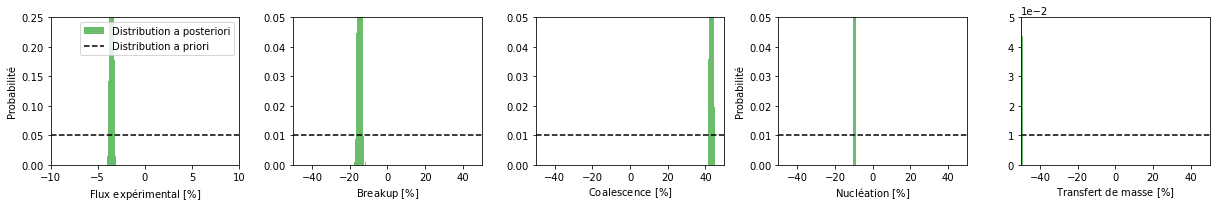

In [157]:
#plot de spostérieures paramètres
copt='tab:blue'
ckoh='tab:orange'
cfb='tab:green'
cobs='tab:red'


foldname="final_calibration/double_calibration_leastsquares/results/save/"
sampfbalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampkohalpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
dffa=sampfbalphas

#transformation dans une échelle adaptée
dffa['phi']=20*dffa['phi']-10
dffa['BK']=100*dffa['BK']-50
dffa['COAL']=100*dffa['COAL']-50
dffa['NUCL']=100*dffa['NUCL']-50
dffa['MT']=100*dffa['MT']-50

nbins=20
lw=2
lwkoh=1.5
alph=0.7



fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,figsize=(17,3))


ax1.hist(dffa['phi'],bins=nbins,color=cfb,density=True,alpha=alph,label='Distribution a posteriori',histtype='stepfilled',linewidth=lw)
ax2.hist(dffa['BK'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax3.hist(dffa['COAL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax4.hist(dffa['NUCL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax5.hist(dffa['MT'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)

plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))

ax1.set_xlabel(r'Flux expérimental $[\%]$')
ax2.set_xlabel(r'Breakup $[\%]$')
ax3.set_xlabel(r'Coalescence $[\%]$')
ax4.set_xlabel(r'Nucléation $[\%]$')
ax5.set_xlabel(r'Transfert de masse $[\%]$')

ax1.set_ylabel('Probabilité')
ax4.set_ylabel('Probabilité')
xlim=[-50,50]
ylim=[0,1./20]
ax1.set_ylim([0,0.25])
ax1.set_xlim([-10,10])
ax2.set_ylim(ylim)
ax2.set_xlim(xlim)
ax3.set_ylim(ylim)
ax3.set_xlim(xlim)
ax4.set_ylim(ylim)
ax4.set_xlim(xlim)
ax5.set_ylim(ylim)
ax5.set_xlim(xlim)

ax1.hlines(1./20,-10,10,colors='black',linestyle='--',label='Distribution a priori')
ax2.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax3.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax4.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax5.hlines(1./100,-50,50,colors='black',linestyle='--',label='Prior')
ax1.legend()



plt.tight_layout()

print(dffa)



In [87]:
#Affichage d'une chaîne MCMC pour illustrer la méthode de calibration
foldname='final_calibration/double_calibration_withmean/results/save/'
#chaîne de 1e6 steps.
#on divise le nombre de steps par 2.
dkoho=pd.DataFrame(data=np.loadtxt(foldname+"allsampopt+alpha.gnu")[:,0:5],columns=['t5','t1','t2','t3','t4'])


In [88]:
dkoh=dkoho
#réduction du nombre de pas pour un graphique propre.
dkoh['index'] = range(1, len(dkoh) + 1)
dkoh=dkoh.loc[::900]
print(dkoh)
dkoh['t1']=dkoh['t1']*1.5+0.5
dkoh['t2']=dkoh['t2']*1.5+0.5
dkoh['t3']=dkoh['t3']*1.5+0.5
dkoh['t4']=dkoh['t4']*1.5+0.5
dkoh['t5']=dkoh['t5']*0.2+0.9

              t5        t1        t2        t3        t4   index
0       0.210617  0.967310  0.216826  0.893539  0.019950       1
900     0.372156  0.295566  0.169916  0.735583  0.066006     901
1800    0.356951  0.780763  0.132782  0.926041  0.081998    1801
2700    0.074580  0.916746  0.257941  0.028698  0.325340    2701
3600    0.418717  0.739040  0.243794  0.081337  0.021766    3601
...          ...       ...       ...       ...       ...     ...
996300  0.567934  0.647352  0.147304  0.681956  0.070854  996301
997200  0.001755  0.963950  0.258226  0.257419  0.248067  997201
998100  0.112545  0.671602  0.340689  0.610255  0.041379  998101
999000  0.079317  0.607980  0.039942  0.853931  0.147565  999001
999900  0.130051  0.969798  0.199830  0.920836  0.175782  999901

[1112 rows x 6 columns]


/home/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

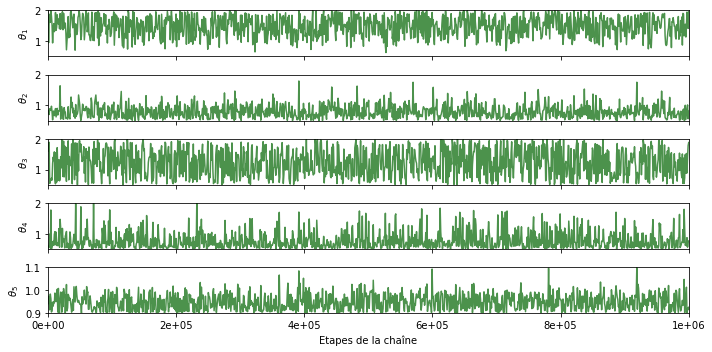

In [113]:
col='darkgreen'
alpha=0.7
fig,((ax1),(ax2),(ax3),(ax4),(ax5))=plt.subplots(nrows=5,ncols=1,figsize=(10,5),sharex=True)
ax1.plot(dkoh['index'],dkoh['t1'],color=col,alpha=alpha)
ax2.plot(dkoh['index'],dkoh['t2'],color=col,alpha=alpha)
ax3.plot(dkoh['index'],dkoh['t3'],color=col,alpha=alpha)
ax4.plot(dkoh['index'],dkoh['t4'],color=col,alpha=alpha)
ax5.plot(dkoh['index'],dkoh['t5'],color=col,alpha=alpha)
ax1.set_ylabel(r'$\theta_1$')
ax2.set_ylabel(r'$\theta_2$')
ax3.set_ylabel(r'$\theta_3$')
ax4.set_ylabel(r'$\theta_4$')
ax5.set_ylabel(r'$\theta_5$')
ax1.set_ylim([0.5,2])
ax2.set_ylim([0.5,2])
ax3.set_ylim([0.5,2])
ax4.set_ylim([0.5,2])
ax5.set_ylim([0.9,1.1])
ax1.set_xlim([0,1e6])
ax2.set_xlim([0,1e6])
ax3.set_xlim([0,1e6])
ax4.set_xlim([0,1e6])
ax5.set_xlim([0,1e6])
ax5.set_xlabel('Etapes de la chaîne')
ax5.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.0e'))
plt.tight_layout()







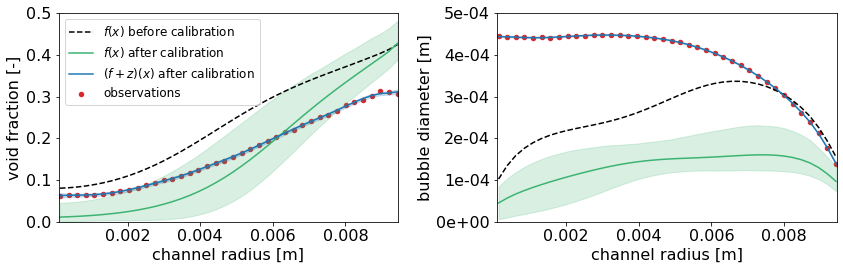

In [233]:
#figures pour la présentation RTN.
#taux de vide et diamètre en calibration double, en affichant sur la même figure les prédictions du modèle seul et du modèle avec correction
#on veut aussi montrer la prédiction sans calibration (nominale)

#predictionsF. Essayer de faire une figure compréhensible...
cobs='tab:red'

foldname="final_calibration/double_calibration_withmean/results/preds/"
obs=pd.DataFrame(data=np.loadtxt("final_calibration/double_calibration_withmean/results/obs.gnu"),columns=['x','alpha','diam'])
predsnom=pd.DataFrame(data=np.loadtxt("final_calibration/double_calibration_withmean/results/fnominal.gnu"),columns=['x','alpha','diam'])
#loading des prédictionF avec alpha et diamètre
alpha=pd.DataFrame(data=np.loadtxt(foldname+"predsopt+alphaF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
diam=pd.DataFrame(data=np.loadtxt(foldname+"predsopt+diamF.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])

#loading des trajectoires avec alpha et diamètre

alphafz=pd.DataFrame(data=np.loadtxt(foldname+"predsopt+alpha.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])
diamfz=pd.DataFrame(data=np.loadtxt(foldname+"predsopt+diam.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

lw1=1.5
lw2=1.5
markersize=20
ckoh='mediumseagreen'
#ckoh="darkgreen"
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
labelobs="observations"
labelf='f'

ax1.scatter(obs['x'],obs['alpha'],s=markersize,marker='o',color=cobs,label=labelobs)

ax1.plot(predsnom['x'],predsnom['alpha'],linewidth=lw2,linestyle='--',color='black',label='$f(x)$ before calibration')

ax1.plot(alpha['x'],alpha['useless'],linewidth=lw2,color=ckoh,label=r'$f(x)$ after calibration')
ax1.fill_between(alpha['x'],alpha['q2p5'],alpha['q97p5'],color=ckoh,alpha=0.2)
#ax1.plot(alpha['x'],alpha['q2p5'],linestyle='--',linewidth=lw2,color=ckoh)
#ax1.plot(alpha['x'],alpha['q97p5'],linestyle='--',linewidth=lw2,color=ckoh)

ax1.plot(alphafz['x'],alphafz['mean'],linewidth=lw1,color='tab:blue',label='$(f+z)(x)$ after calibration')
ax1.fill_between(alphafz['x'],alphafz['mean']-3*alphafz['std'],alphafz['mean']+3*alphafz['std'],color='tab:blue',alpha=0.2)
#ax1.plot(alphafz['x'],alphafz['mean']+3*alphafz['std'],linestyle='--',linewidth=lw2,color='tab:blue')
#ax1.plot(alphafz['x'],alphafz['mean']-3*alphafz['std'],linestyle='--',linewidth=lw2,color='tab:blue')
ax1.legend()


ax2.plot(predsnom['x'],predsnom['diam'],linewidth=lw2,linestyle='--',color='black',label='Neptune standard')
ax2.scatter(obs['x'],obs['diam'],s=markersize,marker='o',color=cobs,label=labelobs)

ax2.plot(diam['x'],diam['useless'],linewidth=lw2,color=ckoh,label='modèle calibré, sans correction')
ax2.fill_between(diam['x'],diam['q2p5'],diam['q97p5'],color=ckoh,alpha=0.2)

#ax2.plot(diam['x'],diam['q2p5'],linestyle='--',linewidth=lw2,color=ckoh)
#ax2.plot(diam['x'],diam['q97p5'],linestyle='--',linewidth=lw2,color=ckoh)

ax2.plot(diamfz['x'],diamfz['mean'],linewidth=lw1,color='tab:blue',label='modèle calibré, avec correction')
ax2.fill_between(diamfz['x'],diamfz['mean']-3*diamfz['std'],diamfz['mean']+3*diamfz['std'],color='tab:blue',alpha=0.2)

#ax2.plot(diamfz['x'],diamfz['mean']+3*diamfz['std'],linestyle='--',linewidth=lw2,color='tab:blue')
#ax2.plot(diamfz['x'],diamfz['mean']-3*diamfz['std'],linestyle='--',linewidth=lw2,color='tab:blue')
#ax2.legend()

ax1.set_xlabel("channel radius [m]")
ax2.set_xlabel("channel radius [m]")
ax1.set_ylabel("void fraction [-]")
ax2.set_ylabel("bubble diameter [m]")
plt.tight_layout()
ax1.set_ylim([0,0.5])
ax2.set_ylim([0,5e-4])
ax1.set_xlim([1e-4,9.45e-3])
ax2.set_xlim([1e-4,9.45e-3])

ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.0e'))






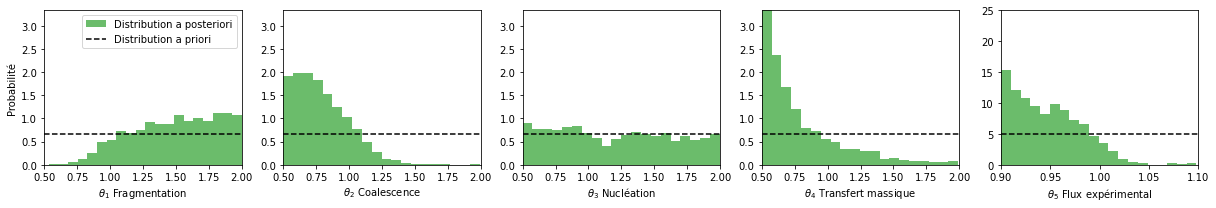

In [115]:
#plot de spostérieures paramètres
copt='tab:blue'
ckoh='tab:orange'
cfb='tab:green'
cobs='tab:red'


foldname="final_calibration/double_calibration_withmean/results/save/"
sampfbalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampopt+alpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
dffa=sampfbalphas

#transformation dans une échelle adaptée
dffa['phi']=0.2*dffa['phi']+0.9
dffa['BK']=1.5*dffa['BK']+0.5
dffa['COAL']=1.5*dffa['COAL']+0.5
dffa['NUCL']=1.5*dffa['NUCL']+0.5
dffa['MT']=1.5*dffa['MT']+0.5


nbins=20
lw=2
lwkoh=1.5
alph=0.7


fig,(ax2,ax3,ax4,ax5,ax1)=plt.subplots(nrows=1,ncols=5,figsize=(17,3))

ax1.hist(dffa['phi'],bins=nbins,color=cfb,density=True,alpha=alph,label='Distribution a posteriori',histtype='stepfilled',linewidth=lw)
ax2.hist(dffa['BK'],bins=nbins,color=cfb,density=True,alpha=alph,label='Distribution a posteriori',histtype='stepfilled',linewidth=lw)
ax3.hist(dffa['COAL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax4.hist(dffa['NUCL'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax5.hist(dffa['MT'],bins=nbins,color=cfb,density=True,alpha=alph,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)

plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))

ax1.set_xlabel(r'$\theta_5$ Flux expérimental')
ax2.set_xlabel(r'$\theta_1$ Fragmentation')
ax3.set_xlabel(r'$\theta_2$ Coalescence')
ax4.set_xlabel(r'$\theta_3$ Nucléation')
ax5.set_xlabel(r'$\theta_4$ Transfert massique')

ax2.set_ylabel('Probabilité')


yline=1/1.5

ax1.hlines(1/0.2,0.9,1.1,colors='black',linestyle='--',label='Distribution a priori')
ax2.hlines(yline,0.5,2,colors='black',linestyle='--',label='Distribution a priori')
ax3.hlines(yline,0.5,2,colors='black',linestyle='--',label='Prior')
ax4.hlines(yline,0.5,2,colors='black',linestyle='--',label='Prior')
ax5.hlines(yline,0.5,2,colors='black',linestyle='--',label='Prior')

xlim1=[0.5,2]
ylim1=[0,5*yline]
ax1.set_ylim([0,25])
ax1.set_xlim([0.9,1.1])
ax2.set_ylim(ylim1)
ax2.set_xlim(xlim1)
ax3.set_ylim(ylim1)
ax3.set_xlim(xlim1)
ax4.set_ylim(ylim1)
ax4.set_xlim(xlim1)
ax5.set_ylim(ylim1)
ax5.set_xlim(xlim1)
ax2.legend()




plt.tight_layout()





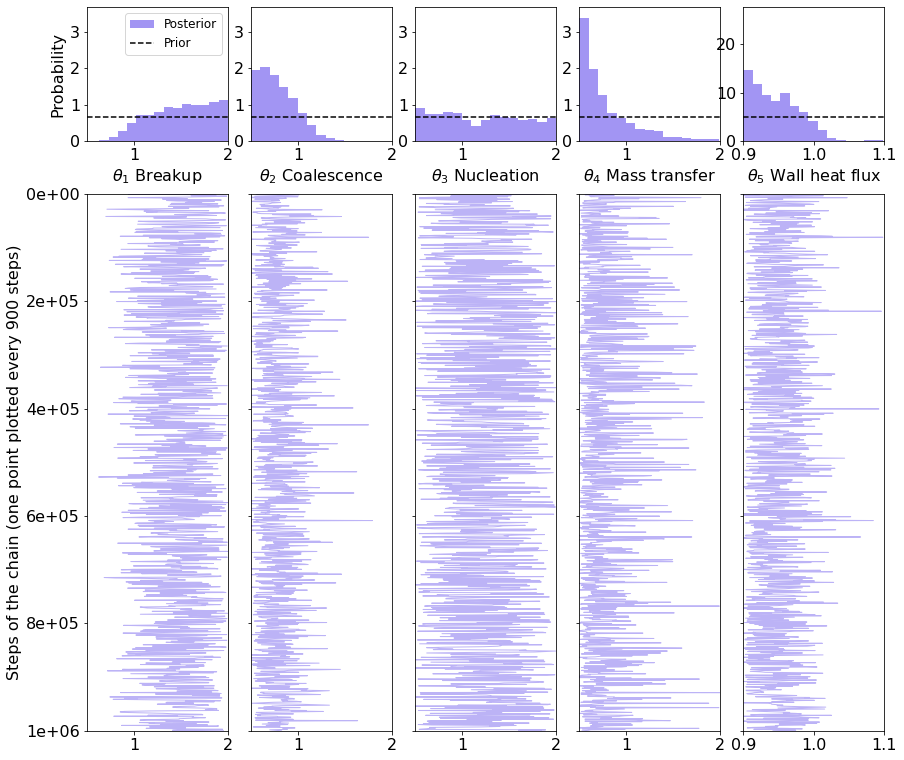

In [229]:
#tentative de faire un plot rotaté, à la mackay.
#plot de spostérieures paramètres
col='mediumslateblue'
#col='darkviolet'

foldname="final_calibration/double_calibration_withmean/results/save/"
sampfbalphas=pd.DataFrame(data=np.loadtxt(foldname+"sampopt+alpha.gnu"),columns=['phi','BK','COAL','NUCL','MT','hpar1','hpar2','hpar3'])
dffa=sampfbalphas

#transformation dans une échelle adaptée
dffa['phi']=0.2*dffa['phi']+0.9
dffa['BK']=1.5*dffa['BK']+0.5
dffa['COAL']=1.5*dffa['COAL']+0.5
dffa['NUCL']=1.5*dffa['NUCL']+0.5
dffa['MT']=1.5*dffa['MT']+0.5


nbins=15
lw=2
lwkoh=1.5
alpha1=0.7
alpha2=0.5


fig,((ax2,ax3,ax4,ax5,ax1),(ax6,ax7,ax8,ax9,ax10))=plt.subplots(nrows=2,ncols=5,figsize=(12,10),gridspec_kw={'height_ratios': [1, 4]})

ax1.hist(dffa['phi'],bins=nbins,color=col,density=True,alpha=alpha1,label='Distribution a posteriori',histtype='stepfilled',linewidth=lw)
ax2.hist(dffa['BK'],bins=nbins,color=col,density=True,alpha=alpha1,label='Posterior',histtype='stepfilled',linewidth=lw)
ax3.hist(dffa['COAL'],bins=nbins,color=col,density=True,alpha=alpha1,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax4.hist(dffa['NUCL'],bins=nbins,color=col,density=True,alpha=alpha1,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)
ax5.hist(dffa['MT'],bins=nbins,color=col,density=True,alpha=alpha1,label='Full Bayes distribution',histtype='stepfilled',linewidth=lw)

plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))

ax1.set_xlabel(r'$\theta_5$ Wall heat flux')
ax2.set_xlabel(r'$\theta_1$ Breakup')
ax3.set_xlabel(r'$\theta_2$ Coalescence')
ax4.set_xlabel(r'$\theta_3$ Nucleation')
ax5.set_xlabel(r'$\theta_4$ Mass transfer')

ax2.set_ylabel('Probability')


yline=1/1.5

ax1.hlines(1/0.2,0.9,1.1,colors='black',linestyle='--',label='Distribution a priori')
ax2.hlines(yline,0.5,2,colors='black',linestyle='--',label='Prior')
ax3.hlines(yline,0.5,2,colors='black',linestyle='--',label='Prior')
ax4.hlines(yline,0.5,2,colors='black',linestyle='--',label='Prior')
ax5.hlines(yline,0.5,2,colors='black',linestyle='--',label='Prior')

xlim1=[0.5,2]
ylim1=[0,5.5*yline]
ax1.set_ylim([0,27.5])
ax1.set_xlim([0.9,1.1])
ax2.set_ylim(ylim1)
ax2.set_xlim(xlim1)
ax3.set_ylim(ylim1)
ax3.set_xlim(xlim1)
ax4.set_ylim(ylim1)
ax4.set_xlim(xlim1)
ax5.set_ylim(ylim1)
ax5.set_xlim(xlim1)
ax2.legend()


######

lw=1
alpha=0.7
ax6.plot(dkoh['t1'],dkoh['index'],color=col,alpha=alpha2,linewidth=lw)
ax7.plot(dkoh['t2'],dkoh['index'],color=col,alpha=alpha2,linewidth=lw)
ax8.plot(dkoh['t3'],dkoh['index'],color=col,alpha=alpha2,linewidth=lw)
ax9.plot(dkoh['t4'],dkoh['index'],color=col,alpha=alpha2,linewidth=lw)
ax10.plot(dkoh['t5'],dkoh['index'],color=col,alpha=alpha2,linewidth=lw)

ax6.set_xlim([0.5,2])
ax7.set_xlim([0.5,2])
ax8.set_xlim([0.5,2])
ax9.set_xlim([0.5,2])
ax10.set_xlim([0.9,1.1])
ax6.set_ylim([0,1e6])
ax7.set_ylim([0,1e6])
ax8.set_ylim([0,1e6])
ax9.set_ylim([0,1e6])
ax10.set_ylim([0,1e6])
ax6.set_ylabel('Steps of the chain (one point plotted every 900 steps)')
ax6.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.0e'))
ax7.axes.yaxis.set_ticklabels([])
ax8.axes.yaxis.set_ticklabels([])
ax9.axes.yaxis.set_ticklabels([])
ax10.axes.yaxis.set_ticklabels([])

ax6.set_ylim(ax6.get_ylim()[::-1])
ax7.set_ylim(ax6.get_ylim()[::-1])
ax8.set_ylim(ax6.get_ylim()[::-1])
ax9.set_ylim(ax6.get_ylim()[::-1])
ax10.set_ylim(ax6.get_ylim()[::-1])

plt.tight_layout(pad=-.8)









In [231]:
print(mpl.rcParams['legend.fontsize'])
mpl.rcParams['font.weight']='normal'

mpl.rcParams['font.size']=16 #10 #16 pour posts
mpl.rcParams['legend.fontsize']=12 #10 12 pour posts

12.0


In [ ]:
mpl.rcParams['text.usetex']=True
#mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['font.weight']='bold'
#mpl.rcParams['axes.labelsize']= 33.0 #def value : 11.0
#mpl.rcParams['axes.titlesize']= 28.0 #def value : 12.0
mpl.rcParams['savefig.format']='png'
mpl.rcParams['font.size']=22 #10
mpl.rcParams['legend.fontsize']=18 #medium